In [1]:
from matplotlib import pyplot as plt
import matplotlib.patheffects as mpe
from visualize_graphs import *
import numpy as np
from CompilerQC import paths
import matplotlib.patches as patches
import matplotlib.patheffects as mpe

from scipy.special import binom
import matplotlib.colors as mcolors
import matplotlib.cm as cm


from shapely.geometry import Polygon
from itertools import combinations
from CompilerQC import *
import random
import matplotlib

In [2]:
figsize = (15, 15)

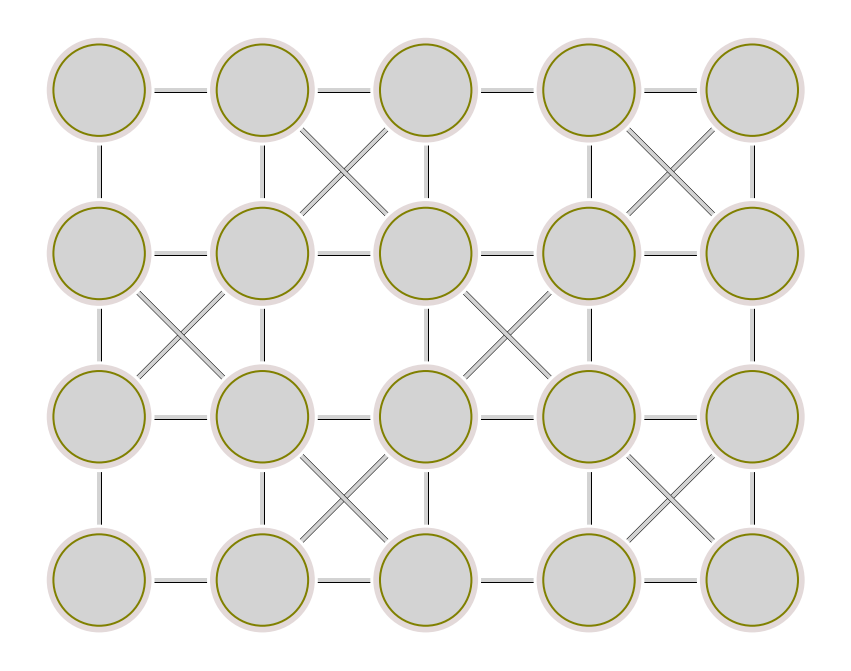

In [3]:
figsize = (15, 15)
edges = Edges([])
circles = Circles([])
for idx, (i, j) in enumerate([(i, j) for i in range(5) for j in range(4)]):
    circles.add_circle(Circle(coord=(i, j), fontsize=40))
    
forbidden_edges = [((0, 3), (1, 2)),
((0, 2), (1, 3)),
((0, 1), (1, 0)),
((0, 0), (1, 1)),
((1, 1), (2, 2)),
((1, 2), (2, 1)),
((2, 3), (3, 2)),
((2, 2), (3, 3)),
((2, 1), (3, 0)),
((2, 0), (3, 1)),
((3, 2), (4, 1)),
((3, 1), (4, 2)),]

for edge in list(combinations(circles.coords, 2)):
    if random.random() < 0.3:
        pass#continue
    if (np.abs(np.subtract(*edge)).sum()) <= 2:
        if edge not in forbidden_edges:
            edges.add_edge(Edge(edge=edge))

_, ax = plt.subplots(figsize=figsize)
ax.set_aspect('equal', 'box')
ax.axis('off')
ax.scatter(*circles.xy, color="black", s=0, alpha=1)

for edge in edges:
    edge.linewidth = 4
    edge.edgewidth= 5
    edge.alpha=0.1

    outline=mpe.withStroke(linewidth=edge.edgewidth, foreground=edge.edgecolor)
    ax.plot(*edge.xy, color=edge.color, linewidth=edge.linewidth, path_effects=[outline])
    
    
for circle in circles:
    circle.size=0.28
    circle.linewidth = 2
    circle.edgecolor = "olive"
    if circle.name is not None:
        label = ax.annotate(
            r"{}".format(circle.name),
            xy=circle.coord,
            ha="center",
            va="center",
            fontsize=circle.fontsize,
            zorder=5,
        )
    patch = plt.Circle(
        circle.coord,
        radius=circle.size+0.05,
        alpha=1,
        fill=True,
        fc='#e3d9d9',
        lw=3,
        ec='white',
        zorder=circle.zorder
    )
    ax.add_patch(patch)
       
    ax.add_patch(circle.patch)

ax.figure.savefig(paths.plots / f"ThesisFigures/IBM_connectivity.pdf",bbox_inches='tight')


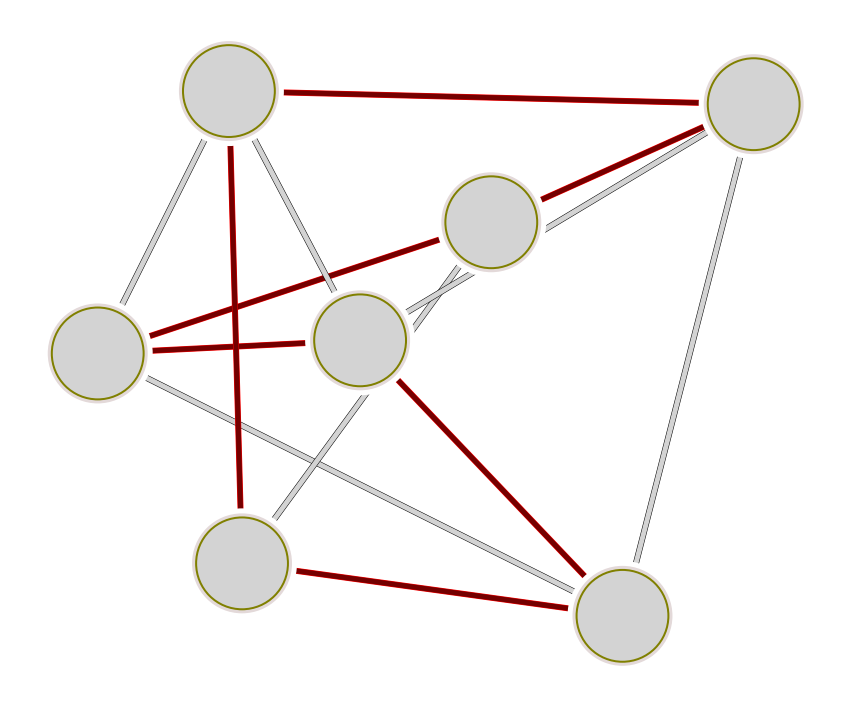

In [4]:
# TSP, noTSP, maxcu...
figsize = (15, 15)
edges = Edges([])
circles = Circles([])
for idx, (i, j) in enumerate([(0, 2), (1, 4), (3, 3), (5, 3.9), (4, 0), (2, 2.1), (1.1, 0.4)]):
    circles.add_circle(Circle(coord=(i, j), name="", fontsize=40))
    
edges_ = [
    ((0, 2), (1, 4)),
     ((0, 2), (3, 3)),
     ((0, 2), (4, 0)),
     ((0, 2), (2, 2.1)),
     ((1, 4), (5, 3.9)),
     ((1, 4), (2, 2.1)),
     ((1, 4), (1.1, 0.4)),
     ((3, 3), (5, 3.9)),
     ((3, 3), (1.1, 0.4)),
     ((5, 3.9), (4, 0)),
     ((5, 3.9), (2, 2.1)),
     ((4, 0), (2, 2.1)),
     ((4, 0), (1.1, 0.4))
]
edges = Edges(edges_)
tsps = [[
     ((0, 2), (3, 3)),
     ((0, 2), (2, 2.1)),
     ((1, 4), (5, 3.9)),
     ((1, 4), (1.1, 0.4)),
     ((3, 3), (5, 3.9)),
     ((4, 0), (2, 2.1)),
     ((4, 0), (1.1, 0.4))
]]
for tsp in tsps: 


    for edge in edges:
        if edge.edge in tsp:
            edge.tsp = True
        else:
            edge.tsp = False

    _, ax = plt.subplots(figsize=figsize)
    ax.set_aspect('equal', 'box')
    ax.axis('off')
    ax.scatter(*circles.xy, color="black", s=0, alpha=1)

    for edge in edges:
        edge.linewidth = 5
        edge.edgewidth= 6
        edge.alpha=0.1
        if edge.tsp:
            edge.linewidth = 5
            edge.color = "#750000"
            edge.edgewidth= 6

            edge.edgecolor = 'red'
        outline=mpe.withStroke(linewidth=edge.edgewidth, foreground=edge.edgecolor)
        ax.plot(*edge.xy, color=edge.color, linewidth=edge.linewidth, path_effects=[outline])


    for circle in circles:
        circle.size=0.35
        circle.linewidth = 2
        circle.edgecolor = "olive"
        if circle.name is not None:
            label = ax.annotate(
                r"{}".format(circle.name),
                xy=circle.coord,
                ha="center",
                va="center",
                fontsize=circle.fontsize,
                zorder=5,
            )
        patch = plt.Circle(
            circle.coord,
            radius=circle.size+0.05,
            alpha=1,
            fill=True,
            fc='#e3d9d9',
            lw=5,
            ec='white',
            zorder=circle.zorder
        )
        ax.add_patch(patch)

        ax.add_patch(circle.patch)
        #ax.arrow(circle.coord[0], circle.coord[1] - circle.size, 0, circle.size, linewidth=6,head_width=0.1, head_length=0.2, fc='k', ec='k', zorder=6)
        #ax.arrow(circle.coord[0] , circle.coord[1] + circle.size, 0, - circle.size, linewidth=6,head_width=0.1, head_length=0.2, fc='k', ec='k', zorder=6)
ax.figure.savefig(paths.plots / f"ThesisFigures/illustration_of_TSP_no_red_line.pdf",bbox_inches='tight')

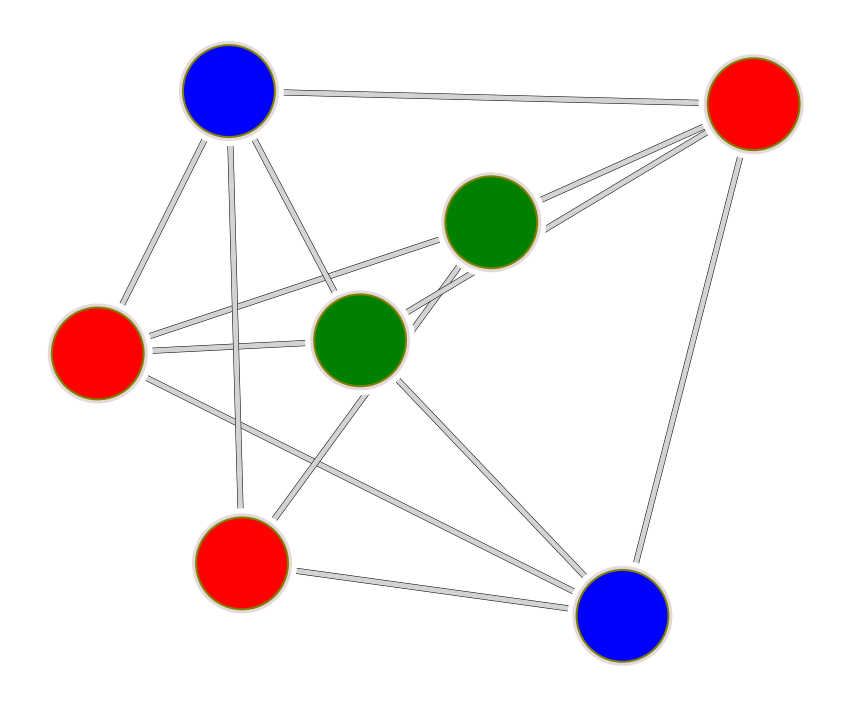

In [5]:
# grap color
figsize = (15, 15)
edges = Edges([])
circles = Circles([])
for idx, (i, j) in enumerate([(0, 2), (1, 4), (3, 3), (5, 3.9), (4, 0), (2, 2.1), (1.1, 0.4)]):
    circles.add_circle(Circle(coord=(i, j), name="", fontsize=40))
    
edges_ = [
    ((0, 2), (1, 4)),
     ((0, 2), (3, 3)),
     ((0, 2), (4, 0)),
     ((0, 2), (2, 2.1)),
     ((1, 4), (5, 3.9)),
     ((1, 4), (2, 2.1)),
     ((1, 4), (1.1, 0.4)),
     ((3, 3), (5, 3.9)),
     ((3, 3), (1.1, 0.4)),
     ((5, 3.9), (4, 0)),
     ((5, 3.9), (2, 2.1)),
     ((4, 0), (2, 2.1)),
     ((4, 0), (1.1, 0.4))
]
edges = Edges(edges_)
color_ = ['red', 'blue', 'green', 'red', 'blue', 'green', 'red']


_, ax = plt.subplots(figsize=figsize)
ax.set_aspect('equal', 'box')
ax.axis('off')
ax.scatter(*circles.xy, color="black", s=0, alpha=1)

for edge in edges:
    edge.linewidth = 5
    edge.edgewidth= 6
    edge.alpha=0.1
    outline=mpe.withStroke(linewidth=edge.edgewidth, foreground=edge.edgecolor)
    ax.plot(*edge.xy, color=edge.color, linewidth=edge.linewidth, path_effects=[outline])


for idx, circle in enumerate(circles.circles):
    circle.size=0.35
    circle.linewidth = 2
    circle.edgecolor = "olive"
    circle.color = color_[idx]
    if circle.name is not None:
        label = ax.annotate(
            r"{}".format(circle.name),
            xy=circle.coord,
            ha="center",
            va="center",
            fontsize=circle.fontsize,
            zorder=5,
        )
    patch = plt.Circle(
        circle.coord,
        radius=circle.size+0.05,
        alpha=1,
        fill=True,
        fc='#e3d9d9',#color_[idx],
        lw=5,
        ec='white',
        zorder=circle.zorder
    )
    ax.add_patch(patch)

    ax.add_patch(circle.patch)

ax.figure.savefig(paths.plots / f"ThesisFigures/illustration_of_graph_coloring.pdf",bbox_inches='tight')


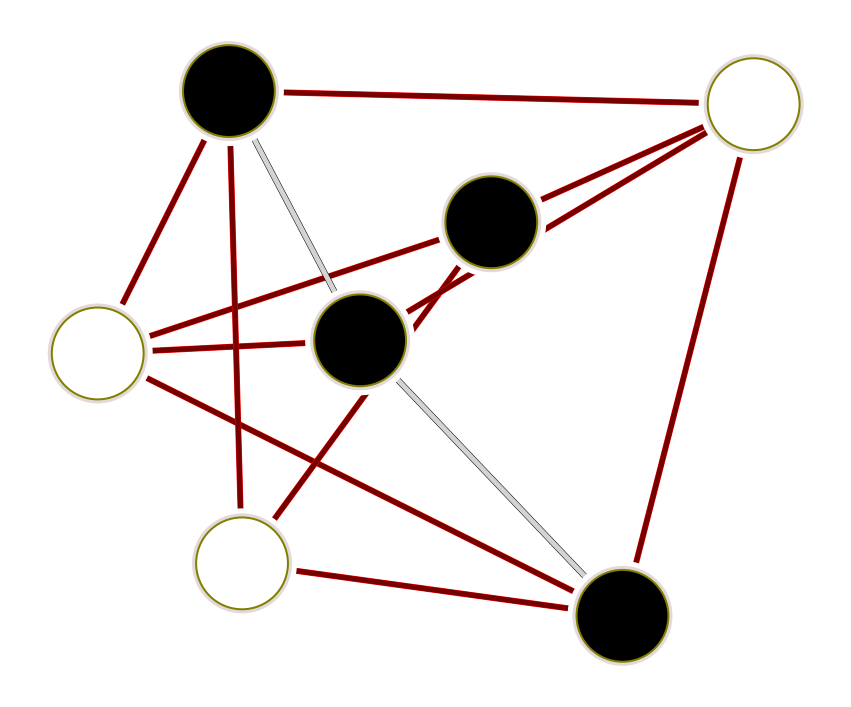

In [6]:
# TSP, noTSP, maxcu...
figsize = (15, 15)
edges = Edges([])
circles = Circles([])
for idx, (i, j) in enumerate([(0, 2), (1, 4), (3, 3), (5, 3.9), (4, 0), (2, 2.1), (1.1, 0.4)]):
    circle = Circle(coord=(i, j), name="", fontsize=40)
    circle.color = 'white'
    if idx in [1, 2, 4, 5]:
        circle.color = 'black'
    circles.add_circle(circle)
    
edges_ = [
    ((0, 2), (1, 4)),
     ((0, 2), (3, 3)),
     ((0, 2), (4, 0)),
     ((0, 2), (2, 2.1)),
     ((1, 4), (5, 3.9)),
     ((1, 4), (2, 2.1)),
     ((1, 4), (1.1, 0.4)),
     ((3, 3), (5, 3.9)),
     ((3, 3), (1.1, 0.4)),
     ((5, 3.9), (4, 0)),
     ((5, 3.9), (2, 2.1)),
     ((4, 0), (2, 2.1)),
     ((4, 0), (1.1, 0.4))
]
edges = Edges(edges_)
tsp = list(set(edges_) - set([((1, 4), (2, 2.1)), ((4, 0), (2, 2.1))]))

for edge in edges:
    if edge.edge in tsp:
        edge.tsp = True
    else:
        edge.tsp = False

_, ax = plt.subplots(figsize=figsize)
ax.set_aspect('equal', 'box')
ax.axis('off')
ax.scatter(*circles.xy, color="black", s=0, alpha=1)

for edge in edges:
    edge.linewidth = 5
    edge.edgewidth= 6
    edge.alpha=0.1
    if edge.tsp:
        edge.linewidth = 5
        edge.color = "#750000"
        edge.edgewidth= 6

        edge.edgecolor = 'red'
    outline=mpe.withStroke(linewidth=edge.edgewidth, foreground=edge.edgecolor)
    ax.plot(*edge.xy, color=edge.color, linewidth=edge.linewidth, path_effects=[outline])


for circle in circles:
    circle.size=0.35
    circle.linewidth = 2
    circle.edgecolor = "olive"
    if circle.name is not None:
        label = ax.annotate(
            r"{}".format(circle.name),
            xy=circle.coord,
            ha="center",
            va="center",
            fontsize=circle.fontsize,
            zorder=5,
        )
    patch = plt.Circle(
        circle.coord,
        radius=circle.size+0.05,
        alpha=1,
        fill=True,
        fc="#e3d9d9",
        lw=5,
        ec='white',
        zorder=circle.zorder
    )
    ax.add_patch(patch)

    ax.add_patch(circle.patch)

ax.figure.savefig(paths.plots / f"ThesisFigures/illustration_of_maxcut.pdf",bbox_inches='tight')



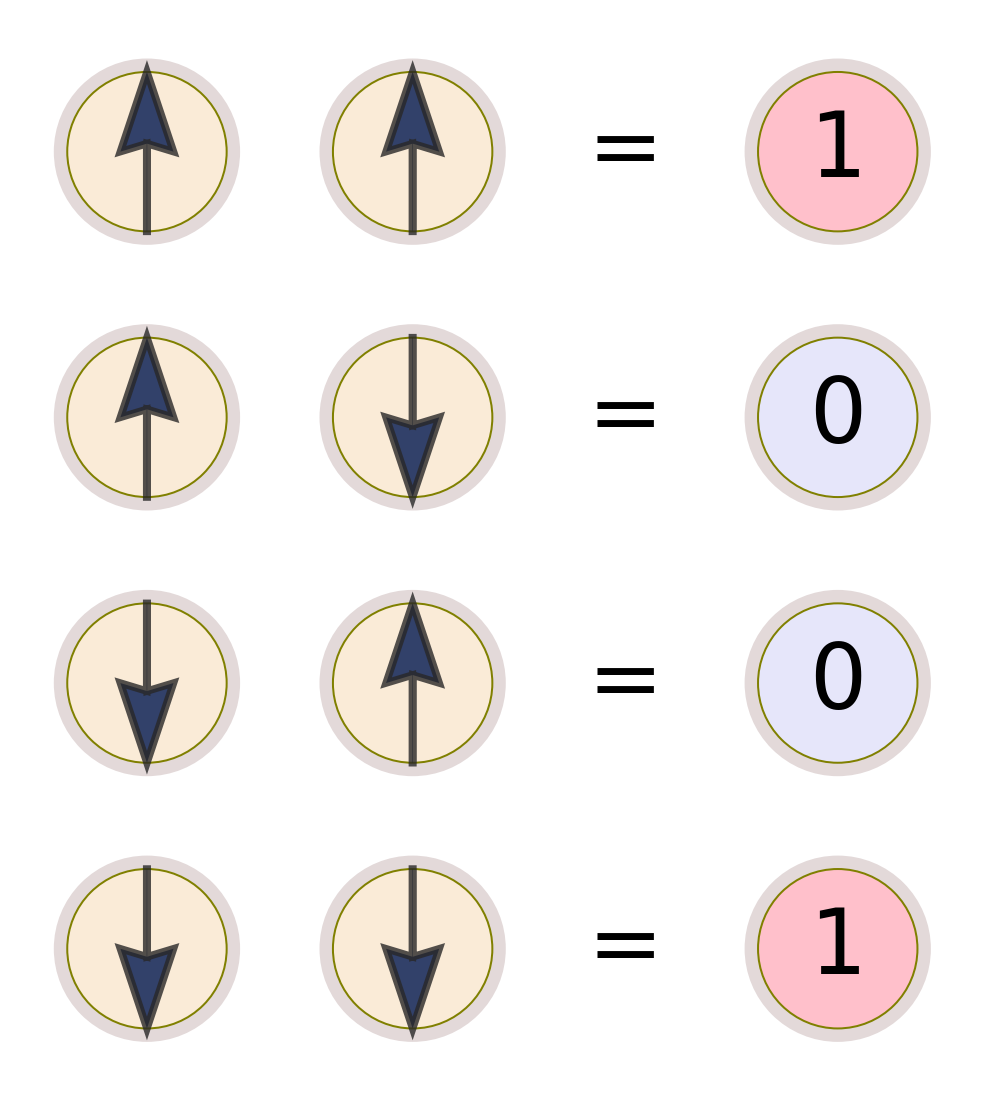

In [7]:
figsize = (20, 20)
edges = Edges([])
circles = Circles([])
n = 6
circles_ = [
     (False, (0, 0)),
     (False, (0, 1)),
     (True, (0, 2)),
     (True, (0, 3)),
     (False, (1, 0)),
     (True, (1, 1)),
     (False, (1, 2)),
     (True, (1, 3))
]

for (up, (i, j)) in (circles_):
    if i == 1:
        i -= .5
    j /=2
    circles.add_circle(Circle(coord=(i, j), up=up, down=not up, color="antiquewhite", size=0.1, fontsize=50))

circles_ = [(i, j) for i in range(2,3) for j in range(0, 4)]
for idx, (i, j) in enumerate(circles_):
    j/=2
    i-=.2
    circles.add_circle(Circle(coord=(i-.5, j), name=idx,  color="lavender", size=0.1, fontsize=50))

_, ax = plt.subplots(figsize=figsize)
ax.set_aspect('equal', 'box')
ax.axis('off')
ax.scatter(*circles.xy, color="black", s=0, alpha=1)
    
for circle in circles:
    if circle.name in [0, 3]:
        circle.name = '1'
        circle.color='#FFC0CB'
    if circle.name in [1, 2]:
        circle.name = '0'
    circle.size=0.15
    circle.linewidth = 2
    circle.edgecolor = "olive"

    circle = circle  
    patch = plt.Circle(
        circle.coord,
        radius=circle.size*1.2,
        alpha=1,
        fill=True,
        fc='#e3d9d9',
        lw=5,
        ec='white',
        zorder=circle.zorder
    )
    ax.add_patch(patch)
       
    ax.add_patch(circle.patch)
    if circle.name is not None:
        label = ax.annotate(
            r"{}".format("="),
            xy= (circle.coord[0] - .8 / 2 , circle.coord[1]),
            ha="center",
            va="center",
            fontsize=circle.fontsize*1.8,
            zorder=10,
            color='black'
            
        )        
        label = ax.annotate(
            r"{}".format(circle.name),
            xy= (circle.coord[0], circle.coord[1]),
            ha="center",
            va="center",
            fontsize=circle.fontsize*1.8,
            zorder=10,
            color='black',
        )
    if circle.up:
        ax.arrow(circle.coord[0] , circle.coord[1] - circle.size, 0, circle.size, alpha=0.8,overhang=.1,
             linewidth=circle.size * 50,head_width=circle.size/1.5, head_length=circle.size,
             fc='#00164F', ec='#282727', zorder=6)

    if circle.down:
        ax.arrow(circle.coord[0] , circle.coord[1] + circle.size, 0, - circle.size, alpha=0.8,overhang=.1,
             linewidth=circle.size * 50,head_width=circle.size/1.5, head_length=circle.size,
             fc='#00164F', ec='#282727', zorder=6)
ax.figure.savefig(paths.plots / f"ThesisFigures/parity.pdf",bbox_inches='tight')


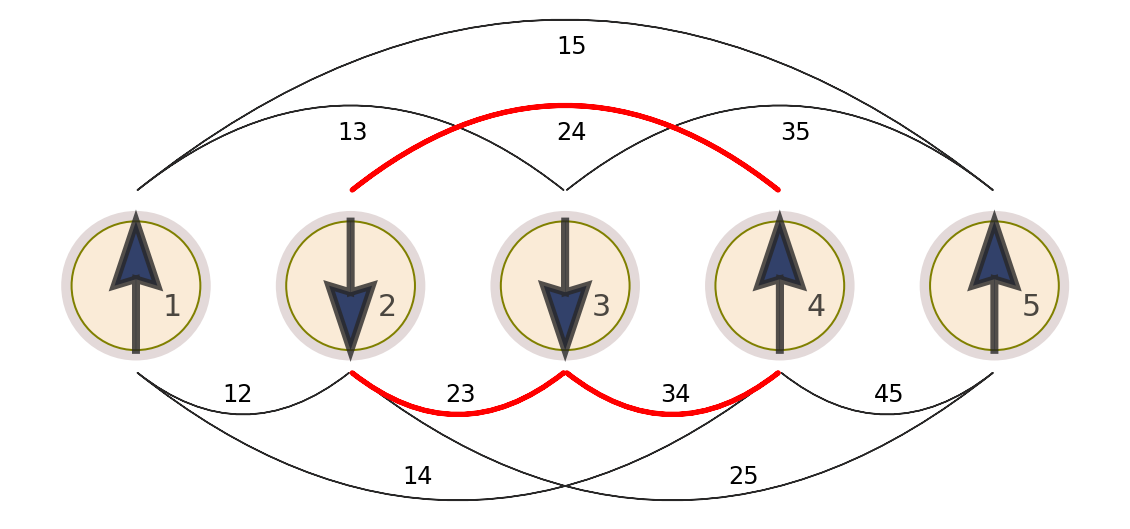

In [126]:
from copy import copy
circles = Circles([])
up=True
circles.add_circle(
        Circle(
            coord=(0, 0),
            color="antiquewhite",
            name=1,
            up=up,
            down=not up,
            size=0.15,
            fontsize=50,
            lw=2,
            edgecolor='olive',
        ))
circles.add_circle(
        Circle(
            coord=(.5, 0),
            color="antiquewhite",
            name=2,
            up=up,
            down=not up,
            size=0.15,
            fontsize=50,
            lw=2,
            edgecolor='olive',
        ))
circles.add_circle(
        Circle(
            coord=(1, 0),
            color="antiquewhite",
            name=3,
            up=up,
            down=not up,
            size=0.15,
            fontsize=50,
            lw=2,
            edgecolor='olive',
        ))
circles.add_circle(
        Circle(
            coord=(1.5, 0),
            color="antiquewhite",
            name=4,
            up=up,
            down=not up,
            size=0.15,
            fontsize=50,
            lw=2,
            edgecolor='olive',
        ))
circles.add_circle(
        Circle(
            coord=(2, 0),
            color="antiquewhite",
            name=5,
            up=up,
            down=not up,
            size=0.15,
            fontsize=50,
            lw=2,
            edgecolor='olive',
        ))

color = '#282727'
lw_ = 1.5
list_of_patches = [
patches.FancyArrowPatch((0, -.2), (.5, -.2),lw=lw_,connectionstyle="arc3,rad=.4", zorder=39, color=color),#12
patches.FancyArrowPatch((.5, -.2), (1, -.2),lw=lw_,connectionstyle="arc3,rad=.4", zorder=39, color=color),#23
patches.FancyArrowPatch((1.0, -.2), (1.5, -.2),lw=lw_,connectionstyle="arc3,rad=.4", zorder=39, color=color),#34
patches.FancyArrowPatch((1.5, -.2), (2, -.2),lw=lw_,connectionstyle="arc3,rad=.4", zorder=39, color=color),#45

patches.FancyArrowPatch((-.0, .22), (1, .22),lw=lw_,connectionstyle="arc3,rad=-.4", zorder=39, color=color),#13
patches.FancyArrowPatch((.5, .22), (1.5, .22),lw=lw_,connectionstyle="arc3,rad=-.4", zorder=39, color=color),#24
patches.FancyArrowPatch((1.0, .22), (2.0, .22),lw=lw_,connectionstyle="arc3,rad=-.4", zorder=39, color=color),#35

patches.FancyArrowPatch((0, -.2), (1.5, -.2),lw=lw_,connectionstyle="arc3,rad=.4", zorder=39, color=color),#14
patches.FancyArrowPatch((0.5, -.2), (2.0, -.2),lw=lw_,connectionstyle="arc3,rad=.4", zorder=39, color=color),#25

patches.FancyArrowPatch((-0.0, .22), (2.0, .22),lw=lw_,connectionstyle="arc3,rad=-.4", zorder=39, color=color),#15

    ]
color, lww = 'red', 5
new_patchs = [
    patches.FancyArrowPatch((.5, -.2), (1, -.2),lw=lww,connectionstyle="arc3,rad=.4", zorder=39, color=color),#23
patches.FancyArrowPatch((1.0, -.2), (1.5, -.2),lw=lww,connectionstyle="arc3,rad=.4", zorder=39, color=color),#34
    patches.FancyArrowPatch((.5, .22), (1.5, .22),lw=lww,connectionstyle="arc3,rad=-.4", zorder=39, color=color),#24

]

_, ax = plt.subplots(figsize=figsize)
ax.set_aspect('equal', 'box')
ax.axis('off')
ax.scatter(*circles.xy, color="black", s=0, alpha=1)
ax.set_ylim(-1.2,1.1)
for patch in list_of_patches:
    patch = copy(patch)
    ax.add_patch(patch)
    
for new_patch in new_patchs:
    ax.add_patch(new_patch)
        
for circle in circles:

    if circle.name is not None:
        label = ax.annotate(
            r"{}".format(circle.name),
            xy= (circle.coord[0]+.085, circle.coord[1]-0.05),
            ha="center",
            va="center",
            fontsize=30,
            zorder=10,
            color='black',
            alpha=0.7

        )
    patch = plt.Circle(
        circle.coord,
        radius=circle.size*1.2,
        alpha=1,
        fill=True,
        fc='#e3d9d9',
        lw=5,
        ec='white',
        zorder=circle.zorder
    )
    patch = copy(patch)
    ax.add_patch(patch)

    ax.add_patch(circle.patch)
    
    if random.randint(0, 1) < 0.5:
        ax.arrow(circle.coord[0] , circle.coord[1] - circle.size, 0, circle.size, alpha=0.8,overhang=.1,
                 linewidth=circle.size * 50,head_width=circle.size/1.5, head_length=circle.size,
                 fc='#00164F', ec='#282727', zorder=6)
    else:
        ax.arrow(circle.coord[0] , circle.coord[1] + circle.size, 0, - circle.size, alpha=0.8,overhang=.1,
                 linewidth=circle.size * 50,head_width=circle.size/1.5, head_length=circle.size,
                 fc='#00164F', ec='#282727', zorder=6)
fontsize = 24
ax.text(.2, -.27, '12',fontsize=fontsize)
ax.text(.72, -.27, '23',fontsize=fontsize)
ax.text(1.22, -.27, '34',fontsize=fontsize)
ax.text(1.72, -.27, '45',fontsize=fontsize)

ax.text(.47, .34, '13',fontsize=fontsize)
ax.text(.98, .34, '24',fontsize=fontsize)
ax.text(1.5, .34, '35',fontsize=fontsize)

ax.text(.62, -.46, '14',fontsize=fontsize)
ax.text(1.38, -.46, '25',fontsize=fontsize)

ax.text(.98, .54, '15',fontsize=fontsize)

ax.set_xlim(-.3, 2.3)
ax.set_ylim(-.55, .65)

ax.figure.savefig(paths.plots / f"ThesisFigures/N5_spin_glass_234loop.pdf",bbox_inches='tight')


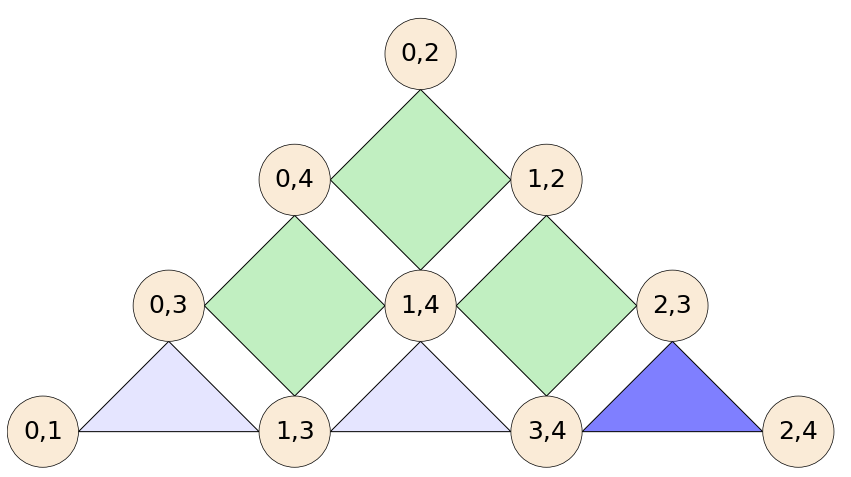

In [98]:
core_plaquettes = [[(2, 3), (2, 4), (3, 4)]]
qubit_to_coord_dict = {
 (0, 1): (0, 1),
 (0, 2): (0, 4),
 (0, 3): (0, 2),
 (0, 4): (0, 3),
 (1, 2): (1, 4),
 (1, 3): (1, 2),
 (1, 4): (1, 3),
 (2, 3): (2, 4),
 (2, 4): (3, 4),
 (3, 4): (2, 3),
}
graph = Graph.complete(5)
qbits = Qbits.init_qbits_from_dict(graph, qubit_to_coord_dict, assign_to_core=False)
nodes_object = Nodes(qbits, place_qbits_in_lines=False)
polygon_object = Polygons(nodes_object)

ax = visualize_(polygon_object,  polygons=core_plaquettes, rotate=True, without_label=False, fontsize=25)

ax.set_xlim(-1.6, 3.1)
ax.set_ylim(1.2, 3.8)

ax.figure.savefig(paths.plots / f"ThesisFigures/N5_lhz_234loop.pdf",bbox_inches='tight')



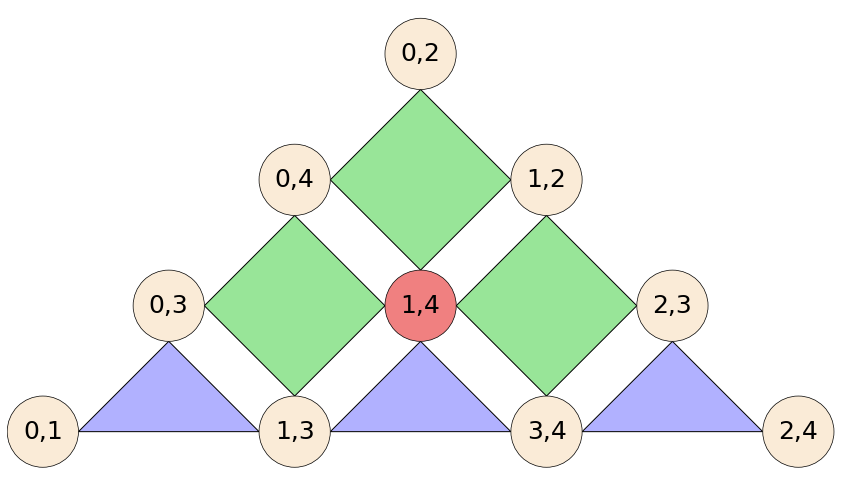

In [99]:
missing_link = [(1, 4)]
qubit_to_coord_dict = {
 (0, 1): (0, 1),
 (0, 2): (0, 4),
 (0, 3): (0, 2),
 (0, 4): (0, 3),
 (1, 2): (1, 4),
 (1, 3): (1, 2),
 (1, 4): (1, 3),
 (2, 3): (2, 4),
 (2, 4): (3, 4),
 (3, 4): (2, 3),
}
graph = Graph.complete(5)
qbits = Qbits.init_qbits_from_dict(graph, qubit_to_coord_dict, assign_to_core=False)
for qubit in missing_link:
    qbits[qubit].ancilla = True
    qbits[qubit].core = True
    
nodes_object = Nodes(qbits, place_qbits_in_lines=False)
polygon_object = Polygons(nodes_object)
ax = polygon_object.visualize(rotate=True, fontsize=25)
ax.set_xlim(-1.6, 3.1)
ax.set_ylim(1.2, 3.8)
ax.figure.savefig(paths.plots / f"ThesisFigures/N5_lhz_ancilla.pdf",bbox_inches='tight')



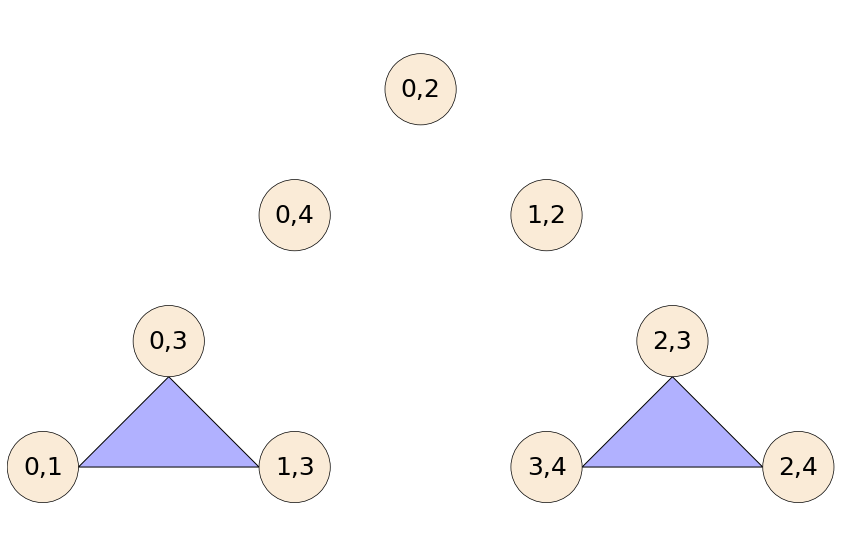

In [11]:
missing_link = [(1, 4)]
qubit_to_coord_dict = {
 (0, 1): (0, 1),
 (0, 2): (0, 4),
 (0, 3): (0, 2),
 (0, 4): (0, 3),
 (1, 2): (1, 4),
 (1, 3): (1, 2),
 (2, 3): (2, 4),
 (2, 4): (3, 4),
 (3, 4): (2, 3),
}
N = 5
graph = Graph.init_without_edges(N, missing_link)
qbits = Qbits.init_qbits_from_dict(graph, qubit_to_coord_dict, assign_to_core=False)
nodes_object = Nodes(qbits, place_qbits_in_lines=False)
polygon_object = Polygons(nodes_object)
ax = polygon_object.visualize(rotate=True, fontsize=25)
ax.set_xlim(-1.6, 3.1)
ax.set_ylim(1, 4)
ax.figure.savefig(paths.plots / f"ThesisFigures/N5_lhz_hole.pdf",bbox_inches='tight')



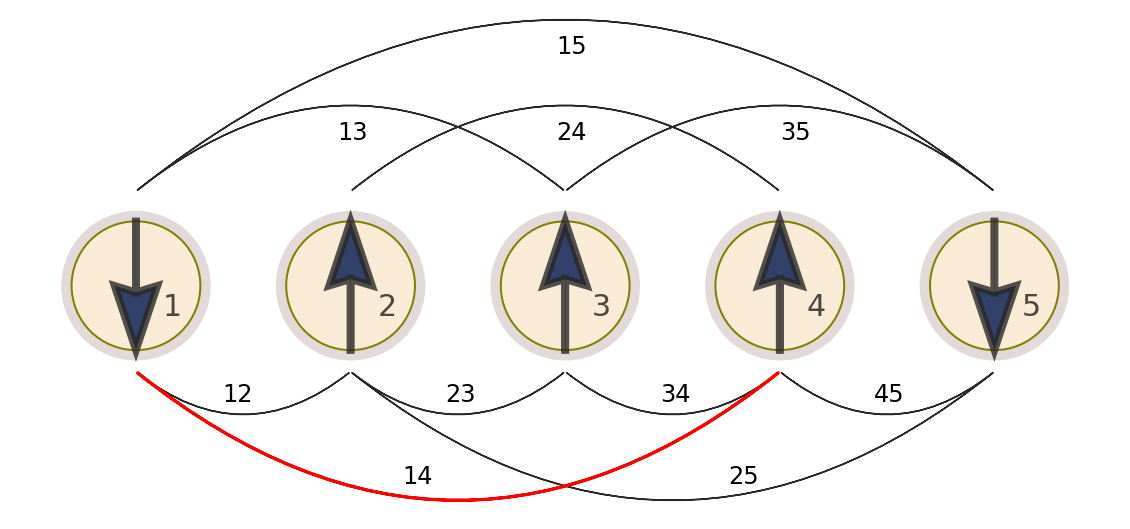

In [127]:
from copy import copy
circles = Circles([])
up=True
circles.add_circle(
        Circle(
            coord=(0, 0),
            color="antiquewhite",
            name=1,
            up=up,
            down=not up,
            size=0.15,
            fontsize=50,
            lw=2,
            edgecolor='olive',
        ))
circles.add_circle(
        Circle(
            coord=(.5, 0),
            color="antiquewhite",
            name=2,
            up=up,
            down=not up,
            size=0.15,
            fontsize=50,
            lw=2,
            edgecolor='olive',
        ))
circles.add_circle(
        Circle(
            coord=(1, 0),
            color="antiquewhite",
            name=3,
            up=up,
            down=not up,
            size=0.15,
            fontsize=50,
            lw=2,
            edgecolor='olive',
        ))
circles.add_circle(
        Circle(
            coord=(1.5, 0),
            color="antiquewhite",
            name=4,
            up=up,
            down=not up,
            size=0.15,
            fontsize=50,
            lw=2,
            edgecolor='olive',
        ))
circles.add_circle(
        Circle(
            coord=(2, 0),
            color="antiquewhite",
            name=5,
            up=up,
            down=not up,
            size=0.15,
            fontsize=50,
            lw=2,
            edgecolor='olive',
        ))

color = '#282727'
lw_ = 1.5
list_of_patches = [
patches.FancyArrowPatch((0, -.2), (.5, -.2),lw=lw_,connectionstyle="arc3,rad=.4", zorder=39, color=color),#12
patches.FancyArrowPatch((.5, -.2), (1, -.2),lw=lw_,connectionstyle="arc3,rad=.4", zorder=39, color=color),#23
patches.FancyArrowPatch((1.0, -.2), (1.5, -.2),lw=lw_,connectionstyle="arc3,rad=.4", zorder=39, color=color),#34
patches.FancyArrowPatch((1.5, -.2), (2, -.2),lw=lw_,connectionstyle="arc3,rad=.4", zorder=39, color=color),#45

patches.FancyArrowPatch((-.0, .22), (1, .22),lw=lw_,connectionstyle="arc3,rad=-.4", zorder=39, color=color),#13
patches.FancyArrowPatch((.5, .22), (1.5, .22),lw=lw_,connectionstyle="arc3,rad=-.4", zorder=39, color=color),#24
patches.FancyArrowPatch((1.0, .22), (2.0, .22),lw=lw_,connectionstyle="arc3,rad=-.4", zorder=39, color=color),#35

patches.FancyArrowPatch((0, -.2), (1.5, -.2),lw=lw_,connectionstyle="arc3,rad=.4", zorder=39, color=color),#14
patches.FancyArrowPatch((0.5, -.2), (2.0, -.2),lw=lw_,connectionstyle="arc3,rad=.4", zorder=39, color=color),#25

patches.FancyArrowPatch((-0.0, .22), (2.0, .22),lw=lw_,connectionstyle="arc3,rad=-.4", zorder=39, color=color),#15

    ]
color, lww = 'red', 5
new_patchs = [
    patches.FancyArrowPatch((0, -.2), (1.5, -.2),lw=3,connectionstyle="arc3,rad=.4", zorder=39, color=color),#14
]

_, ax = plt.subplots(figsize=figsize)
ax.set_aspect('equal', 'box')
ax.axis('off')
ax.scatter(*circles.xy, color="black", s=0, alpha=1)
ax.set_ylim(-1.2,1.1)
for patch in list_of_patches:
    patch = copy(patch)
    ax.add_patch(patch)
    
for new_patch in new_patchs:
    ax.add_patch(new_patch)
        
for circle in circles:

    if circle.name is not None:
        label = ax.annotate(
            r"{}".format(circle.name),
            xy= (circle.coord[0]+.085, circle.coord[1]-0.05),
            ha="center",
            va="center",
            fontsize=30,
            zorder=10,
            color='black',
            alpha=0.7

        )
    patch = plt.Circle(
        circle.coord,
        radius=circle.size*1.2,
        alpha=1,
        fill=True,
        fc='#e3d9d9',
        lw=5,
        ec='white',
        zorder=circle.zorder
    )
    patch = copy(patch)
    ax.add_patch(patch)

    ax.add_patch(circle.patch)
    
    if random.randint(0, 1) < 0.5:
        ax.arrow(circle.coord[0] , circle.coord[1] - circle.size, 0, circle.size, alpha=0.8,overhang=.1,
                 linewidth=circle.size * 50,head_width=circle.size/1.5, head_length=circle.size,
                 fc='#00164F', ec='#282727', zorder=6)
    else:
        ax.arrow(circle.coord[0] , circle.coord[1] + circle.size, 0, - circle.size, alpha=0.8,overhang=.1,
                 linewidth=circle.size * 50,head_width=circle.size/1.5, head_length=circle.size,
                 fc='#00164F', ec='#282727', zorder=6)
fontsize = 24
ax.text(.2, -.27, '12',fontsize=fontsize)
ax.text(.72, -.27, '23',fontsize=fontsize)
ax.text(1.22, -.27, '34',fontsize=fontsize)
ax.text(1.72, -.27, '45',fontsize=fontsize)

ax.text(.47, .34, '13',fontsize=fontsize)
ax.text(.98, .34, '24',fontsize=fontsize)
ax.text(1.5, .34, '35',fontsize=fontsize)

ax.text(.62, -.46, '14',fontsize=fontsize)
ax.text(1.38, -.46, '25',fontsize=fontsize)

ax.text(.98, .54, '15',fontsize=fontsize)

ax.set_xlim(-.3, 2.3)
ax.set_ylim(-.55, .65)
ax.figure.savefig(paths.plots / f"ThesisFigures/N5_spin_glass_14.pdf",bbox_inches='tight')



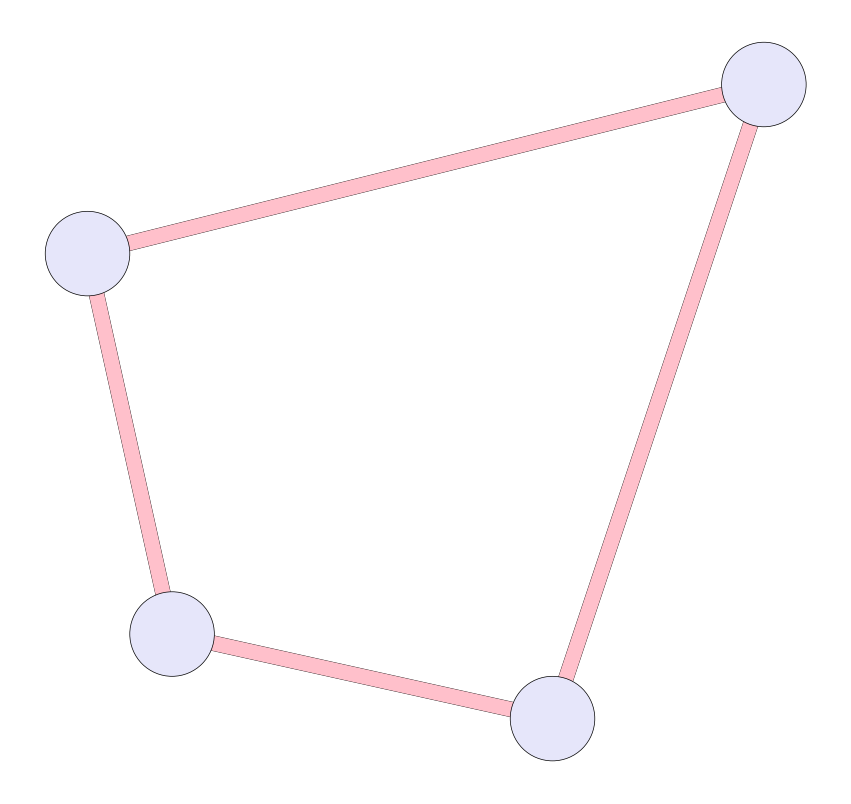

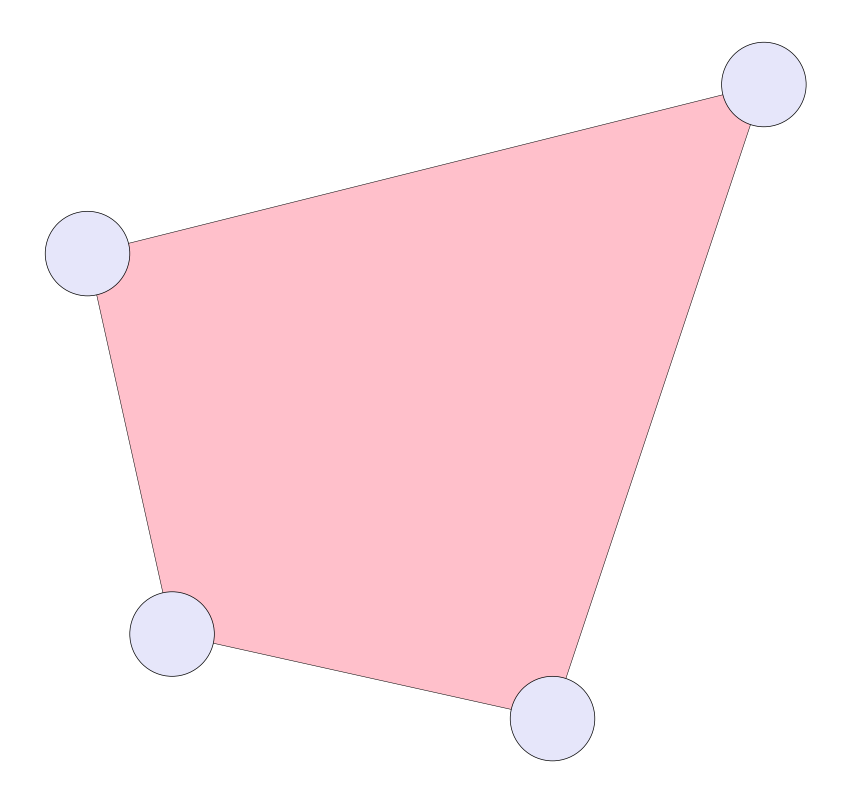

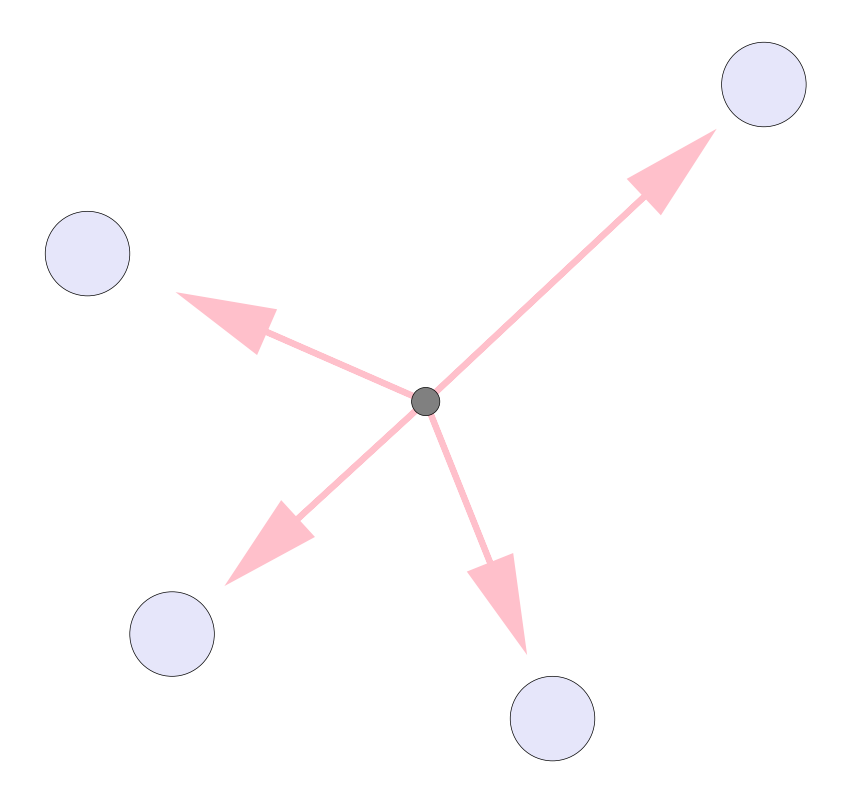

In [13]:
colors = ["lightcoral", "plum", "olive", "goldenrod", "grey" , "limegreen", "cornflowerblue", ]
ax=None
zoom=1
figsize=(15, 15)
core_corner=None
check_ancilla_in_core: bool = True
envelop_rect=None
rotate: bool=True
radius=0.1

fig, axx = plt.subplots(figsize=(15, 15))

axx.set_aspect('equal', 'box')
axx.axis('off')

axx.scatter(0, 0, color="white", s=0.6, alpha=0)
coords = [(.1,.1), (1,-.1),(1.5, 1.4),(-.1, 1), ]
for coord in coords:
    circle = plt.Circle(
    coord, radius=radius, alpha=1.0, lw=0.7, ec="black", fc="lavender", zorder=20
    )
    axx.add_patch(circle)
    
for edge in Polygons.create_polygon_from_cycle(coords):
    x, y = list(zip(*edge))
    outline=mpe.withStroke(linewidth=15.5, foreground='black')
    axx.plot(x, y, color='#FFC0CB', lw=15, path_effects=[outline])
    
axx.figure.savefig(paths.plots / f"ThesisFigures/scope_and_moi_in_polygon_0.pdf",bbox_inches='tight')
   
fig, axx = plt.subplots(figsize=(15, 15))

axx.set_aspect('equal', 'box')
axx.axis('off')

axx.scatter(0, 0, color="white", s=0.6, alpha=0)
coords = [(.1,.1), (1,-.1),(1.5, 1.4),(-.1, 1), ]
for coord in coords:
    circle = plt.Circle(
    coord, radius=radius, alpha=1.0, lw=0.7, ec="black", fc="lavender", zorder=20
    )
    axx.add_patch(circle)
    
patch = plt.Polygon(
coords,
zorder=0,
lw=0.5,
facecolor="#FFC0CB",
fill=True,
edgecolor='black',
)
axx.add_patch(patch)

axx.figure.savefig(paths.plots / f"ThesisFigures/scope_and_moi_in_polygon_1.pdf",bbox_inches='tight')

fig, axx = plt.subplots(figsize=(15, 15))


axx.set_aspect('equal', 'box')
axx.axis('off')

axx.scatter(0, 0, color="white", s=0.6, alpha=0)
coords = [(.1,.1), (1,-.1),(1.5, 1.4),(-.1, 1), ]
center = Polygons.center_of_coords(coords)
circle = plt.Circle(
center, radius=radius/3, alpha=1.0, lw=0.7, ec="black", fc="grey", zorder=20
)
axx.add_patch(circle)
for coord in coords:
    circle = plt.Circle(
    coord, radius=radius, alpha=1.0, lw=0.7, ec="black", fc="lavender", zorder=20
    )
    axx.add_patch(circle)

for coord in coords:
    vector = np.subtract(coord, center)
    length = np.linalg.norm(vector)
    if length > 1:
        vector /= 1.4 * length
    else:
        vector /= (2.4 * length)
    x, y = vector
#     axx.plot(x, y, color='#FFC0CB', lw=10)
    axx.arrow(center[0], center[1], x, y, linewidth=6,head_width=0.1, head_length=0.2, fc='#FFC0CB', ec='#FFC0CB', zorder=6)
    
axx.figure.savefig(paths.plots / f"ThesisFigures/scope_and_moi_in_polygon_2.pdf",bbox_inches='tight')


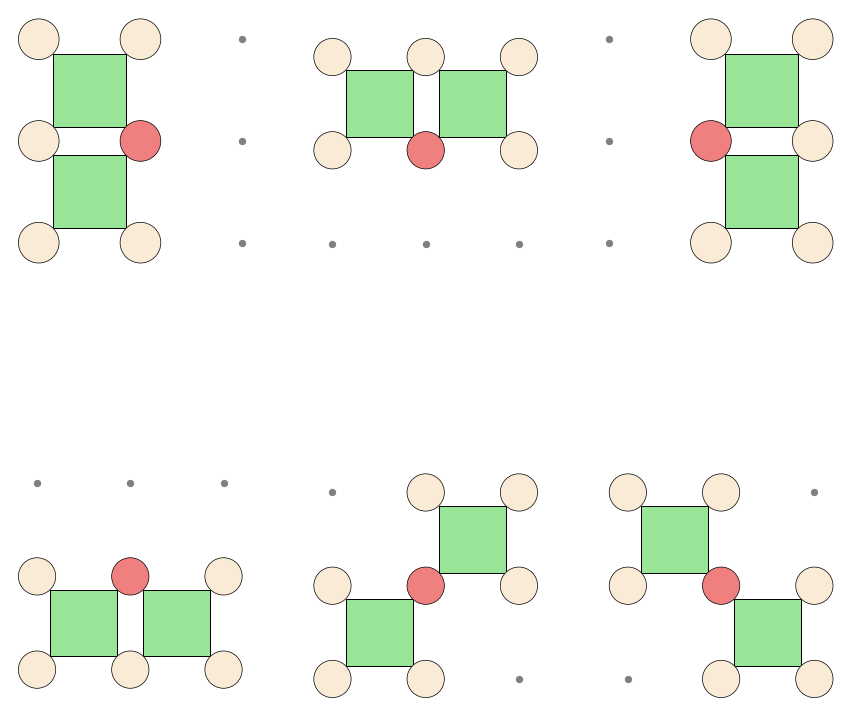

In [14]:
N = 6
rotate = True
graph = Graph.init_without_edges(N, [(0,1),(0,2),(1,2),(3,4),(3,5),(4,5)])
qbits = Qbits.init_qbits_from_dict(graph, dict(zip(graph.qubits, graph.qubits)), assign_to_core=False)
qbits[(1,4)].ancilla = True
qbits[(1,4)].core = True
nodes_object = Nodes(qbits, place_qbits_in_lines=False)
polygon_object = Polygons(nodes_object, scope_measure=True)
fig, ax = plt.subplots(2, 3, figsize=(15, 15))

polygons = [
    [(0, 3), (1, 3), (1, 4), (0, 4)],
    [(0, 4), (1, 4), (1, 5), (0, 5)],
]
visualize_ancilla(polygon_object, ax[0,0], polygons, s=40)

polygons = [
    [(0, 4), (1, 4), (1, 5), (0, 5)],
    [(1, 4), (2, 4), (2, 5), (1, 5)]
]
visualize_ancilla(polygon_object, ax[0,1], polygons, s=40)

polygons = [
    [(1, 3), (2, 3), (2, 4), (1, 4)],
    [(1, 4), (2, 4), (2, 5), (1, 5)]
]
visualize_ancilla(polygon_object, ax[0,2], polygons, s=40)

polygons = [
    [(0, 3), (1, 3), (1, 4), (0, 4)],
    [(1, 3), (2, 3), (2, 4), (1, 4)],
]
visualize_ancilla(polygon_object, ax[1,0], polygons, s=40)

polygons = [
    [(0, 3), (1, 3), (1, 4), (0, 4)],
    [(1, 4), (2, 4), (2, 5), (1, 5)]
]
visualize_ancilla(polygon_object, ax[1,1], polygons, s=40)

polygons = [
    [(0, 4), (1, 4), (1, 5), (0, 5)],
    [(1, 3), (2, 3), (2, 4), (1, 4)],
]
visualize_ancilla(polygon_object, ax[1,2], polygons, s=40)

fig.figure.savefig(paths.plots / f"ThesisFigures/ancilla_proposals.pdf",bbox_inches='tight')

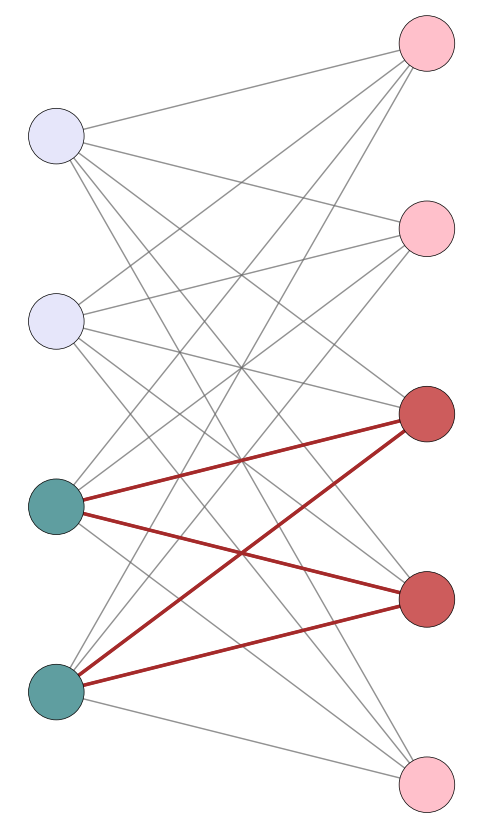

In [101]:
self = polygon_object
ax=None
zoom=1
figsize=(15, 15)
core_corner=None
check_ancilla_in_core: bool = True
envelop_rect=None
rotate: bool=True
radius=0.15

_, ax = plt.subplots(figsize=figsize)

ax.set_aspect('equal', 'box')
ax.axis('off')

ax.scatter(0, 0, color="white", s=0.6, alpha=0)
Acoords = [(0, 1), (0, 2), (0, 3), (0, 4)]
Acoords = [(x, y + .5) for (x, y) in Acoords]

Bcoords = [(1, 1), (1, 2), (1, 3), (1, 4), (1, 5)]
Bcoords = [(x + 1, y) for (x, y) in Bcoords]

edges = [(a, b) for a in Acoords for b in Bcoords]

A, B  = [Acoords[0], Acoords[1]], [Bcoords[1], Bcoords[2]]


for coord in Acoords:
    fc="lavender"
    if coord in A:
        fc='cadetblue'
    circle = plt.Circle(
    coord, radius=radius, alpha=1.0, lw=0.7, ec="black", fc=fc, zorder=20
    )
    ax.add_patch(circle)
    
    

for coord in Bcoords:
    fc="#FFC0CB"
    if coord in B:
        fc='indianred'
    circle = plt.Circle(
    coord, radius=radius, alpha=1.0, lw=0.7, ec="black", fc=fc, zorder=20
    )
    ax.add_patch(circle)
    

for edge in edges:
    if edge[0] in A and edge[1] in B:
        x, y = list(zip(*edge))
        outline=mpe.withStroke(linewidth=3.5, foreground='#A52A2A')
        ax.plot(x, y, color='#A52A2A', lw=3, path_effects=[outline], zorder=5)
    
    else:  
        x, y = list(zip(*edge))
        outline=mpe.withStroke(linewidth=1.5, foreground='dimgray', alpha=0.5)
        ax.plot(x, y, color='dimgray', lw=1, path_effects=[outline], alpha=0.5)

ax.set_ylim(.8,5.2)

ax.figure.savefig(paths.plots / f"ThesisFigures/bipartite_graph.pdf",bbox_inches='tight')

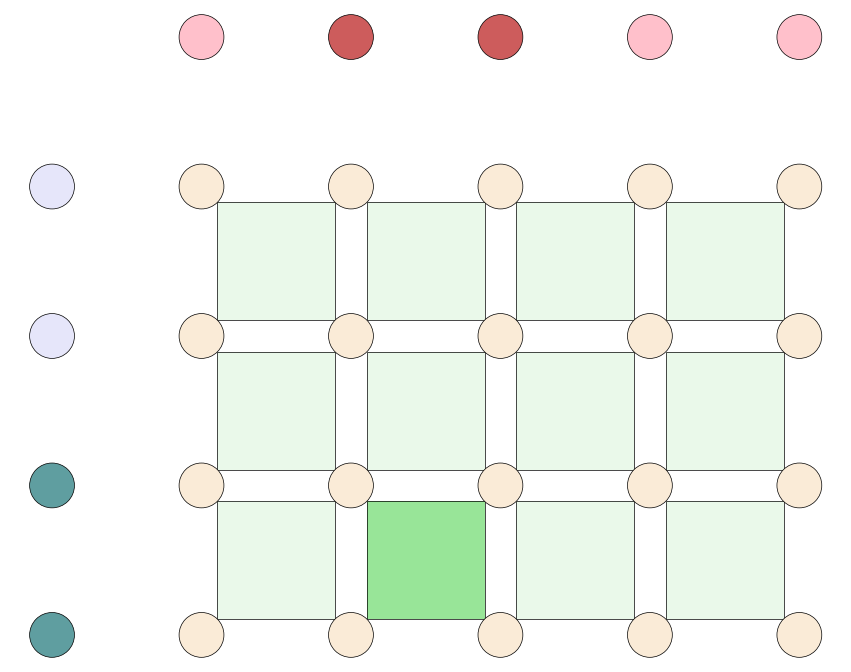

In [102]:
self = polygon_object
ax=None
zoom=1
figsize=(15, 15)
core_corner=None
check_ancilla_in_core: bool = True
envelop_rect=None
radius=0.15

_, ax = plt.subplots(figsize=figsize)

ax.set_aspect('equal', 'box')
ax.axis('off')

ax.scatter(0, 0, color="white", s=0.6, alpha=0)
Acoords = [(0, 1), (0, 2), (0, 3), (0, 4)]
Acoords = [(x, y) for (x, y) in Acoords]
Bcoords = [(1, 1), (1, 2), (1, 3), (1, 4), (1, 5)]
Bcoords = [(y, x+4) for (x, y) in Bcoords]
A, B  = [Acoords[0], Acoords[1]], [Bcoords[1], Bcoords[2]]


for coord in Acoords:
    fc="lavender"
    if coord in A:
        fc='cadetblue'
    circle = plt.Circle(
    coord, radius=radius, alpha=1.0, lw=0.7, ec="black", fc=fc, zorder=20
    )
    ax.add_patch(circle)

for coord in Bcoords:
    fc="#FFC0CB"
    if coord in B:
        fc='indianred'
    circle = plt.Circle(
    coord, radius=radius, alpha=1.0, lw=0.7, ec="black", fc=fc, zorder=20
    )
    ax.add_patch(circle)
    
    
    
N = 9
g = Graph.complete(9)
edges_to_remove =  [qubit for qubit in g.qubits if qubit[1]  in [1, 2, 3, 4] or qubit[0]  in [5, 6, 7]]
graph = Graph.init_without_edges(N,edges_to_remove)

qcd = {
(0, 5): (1, 1),
(0, 6): (1, 2),
(0, 7): (1, 3),
(0, 8): (1, 4),
(1, 5): (2, 1),
(1, 6): (2, 2),
(1, 7): (2, 3),
(1, 8): (2, 4),
(2, 5): (3, 1),
(2, 6): (3, 2),
(2, 7): (3, 3),
(2, 8): (3, 4),
(3, 5): (4, 1),
(3, 6): (4, 2),
(3, 7): (4, 3),
(3, 8): (4, 4),
(4, 5): (5, 1),
(4, 6): (5, 2),
(4, 7): (5, 3),
(4, 8): (5, 4),
}
qbits = Qbits.init_qbits_from_dict(graph, qcd, assign_to_core=False)
nodes_object = Nodes(qbits, place_qbits_in_lines=False)
polygon_object = Polygons(nodes_object, scope_measure=True)


self = polygon_object


if envelop_rect is None: envelop_rect = self.nodes_object.qbits.envelop_rect()
ax.scatter(*list(zip(*envelop_rect)), color="white", s=0.6, alpha=0)

# color plaquettes
for polygon in self.polygons_coords(
    self.nodes_object.qbits.qubit_to_coord_dict, self.polygons
):
    fill, facecolor, lw, alpha, edge_alpha = False, None, 0, 0, 0
    measure = self.scope_of_polygon(polygon)
    if measure == self.unit_square:
        fill, facecolor, lw, alpha, edge_alpha = True, "limegreen", 1, 0.1, .7
        if len(set(polygon).intersection([(3, 2), (2, 1)])) == 2:
            #facecolor = "plum"
            alpha=0.5
        polygon = Polygons.scale(polygon, radius)

    patch = plt.Polygon(
        polygon,
        zorder=0,
        fill=fill,
        lw=0,
        facecolor=facecolor,
        alpha=alpha,
    )
    edge = plt.Polygon(
        polygon,
        zorder=0,
        fill=False,
        lw=lw,
        edgecolor="black",
        alpha=edge_alpha
    )
    ax.add_patch(patch)
    ax.add_patch(edge)
# color qbits
for qbit in self.nodes_object.qbits:
    

    label = ax.annotate(
        r"{}".format(''),#*qbit.coord),
        xy=qbit.coord,
        ha="center",
        va="center",
        fontsize=15,
        zorder=20,
    )
    if qbit.core == False:
        circle = plt.Circle(
            qbit.coord, radius=radius, alpha=1.0, lw=0.7, ec="black", fc="antiquewhite", zorder=20
        )
    if qbit.ancilla == True:
        circle = plt.Circle(
            qbit.coord, radius=radius, alpha=1.0, lw=0.7, ec="black", fc="lightcoral"
        )
    ax.add_patch(circle)
ax.set_xlim(-.3, 5.3)
ax.set_ylim(.8,5.2)
ax.figure.savefig(paths.plots / f"ThesisFigures/bipartite_core.pdf",bbox_inches='tight')

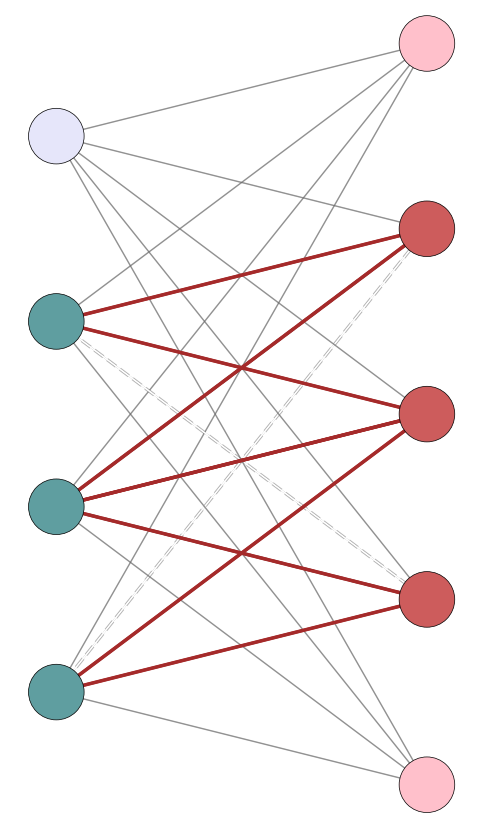

In [103]:
matplotlib.rcParams['hatch.linewidth'] = 2.5  # previous pdf hatch linewidth

self = polygon_object
ax=None
zoom=1
figsize=(15, 15)
core_corner=None
check_ancilla_in_core: bool = True
envelop_rect=None
rotate: bool=True
radius=0.15

_, ax = plt.subplots(figsize=figsize)

ax.set_aspect('equal', 'box')
ax.axis('off')

ax.scatter(0, 0, color="white", s=0.6, alpha=0)
Acoords = [(0, 1), (0, 2), (0, 3), (0, 4)]
Acoords = [(x, y + .5) for (x, y) in Acoords]

Bcoords = [(1, 1), (1, 2), (1, 3), (1, 4), (1, 5)]
Bcoords = [(x + 1, y) for (x, y) in Bcoords]

edges = [(a, b) for a in Acoords for b in Bcoords]

A, B  = [Acoords[0], Acoords[1]], [Bcoords[1], Bcoords[2]]
A1, B1 = [Acoords[1], Acoords[2]], [Bcoords[2], Bcoords[3]]


for coord in Acoords:
    fc="lavender"
    hatch = None
    ec = 'black'
    if coord in A:
        fc='cadetblue'
    if coord in A1:
        fc='cadetblue'
    circle = plt.Circle(
    coord, radius=radius, alpha=1.0, lw=0.7, ec=ec, fc=fc, zorder=20, hatch=hatch
    )
    ax.add_patch(circle)
    
    

for coord in Bcoords:
    fc="#FFC0CB"
    if coord in B:
        fc='indianred'
    if coord in B1:
        fc='indianred'
    circle = plt.Circle(
    coord, radius=radius, alpha=1.0, lw=0.7, ec="black", fc=fc, zorder=20
    )
    ax.add_patch(circle)
    

for edge in edges:
    x, y = list(zip(*edge))
    outline=mpe.withStroke(linewidth=1.5, foreground='dimgray', alpha=0.5)
    ax.plot(x, y, color='dimgray', lw=1, path_effects=[outline], alpha=0.5)
    if edge[0] in A1 and edge[1] in B1:
        x, y = list(zip(*edge))
        outline=mpe.withStroke(linewidth=3.5, foreground='#A52A2A')
        ax.plot(x, y, color='#A52A2A', lw=3, path_effects=[outline], zorder=5)
    if edge[0] in A and edge[1] in B:
        x, y = list(zip(*edge))
        outline=mpe.withStroke(linewidth=3.5, foreground='#A52A2A')
        ax.plot(x, y, color='#A52A2A', lw=3, path_effects=[outline], zorder=5)    
    if edge[0] in A1 and edge[1] in (set(B) - set(B1)):
        x, y = list(zip(*edge))
        outline=mpe.withStroke(linewidth=1.5, foreground='white', alpha=1)
        ax.plot(x, y, color='white', lw=1, path_effects=[outline], alpha=1)
        outline=mpe.withStroke(linewidth=3.5, foreground='dimgray', alpha=0.3)
        ax.plot(x, y, color='dimgray', lw=3, path_effects=[outline], zorder=0, alpha=0.3, linestyle='--')  

    if edge[0] in A and edge[1] in (set(B1) - set(B)):
        x, y = list(zip(*edge))
        outline=mpe.withStroke(linewidth=1.5, foreground='white', alpha=1)
        ax.plot(x, y, color='white', lw=1, path_effects=[outline], alpha=1)
        outline=mpe.withStroke(linewidth=3.5, foreground='dimgray', alpha=0.3)
        ax.plot(x, y, color='dimgray', lw=3, path_effects=[outline], zorder=0, alpha=0.3, linestyle='--')     


ax.set_ylim(.8,5.2)
ax.figure.savefig(paths.plots / f"ThesisFigures/merged_bipartite_graph.pdf",bbox_inches='tight')

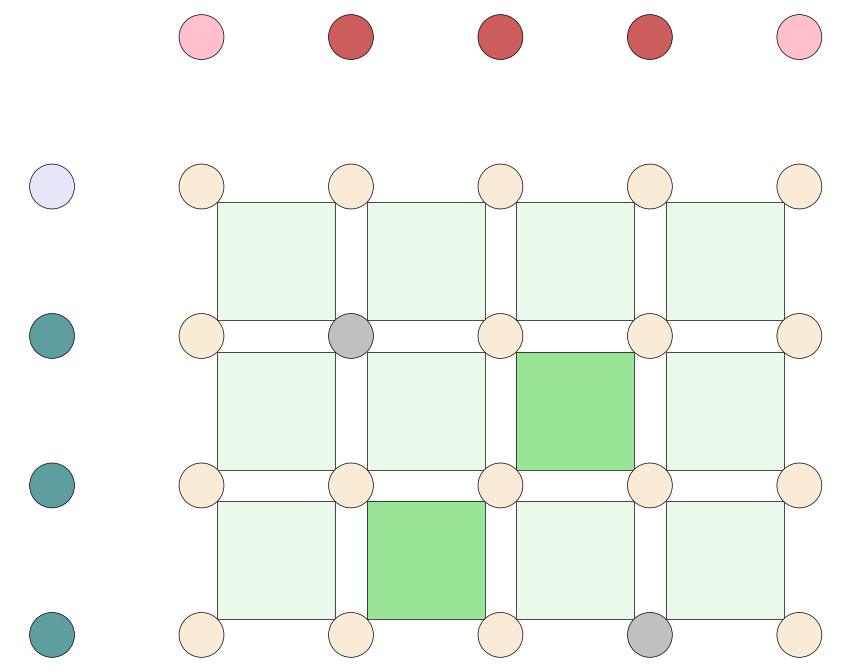

In [104]:
self = polygon_object
ax=None
zoom=1
figsize=(15, 15)
core_corner=None
check_ancilla_in_core: bool = True
envelop_rect=None
radius=0.15

_, ax = plt.subplots(figsize=figsize)

ax.set_aspect('equal', 'box')
ax.axis('off')

ax.scatter(0, 0, color="white", s=0.6, alpha=0)
Acoords = [(0, 1), (0, 2), (0, 3), (0, 4)]
Acoords = [(x, y) for (x, y) in Acoords]
Bcoords = [(1, 1), (1, 2), (1, 3), (1, 4), (1, 5)]
Bcoords = [(y, x+4) for (x, y) in Bcoords]
A, B  = [Acoords[0], Acoords[1]], [Bcoords[1], Bcoords[2]]
A1, B1 = [Acoords[1], Acoords[2]], [Bcoords[2], Bcoords[3]]


for coord in Acoords:
    fc="lavender"
    if coord in A:
        fc='cadetblue'
    if coord in A1:
        fc='cadetblue'
    circle = plt.Circle(
    coord, radius=radius, alpha=1.0, lw=0.7, ec="black", fc=fc, zorder=20
    )
    ax.add_patch(circle)
    
    

for coord in Bcoords:
    fc="#FFC0CB"
    if coord in B:
        fc='indianred'
    if coord in B1:
        fc='indianred'
    circle = plt.Circle(
    coord, radius=radius, alpha=1.0, lw=0.7, ec="black", fc=fc, zorder=20
    )
    ax.add_patch(circle)
    
    
N = 9
g = Graph.complete(9)
edges_to_remove =  [qubit for qubit in g.qubits if qubit[1]  in [1, 2, 3, 4] or qubit[0]  in [5, 6, 7]]
graph = Graph.init_without_edges(N,edges_to_remove)

qcd = {
(0, 5): (1, 1),
(0, 6): (1, 2),
(0, 7): (1, 3),
(0, 8): (1, 4),
(1, 5): (2, 1),
(1, 6): (2, 2),
(1, 7): (2, 3),
(1, 8): (2, 4),
(2, 5): (3, 1),
(2, 6): (3, 2),
(2, 7): (3, 3),
(2, 8): (3, 4),
(3, 5): (4, 1),
(3, 6): (4, 2),
(3, 7): (4, 3),
(3, 8): (4, 4),
(4, 5): (5, 1),
(4, 6): (5, 2),
(4, 7): (5, 3),
(4, 8): (5, 4),
}
qbits = Qbits.init_qbits_from_dict(graph, qcd, assign_to_core=False)
nodes_object = Nodes(qbits, place_qbits_in_lines=False)
polygon_object = Polygons(nodes_object, scope_measure=True)


self = polygon_object


if envelop_rect is None: envelop_rect = self.nodes_object.qbits.envelop_rect()
ax.scatter(*list(zip(*envelop_rect)), color="white", s=0.6, alpha=0)

# color plaquettes
for polygon in self.polygons_coords(
    self.nodes_object.qbits.qubit_to_coord_dict, self.polygons
):
    fill, facecolor, lw, alpha, edge_alpha = False, None, 0, 0, 0
    measure = self.scope_of_polygon(polygon)

    if measure == self.unit_square:
        fill, facecolor, lw, alpha, edge_alpha = True, "limegreen", 1, 0.1, .7
        if len(set(polygon).intersection([(3, 2), (2, 1)])) == 2:
            alpha = .5
        if len(set(polygon).intersection([(3, 2), (4, 3)])) == 2:
            alpha = .5
        polygon = Polygons.scale(polygon, radius)

    patch = plt.Polygon(
        polygon,
        zorder=0,
        fill=fill,
        lw=0,
        facecolor=facecolor,
        alpha=alpha,
    )
    edge = plt.Polygon(
        polygon,
        zorder=0,
        fill=False,
        lw=lw,
        edgecolor="black",
        alpha=edge_alpha
    )
    ax.add_patch(patch)
    ax.add_patch(edge)
# color qbits
for qbit in self.nodes_object.qbits:
    
    if qbit.coord in [(2, 3), (4, 1)]:
        qbit.ancilla = True
    label = ax.annotate(
        "",#r"{}, {}".format(*qbit.coord),
        xy=qbit.coord,
        ha="center",
        va="center",
        fontsize=15,
        zorder=20,
    )
    if qbit.core == False:
        circle = plt.Circle(
            qbit.coord, radius=radius, alpha=1.0, lw=0.7, ec="black", fc="antiquewhite", zorder=20
        )
    if qbit.ancilla == True:
        circle = plt.Circle(
            qbit.coord, radius=radius, alpha=1.0, lw=.7, ec="black", fc="silver",
        )
    ax.add_patch(circle)

ax.set_xlim(-.3, 5.3)
ax.set_ylim(.8,5.2)
ax.figure.savefig(paths.plots / f"ThesisFigures/merged_bipartite_core.pdf",bbox_inches='tight')

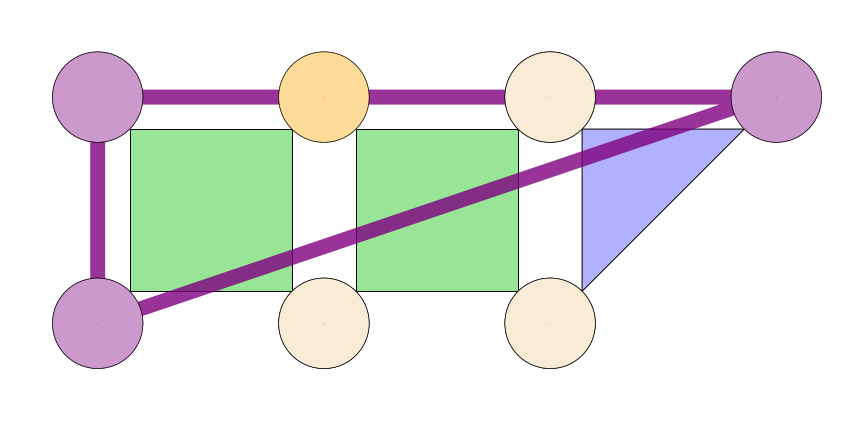

In [105]:
colors = ["purple"] #olive

missing_link = [(1, 4)]
N = 5
rotate = False
graph = Graph.init_without_edges(N, [(0, 1), (0, 2), (1, 2)])
qbits = Qbits.init_qbits_from_dict(graph, dict(zip(graph.qubits, graph.qubits)), assign_to_core=False)
qbits[missing_link[0]].ancilla = True
qbits[missing_link[0]].core = True 
nodes_object = Nodes(qbits, place_qbits_in_lines=False)
polygon_object = Polygons(nodes_object, scope_measure=True)
polygon = [(0, 4), (0, 3), (2.95, 4)]
colors_ = [(0, 3), (0, 4), (3, 4)]
fig, ax = plt.subplots(figsize=figsize)

idx = 0
    
for qbit in qbits:
    qbit.color = 'antiquewhite'
    qbit.alpha = 1
for color in colors_:
    qbits[color].color = colors[idx]
    qbits[color].alpha = 0.4

qbits[(1, 4)].color = 'orange'
qbits[(1, 4)].alpha = 0.4
ax = color_qubits(polygon_object, ax=ax, rotate=rotate, fontsize=0)
polygon = [Polygons.rotate_coords_by_45(coord, rotate) for coord in polygon]
patch = plt.Polygon(
    polygon,
    zorder=0,
    lw=15,
    alpha=0.8,
    color=colors[idx],
    fill=False,
)
ax.add_patch(patch)
plt.subplots_adjust(wspace=-.2, hspace=-.6)
ax.set_xlim(-.4,3.3)
ax.set_ylim(2.6,4.4)

ax.figure.savefig(paths.plots / f"ThesisFigures/implicit_implicit_constraint_3.pdf")


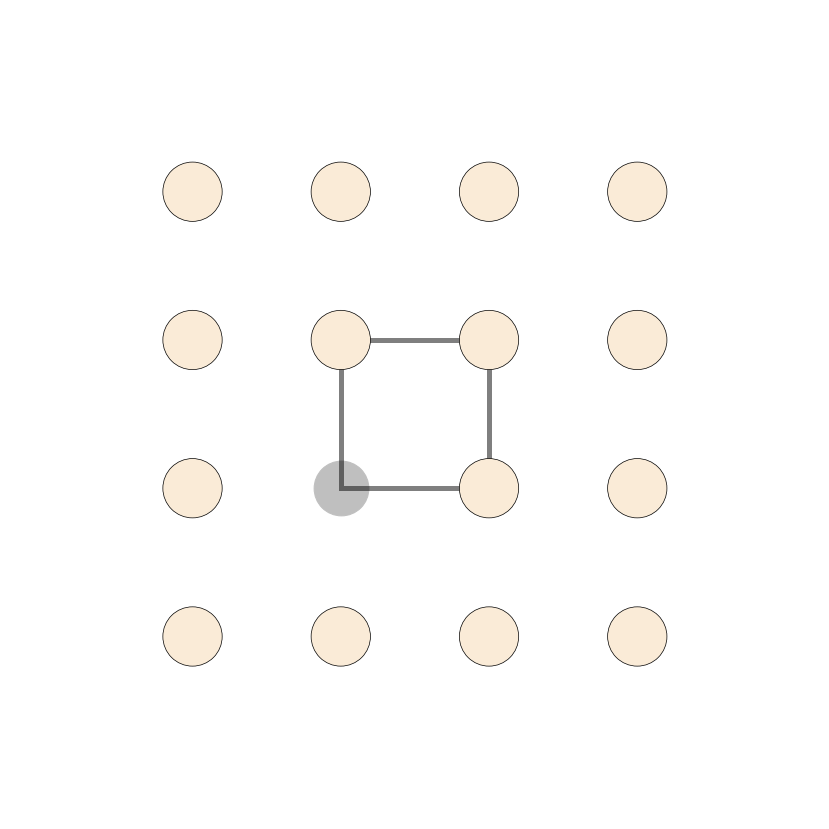

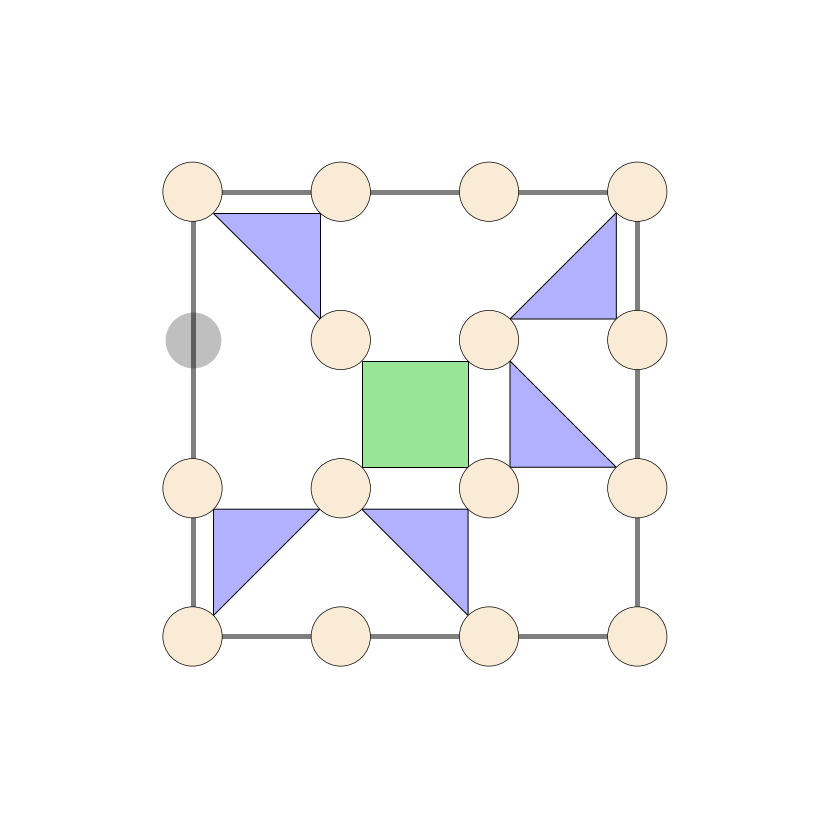

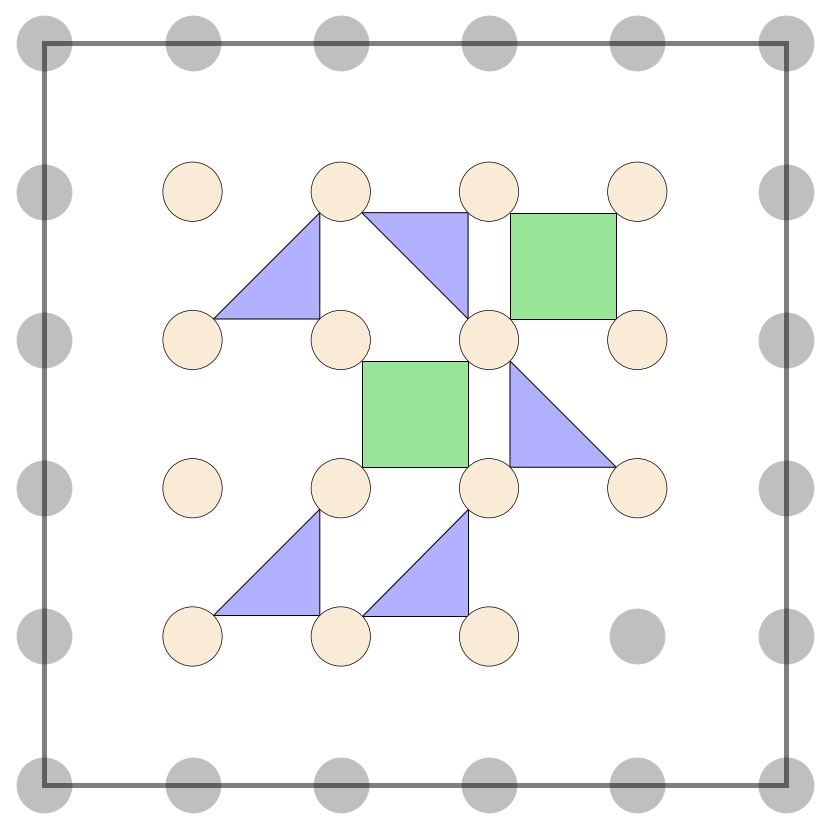

In [20]:


d_0 = {(0, 1): (0, 2), (0, 2): (3, 2), (0, 3): (2, 1), (0, 4): (3, 0), (0, 5): (0, 1), (1, 2): (3, 1), (1, 3): (3, 3), (1, 4): (2, 3), (1, 5): (0, 3), (2, 3): (1, 2), (2, 4): (0, 0), (2, 5): (2, 0), (3, 4): (1, 0), (3, 5): (2, 2), (4, 5): (1, 3)}
d_1 = {(0, 1): (0, 1), (0, 2): (1, 1), (0, 3): (2, 1), (0, 4): (3, 0), (0, 5): (3, 1), (1, 2): (0, 0), (1, 3): (3, 3), (1, 4): (2, 3), (1, 5): (3, 2), (2, 3): (2, 0), (2, 4): (0, 3), (2, 5): (1, 2), (3, 4): (1, 0), (3, 5): (2, 2), (4, 5): (1, 3)}
d_2 = {(0, 1): (1, 0), (0, 2): (1, 1), (0, 3): (2, 1), (0, 4): (0, 3), (0, 5): (3, 1), (1, 2): (0, 0), (1, 3): (2, 0), (1, 4): (3, 3), (1, 5): (3, 2), (2, 3): (0, 1), (2, 4): (0, 2), (2, 5): (1, 2), (3, 4): (2, 3), (3, 5): (2, 2), (4, 5): (1, 3)}
d_3 = {(0, 1): (2, 0), (0, 2): (1, 1), (0, 3): (2, 1), (0, 4): (0, 3), (0, 5): (3, 1), (1, 2): (0, 0), (1, 3): (1, 0), (1, 4): (3, 3), (1, 5): (3, 2), (2, 3): (0, 1), (2, 4): (0, 2), (2, 5): (1, 2), (3, 4): (2, 3), (3, 5): (2, 2), (4, 5): (1, 3)}


graph = Graph.complete(6)
energy_object = functions_for_benchmarking.init_energy(graph)
mc = MC(energy_object)

radius = 3000
color = 0.75
mc.corner = ((1, 2), (1, 2))
mc.possible_coords = coords_from_corner(mc.corner)

fig, ax = plt.subplots(figsize=(15, 15))
mc.energy.polygon_object.nodes_object.qbits.update_qbits_from_dict(d_0, assign_to_core=False)
ax = visualize_without_labels(mc.energy.polygon_object, ax = ax, core_corner=mc.corner, corner_lw=5)
mc.energy.polygon_object.color_coords(ax, [(coord, color) for coord in mc.possible_coords], radius=radius)

ax.figure.savefig(paths.plots / f"ThesisFigures/envelop_shell_search_1.pdf")

fig, ax = plt.subplots(figsize=(15, 15))
(min_x, max_x), (min_y, max_y) = mc.corner
mc.corner = (min_x - 1, max_x + 1), (min_y - 1, max_y + 1)
mc.energy.polygon_object.nodes_object.qbits.update_qbits_from_dict(d_1, assign_to_core=False)
ax = visualize_without_labels(mc.energy.polygon_object, ax = ax, core_corner=mc.corner, corner_lw=5)
mc.possible_coords = coords_from_corner(mc.corner)
mc.energy.polygon_object.color_coords(ax, [(coord, color) for coord in mc.possible_coords], radius=radius)
ax.figure.savefig(paths.plots / f"ThesisFigures/envelop_shell_search_2.pdf")

fig, ax = plt.subplots(figsize=(15, 15))
(min_x, max_x), (min_y, max_y) = mc.corner
mc.corner = (min_x - 1, max_x + 1), (min_y - 1, max_y + 1)
mc.energy.polygon_object.nodes_object.qbits.update_qbits_from_dict(d_2, assign_to_core=False)
ax = visualize_without_labels(mc.energy.polygon_object, ax = ax, core_corner=mc.corner, corner_lw=5)
mc.possible_coords = coords_from_corner(mc.corner)
mc.energy.polygon_object.color_coords(ax, [(coord, color) for coord in mc.possible_coords], radius=radius)
ax.figure.savefig(paths.plots / f"ThesisFigures/envelop_shell_search_3.pdf")

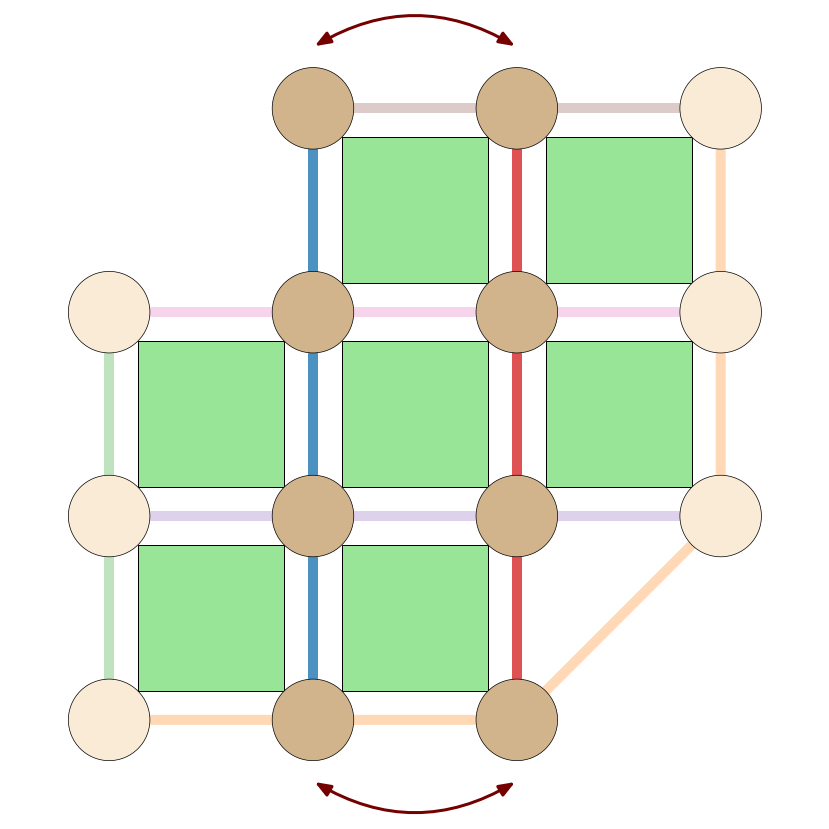

In [22]:
core_qubit_to_coord_dict = {(0, 1): (1, 3), (0, 4): (1, 4), (0, 5): (1, 6), (0, 6): (1, 5), (1, 2): (0, 3), (1, 3): (2, 3), (1, 4): (3, 4), (1, 5): (3, 6), (1, 6): (3, 5), (2, 4): (0, 4), (2, 6): (0, 5), (3, 4): (2, 4), (3, 5): (2, 6), (3, 6): (2, 5)}
graph_for_core = Graph.init_without_edges(7, [qubit for qubit in Graph.complete(7).qubits if qubit not in list(core_qubit_to_coord_dict)])
qbits_for_core = Qbits.init_qbits_from_dict(graph_for_core, dict())
nodes_object_for_core = Nodes(qbits_for_core)
polygon_object_for_core = Polygons(
    nodes_object_for_core,
    polygons=Polygons.create_polygons(graph_for_core.get_cycles(4)),
)
energy_for_core = Energy_core(polygon_object_for_core)
energy_for_core.polygon_object.nodes_object.qbits.update_qbits_from_dict(core_qubit_to_coord_dict)
energy_for_core.line_exponent = 1

energy_for_core.bad_line_penalty = 1
energy_for_core.line_energy(energy_for_core.polygon_object.nodes_object.qbits)

energy_for_core.polygon_object.nodes_object.qbits[(1, 5)].core = False
energy_for_core.polygon_object.nodes_object.qbits[(1, 2)].core = False
energy_for_core.polygon_object.nodes_object.qbits[(1, 4)].core = False

energy_for_core.polygon_object.nodes_object.qbits[(1, 6)].core = False
energy_for_core.polygon_object.nodes_object.qbits[(2, 6)].core = False
energy_for_core.polygon_object.nodes_object.qbits[(2, 4)].core = False

ax = visualize_without_labels(energy_for_core.polygon_object)#
#ax = energy_for_core.polygon_object.visualize()


for node in energy_for_core.polygon_object.nodes_object.qbits.graph.nodes:
    alpha = 0.3
    if node in [0, 3]:
        alpha = 0.8
    qbits_path, _ = energy_for_core.polygon_object.line_to_node(node)
    a = ax.plot(
        [Polygons.rotate_coords_by_45(qbit.coord, rotate)[0] for qbit in qbits_path],
        [Polygons.rotate_coords_by_45(qbit.coord, rotate)[1] for qbit in qbits_path],
        linewidth = 10,
        alpha=alpha,
    )
    a[0].set_solid_capstyle('round')

style="<|-|>,head_width=5,head_length=13"
kw = dict(arrowstyle=style)
a3 = patches.FancyArrowPatch((2, 6.3), (1, 6.3),lw=3,connectionstyle="arc3,rad=0.3", **kw, zorder=39, color='#750000')
for a in [a3]:
    plt.gca().add_patch(a)
a3 = patches.FancyArrowPatch((2, 2.7), (1, 2.7),lw=3,connectionstyle="arc3,rad=-0.3", **kw, zorder=39, color='#750000')
for a in [a3]:
    plt.gca().add_patch(a)
plt.xlim(-.5,3.5)
plt.ylim(2.5, 6.5)
plt.savefig(paths.plots / f"ThesisFigures/line_swap_move.pdf")


/net/fermion/csba1344/CompilerQC/graph.py:184: UserWarning: adjacency matrix contains null columns
  warnings.warn("adjacency matrix contains null columns")


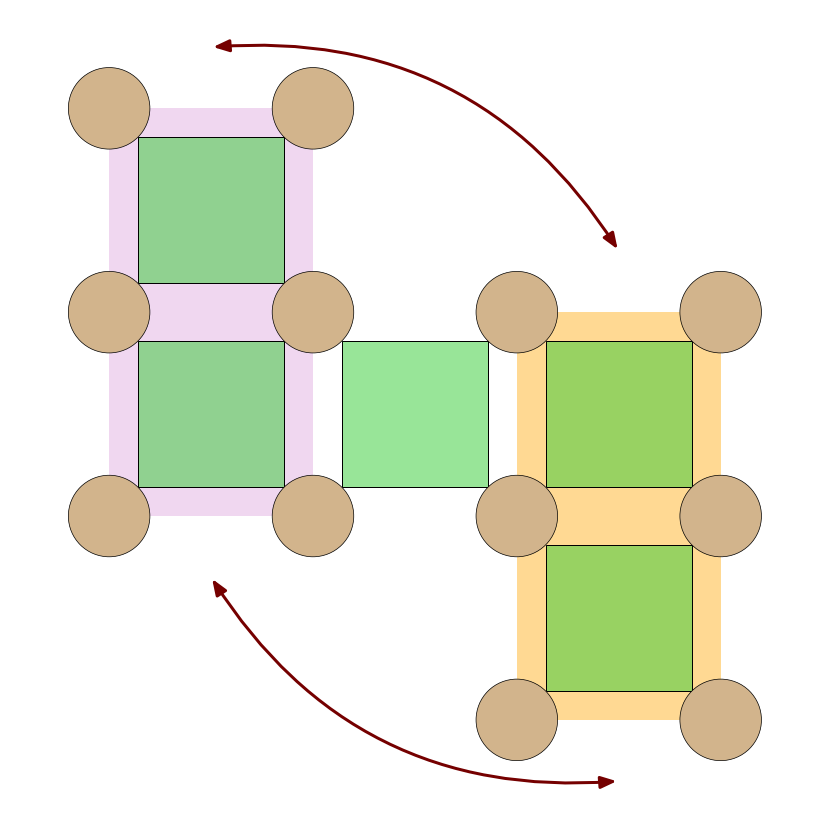

In [23]:
qubit_coord_dict = {
(1, 5): (0, 1),
(1, 4): (0, 2),
(1, 3): (0, 3),
# (1, 2): (0, 4),
(5, 6): (1, 1),
(4, 6): (1, 2),
(3, 6): (1, 3),
# (2, 6): (1, 4),
(0, 8): (2, 0),
(0, 5): (2, 1),
(0, 4): (2, 2),
(7, 8): (3, 0),
(5, 7): (3, 1),
(4, 7): (3, 2),
}

cluster1 = [(1, 3), (3, 6), (5, 6), (1, 5)]
cluster2 = [(0, 4), (4, 7), (7, 8), (0, 8)]

graph = Graph.init_without_edges(9, edges_to_remove=[qubit for qubit in Graph.complete(9).qubits if qubit not in qubit_coord_dict.keys()])
energy = functions_for_benchmarking.init_energy(graph)
mc = MC(energy)
mc.update_qbits_from_dict(qubit_coord_dict, assign_to_core=True)
rotate = False
ax = visualize_without_labels(mc.energy.polygon_object)#.visualize()

for color, polygon in zip(['plum', 'orange'], [cluster1, cluster2]):



    polygon = [qubit_coord_dict[qubit] for qubit in polygon]
    patch = plt.Polygon(
        polygon,
        fill=True,
        zorder=0,
        lw=0,
        alpha=0.42,
        color=color,
    )
    ax.add_patch(patch)
style="<|-|>,head_width=5,head_length=13"
kw = dict(arrowstyle=style)
a3 = patches.FancyArrowPatch((.5, 3.3), (2.5, 2.3),lw=3,connectionstyle="arc3,rad=-0.3", **kw, zorder=39, color='#750000')
for a in [a3]:
    plt.gca().add_patch(a)
    
a3 = patches.FancyArrowPatch((.5, .7), (2.5, -.3),lw=3,connectionstyle="arc3,rad=0.3", **kw, zorder=39, color='#750000')
for a in [a3]:
    plt.gca().add_patch(a)
plt.xlim(-.5,3.5)
plt.ylim(-.5, 3.5)  
plt.savefig(paths.plots / f"ThesisFigures/cluster_swap_move.pdf")


SCALING MODEL None
SCALING MODEL None
SCALING MODEL None


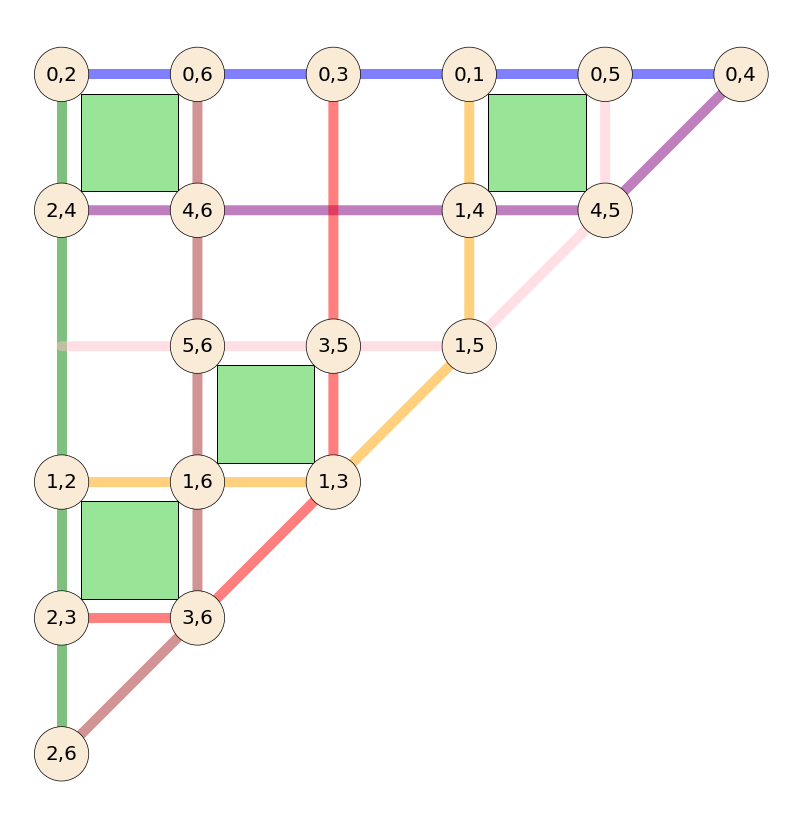

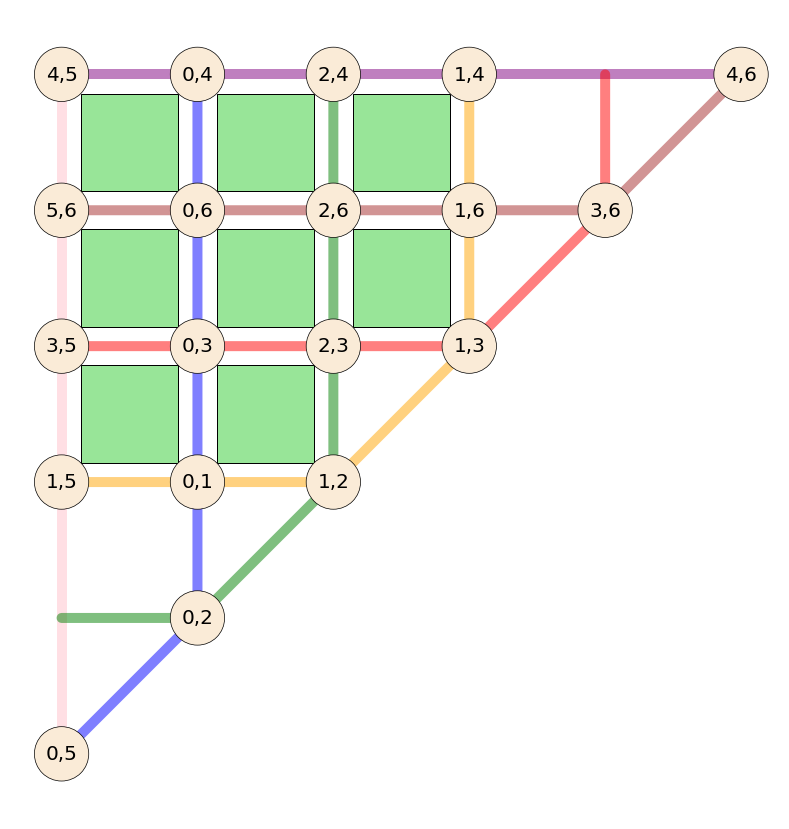

In [109]:
bad_core = {(0, 1): (3, 6), (0, 2): (0, 6), (0, 3): (2, 6), (0, 4): (5, 6), (0, 5): (4, 6), (0, 6): (1, 6), (1, 2): (0, 3), (1, 3): (2, 3), (1, 4): (3, 5), (1, 5): (3, 4), (1, 6): (1, 3), (2, 3): (0, 2), (2, 4): (0, 5), (2, 6): (0, 1), (3, 5): (2, 4), (3, 6): (1, 2), (4, 5): (4, 5), (4, 6): (1, 5), (5, 6): (1, 4)}
good_core = {(0, 1): (1, 3), (0, 2): (1, 2), (0, 3): (1, 4), (0, 4): (1, 6), (0, 5): (0, 1), (0, 6): (1, 5), (1, 2): (2, 3), (1, 3): (3, 4), (1, 4): (3, 6), (1, 5): (0, 3), (1, 6): (3, 5), (2, 3): (2, 4), (2, 4): (2, 6), (2, 6): (2, 5), (3, 5): (0, 4), (3, 6): (4, 5), (4, 5): (0, 6), (4, 6): (5, 6), (5, 6): (0, 5)}
colors = ["blue", "orange", "green", "red", "purple", "pink", "brown"] #olive
N = 7
graph_ = Graph.complete(N)
qbits_ = Qbits.init_qbits_from_dict(graph_, dict())
nodes_object_ = Nodes(qbits_, place_qbits_in_lines=True)
polygon_object_ = Polygons(nodes_object_)
energy_ = Energy(polygon_object_)
energy_.line_energy(energy_.polygon_object.nodes_object.qbits)
linewidth, alpha = 10, 0.5
for idx, node in enumerate(nodes_object_.nodes.values()):
    node.color = colors[idx]

    
graph = Graph.init_without_edges(N, edges_to_remove=[(2, 5), (3, 4)])#, (1, 6)])
qbits = Qbits.init_qbits_from_dict(graph, dict())
qbits.update_qbits_from_dict(bad_core, assign_to_core=False)
nodes_object = Nodes(qbits, place_qbits_in_lines=False)
polygon_object = Polygons(nodes_object, polygons=Polygons.create_polygons(graph.get_cycles(4)))
energy = Energy(polygon_object)
ax = energy.polygon_object.visualize(fontsize=20)
for node in energy.polygon_object.nodes_object.qbits.graph.nodes:
    qubits = [qbits.coord_to_qbit_dict.get(qbit.coord) for qbit in nodes_object_.qbits_of_nodes([node])]
    qubits = [x for x in qubits if x is not None]
    qubits = [qbit.qubit for qbit in qubits]
    x, y = qubits[:2]
    logical_node = list(set(x).intersection(y))[0]
    color=colors[logical_node]
    qbits_path, _ = energy_.polygon_object.line_to_node(node)
    a = ax.plot(
        [Polygons.rotate_coords_by_45(qbit.coord, rotate)[0] for qbit in qbits_path],
        [Polygons.rotate_coords_by_45(qbit.coord, rotate)[1] for qbit in qbits_path],
        linewidth = linewidth,
        alpha=alpha,
        color=color
    )
    a[0].set_solid_capstyle('round')
ax.set_xlim(-.4,5.3)
ax.set_ylim(.5,6.5)
ax.figure.savefig(paths.plots / f"ThesisFigures/core_search_bad.pdf")


graph = Graph.init_without_edges(N, edges_to_remove=[(2, 5), (3, 4)])#, (1, 6)])
qbits = Qbits.init_qbits_from_dict(graph, dict())
qbits.update_qbits_from_dict(good_core, assign_to_core=False)
nodes_object = Nodes(qbits, place_qbits_in_lines=False)
polygon_object = Polygons(nodes_object, polygons=Polygons.create_polygons(graph.get_cycles(4)))
energy = Energy(polygon_object)
ax = energy.polygon_object.visualize(fontsize=20)
for node in energy.polygon_object.nodes_object.qbits.graph.nodes:
    qubits = [qbits.coord_to_qbit_dict.get(qbit.coord) for qbit in nodes_object_.qbits_of_nodes([node])]
    qubits = [x for x in qubits if x is not None]
    qubits = [qbit.qubit for qbit in qubits]
    x, y = qubits[:2]
    logical_node = list(set(x).intersection(y))[0]
    color=colors[logical_node]
    qbits_path, _ = energy_.polygon_object.line_to_node(node)
    a = ax.plot(
        [Polygons.rotate_coords_by_45(qbit.coord, rotate)[0] for qbit in qbits_path],
        [Polygons.rotate_coords_by_45(qbit.coord, rotate)[1] for qbit in qbits_path],
        linewidth = linewidth,
        alpha=alpha,
        color=color
    )
    a[0].set_solid_capstyle('round')
ax.set_xlim(-.4,5.3)
ax.set_ylim(.5,6.5)
ax.figure.savefig(paths.plots / f"ThesisFigures/core_search_good.pdf")

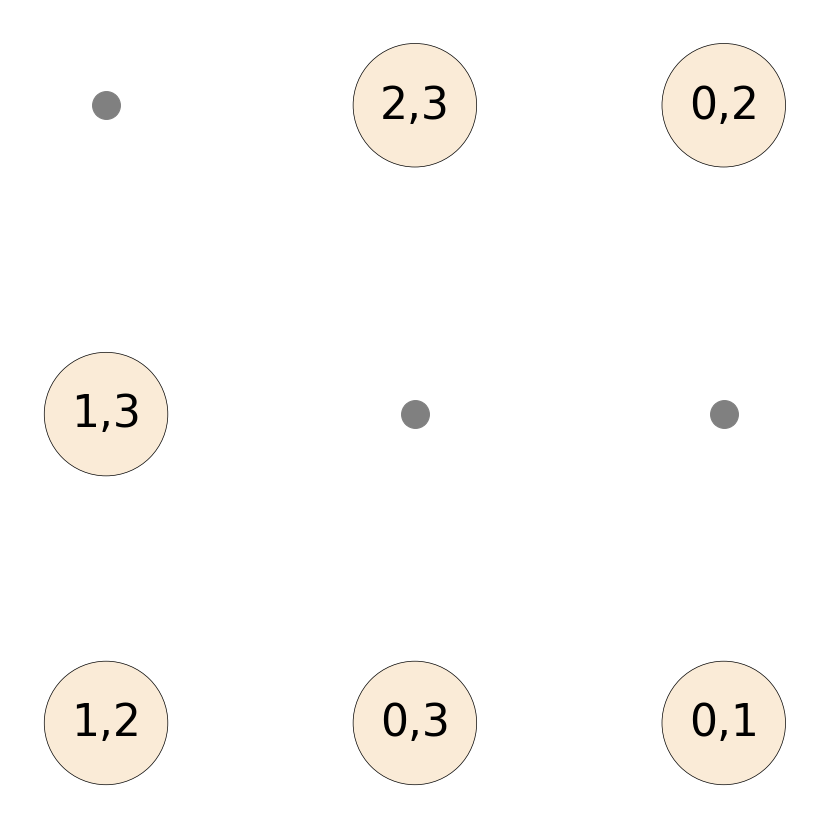

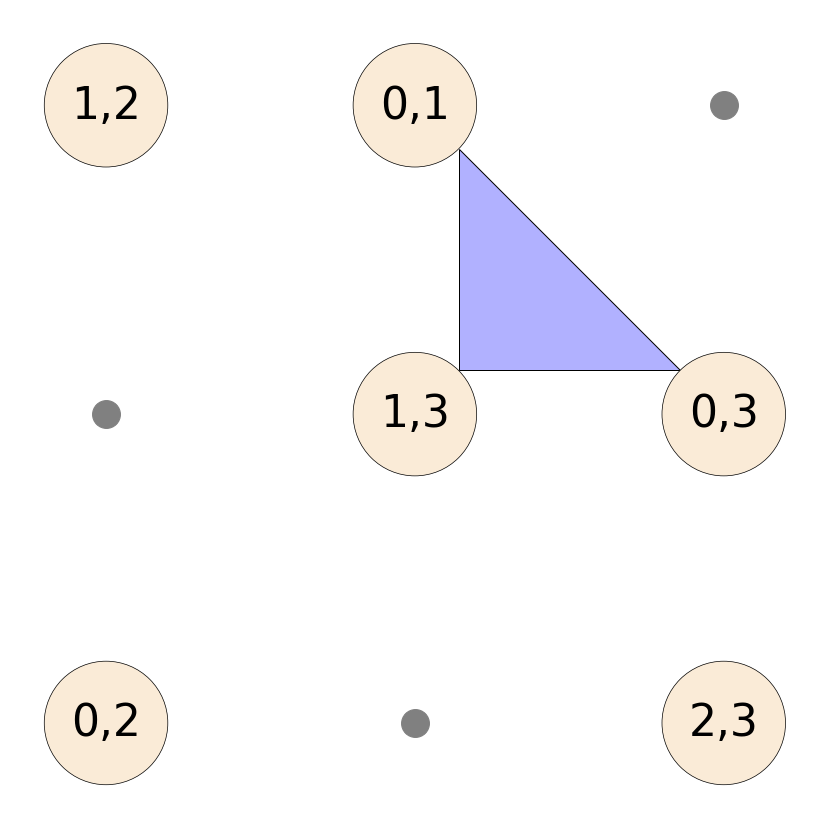

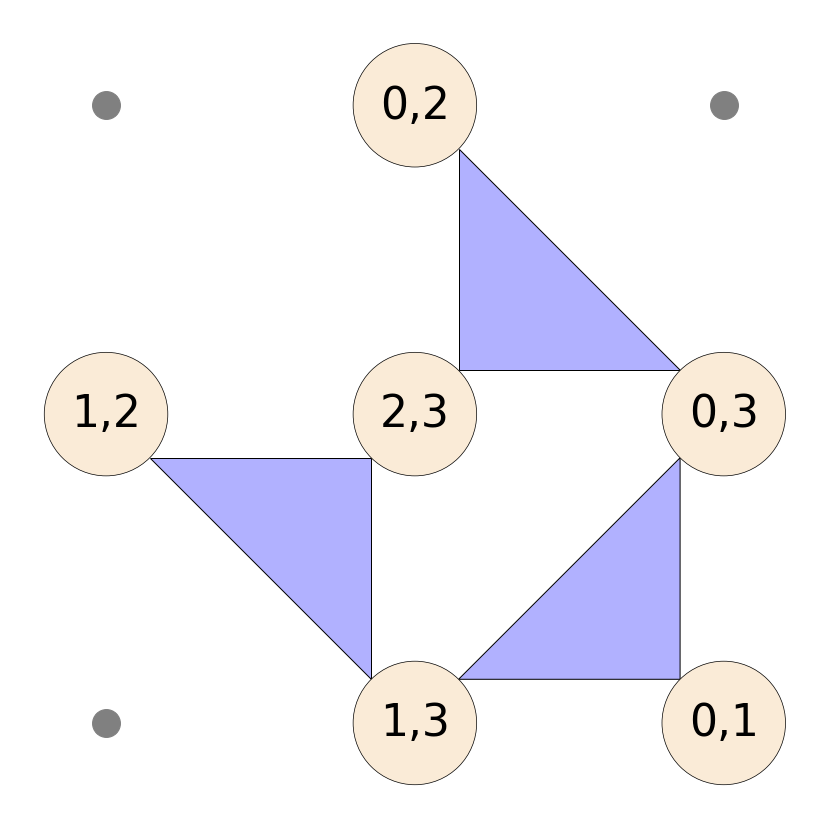

In [26]:

bad_qubit_to_coord_dict = {
 (0, 1): (2, 0),
 (0, 2): (2, 2),
 (0, 3): (1, 0),
 (1, 2): (0, 0),
 (1, 3): (0, 1),
 (2, 3): (1, 2)
}

ok_qubit_to_coord_dict = {
 (0, 1): (1, 2),
 (0, 2): (0, 0),
 (0, 3): (2, 1),
 (1, 2): (0, 2),
 (1, 3): (1, 1),
 (2, 3): (2, 0)}
good_qubit_to_coord_dict = {
 (0, 1): (2, 0),
 (0, 2): (1, 2),
 (0, 3): (2, 1),
 (1, 2): (0, 1),
 (1, 3): (1, 0),
 (2, 3): (1, 1)}
graph = Graph.complete(4)
qbits = Qbits.init_qbits_from_dict(graph, bad_qubit_to_coord_dict, assign_to_core=False)
nodes_object = Nodes(qbits, place_qbits_in_lines=False)
polygon_object = Polygons(nodes_object)
fig, ax = plt.subplots(figsize=(15, 15))
ax = visualize_without_labels(polygon_object, color_of_grid_points='grey', alpha_of_grid_points=1, ax=ax,without_label=False, padding=0, s=778, fontsize=44)
ax.figure.savefig(paths.plots / f"ThesisFigures/configuration_space_0.pdf")

qbits = Qbits.init_qbits_from_dict(graph, ok_qubit_to_coord_dict, assign_to_core=False)
nodes_object = Nodes(qbits, place_qbits_in_lines=False)
polygon_object = Polygons(nodes_object)
fig, ax = plt.subplots(figsize=(15, 15))
ax = visualize_without_labels(polygon_object, color_of_grid_points='grey', alpha_of_grid_points=1, ax=ax,without_label=False, padding=0, s=778, fontsize=44)
ax.figure.savefig(paths.plots / f"ThesisFigures/configuration_space_1.pdf")

qbits = Qbits.init_qbits_from_dict(graph, good_qubit_to_coord_dict, assign_to_core=False)
nodes_object = Nodes(qbits, place_qbits_in_lines=False)
polygon_object = Polygons(nodes_object)
fig, ax = plt.subplots(figsize=(15, 15))
ax = visualize_without_labels(polygon_object, color_of_grid_points='grey', alpha_of_grid_points=1, ax=ax,without_label=False, padding=0, s=778, fontsize=44)
ax.figure.savefig(paths.plots / f"ThesisFigures/configuration_space_2.pdf")

SCALING MODEL None
SCALING MODEL None


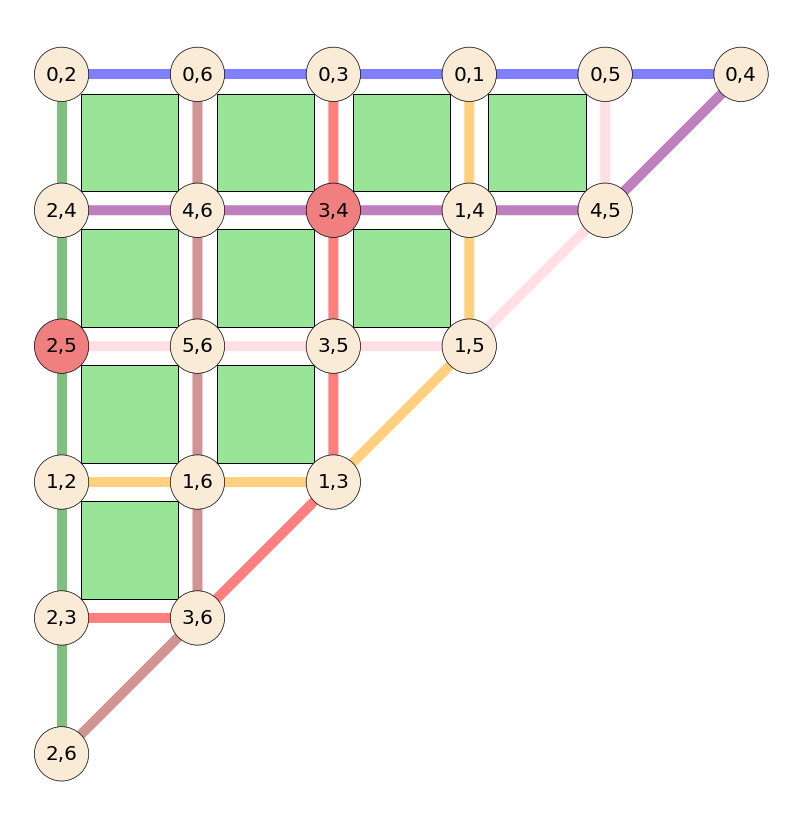

In [110]:
bad_core = {(2, 5): (0, 4), (3, 4): (2, 5), (0, 1): (3, 6), (0, 2): (0, 6), (0, 3): (2, 6), (0, 4): (5, 6), (0, 5): (4, 6), (0, 6): (1, 6), (1, 2): (0, 3), (1, 3): (2, 3), (1, 4): (3, 5), (1, 5): (3, 4), (1, 6): (1, 3), (2, 3): (0, 2), (2, 4): (0, 5), (2, 6): (0, 1), (3, 5): (2, 4), (3, 6): (1, 2), (4, 5): (4, 5), (4, 6): (1, 5), (5, 6): (1, 4)}
good_core = {(0, 1): (1, 3), (0, 2): (1, 2), (0, 3): (1, 4), (0, 4): (1, 6), (0, 5): (0, 1), (0, 6): (1, 5), (1, 2): (2, 3), (1, 3): (3, 4), (1, 4): (3, 6), (1, 5): (0, 3), (1, 6): (3, 5), (2, 3): (2, 4), (2, 4): (2, 6), (2, 6): (2, 5), (3, 5): (0, 4), (3, 6): (4, 5), (4, 5): (0, 6), (4, 6): (5, 6), (5, 6): (0, 5)}
colors = ["blue", "orange", "green", "red", "purple", "pink", "brown"] #olive
N = 7
graph_ = Graph.complete(N)
qbits_ = Qbits.init_qbits_from_dict(graph_, dict())
nodes_object_ = Nodes(qbits_, place_qbits_in_lines=True)
polygon_object_ = Polygons(nodes_object_)
energy_ = Energy(polygon_object_)
energy_.line_energy(energy_.polygon_object.nodes_object.qbits)
linewidth, alpha = 10, 0.5
for idx, node in enumerate(nodes_object_.nodes.values()):
    node.color = colors[idx]

    
graph = graph_#Graph.init_without_edges(N, edges_to_remove=[(2, 5), (3, 4)])#, (1, 6)])
qbits = Qbits.init_qbits_from_dict(graph, dict())

qbits.update_qbits_from_dict(bad_core, assign_to_core=False)
qbits[(2, 5)].ancilla=True
qbits[(2, 5)].core=True
qbits[(3, 4)].ancilla=True
qbits[(3, 4)].core=True
nodes_object = Nodes(qbits, place_qbits_in_lines=False)
polygon_object = Polygons(nodes_object, polygons=Polygons.create_polygons(graph.get_cycles(4)))
energy = Energy(polygon_object)
#ax = visualize_without_labels(energy.polygon_object)
ax = energy.polygon_object.visualize(fontsize=20)

for node in energy.polygon_object.nodes_object.qbits.graph.nodes:
    qubits = [qbits.coord_to_qbit_dict.get(qbit.coord) for qbit in nodes_object_.qbits_of_nodes([node])]
    qubits = [x for x in qubits if x is not None]
    qubits = [qbit.qubit for qbit in qubits]
    x, y = qubits[:2]
    logical_node = list(set(x).intersection(y))[0]
    color=colors[logical_node]
    qbits_path, _ = energy_.polygon_object.line_to_node(node)
    a = ax.plot(
        [Polygons.rotate_coords_by_45(qbit.coord, rotate)[0] for qbit in qbits_path],
        [Polygons.rotate_coords_by_45(qbit.coord, rotate)[1] for qbit in qbits_path],
        linewidth = linewidth,
        alpha=alpha,
        color=color,
        zorder=0
    )
    a[0].set_solid_capstyle('round')

ax.set_xlim(-.4,5.3)
ax.set_ylim(.5,6.5)

ax.figure.savefig(paths.plots / f"ThesisFigures/example_of_two_ancillas_in_core_search.pdf")


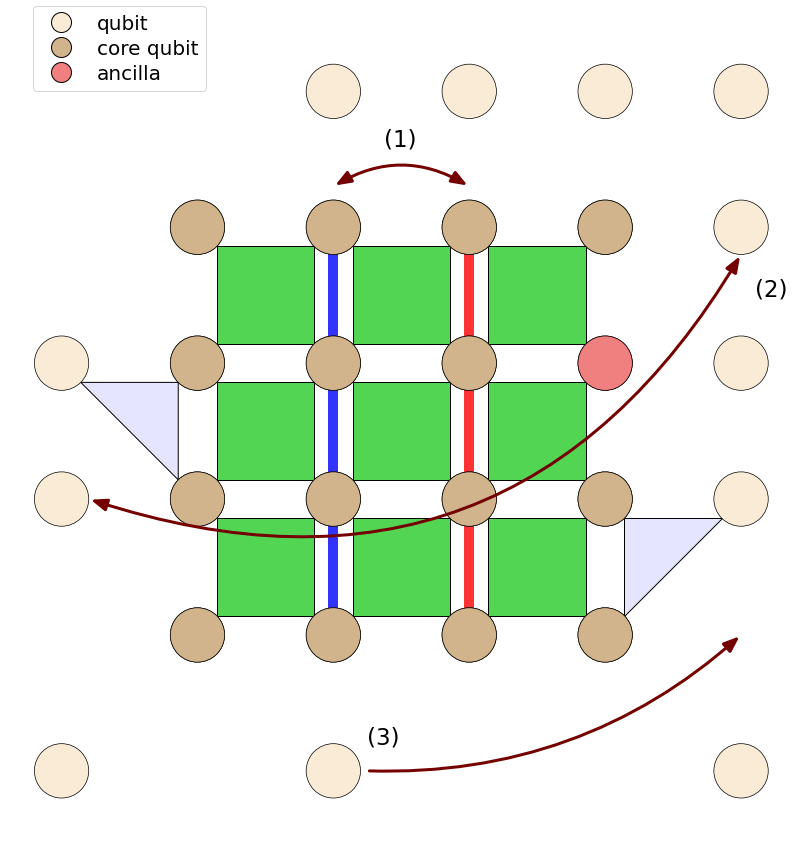

In [121]:
alpha = 0.8
core_plaquettes = [
 [(0, 4), (4, 5), (0, 6), (5, 6)],
 [(0, 6), (5, 6), (0, 3), (3, 5)],
 [(0, 3), (3, 5), (0, 2), (2, 5)],
 [(4, 5), (1, 4), (5, 6), (1, 6)],
 [(5, 6), (1, 6), (3, 5), (1, 3)],
 [(3, 5), (1, 3), (2, 5), (1, 2)],
 [(1, 4), (4, 7), (1, 6), (6, 7)],
 [(1, 6), (6, 7), (1, 3), (3, 7)],
 [(1, 3), (3, 7), (1, 2), (2, 7)],
]

qubit_to_coord_dict = {(0, 1): (4, 6),
 (0, 2): (3, 4),
 (0, 3): (2, 4),
 (0, 4): (0, 4),
 (0, 5): (4, 5),
 (0, 6): (1, 4),
 (0, 7): (4, 7),
 (1, 2): (3, 6),
 (1, 3): (2, 6),
 (1, 4): (0, 6),
 (1, 5): (5, 6),
 (1, 6): (1, 6),
 (1, 7): (6, 7),
 (2, 3): (2, 3),
 (2, 4): (0, 3),
 (2, 5): (3, 5),
 (2, 6): (1, 3),
 (2, 7): (3, 7),
 (3, 4): (0, 2),
 (3, 5): (2, 5),
 (3, 6): (1, 2),
 (3, 7): (2, 7),
 (4, 5): (0, 5),
 (4, 6): (0, 1),
 (4, 7): (0, 7),
 (5, 6): (1, 5),
 (5, 7): (5, 7),
 (6, 7): (1, 7)}


qubit_coord_dict = {q: c for q, c in qubit_to_coord_dict.items() if q in {node for plaq in core_plaquettes for node in plaq}}
graph = Graph.complete(8)
qubit_coord_dict = Polygons.move_to_center(qubit_coord_dict, graph.K)
qubit_coord_dict = {q: (c[0], c[1]-1) for q,c in qubit_coord_dict.items()}
qbits = Qbits.init_qbits_from_dict(graph, qubit_coord_dict, assign_to_core=True)

fig, ax = plt.subplots(figsize=(15, 15))


graph_ = Graph.init_without_edges(8, edges_to_remove=[qubit for qubit in Graph.complete(8).qubits if qubit not in [q.qubit for q in qbits.core_qbits]])
qbits_ = Qbits.init_qbits_from_dict(graph_, qubit_coord_dict, assign_to_core=True)
qbits_[(1, 2)].ancilla=True

nodes_object_ = Nodes(qbits_, place_qbits_in_lines=False)
polygon_object_ = Polygons(nodes_object_)

ax = visualize_(polygon_object_,  ax=ax, polygons=core_plaquettes, rotate=False)



shell_qubit_coord_dict = {(0, 1): (4, 5),
 (0, 5): (5, 2),
 (0, 7): (0, 0),
 (1, 5): (0, 3),
 (1, 7): (5, 5),
 (2, 3): (0, 2),
 (2, 4): (2, 5),
 (2, 6): (3, 5),
 (3, 4): (5, 4),
 (3, 6): (5, 3),
 (4, 6): (5, 0),
 (5, 7): (2, 0)}

qbits[(1, 2)].ancilla=True
for q, c in shell_qubit_coord_dict.items():
    qbits.update(q, c)
nodes_object = Nodes(qbits, place_qbits_in_lines=False)
polygon_object = Polygons(nodes_object)
ax = visualize_(polygon_object,  ax=ax, polygons=core_plaquettes, rotate=False)

a = ax.plot(
    [2, 2, 2, 2],
    [1, 2, 3, 4],
    linewidth = 10,
    alpha=alpha,
    zorder=0,
    color='blue',
)
a = ax.plot(
    [3, 3, 3, 3],
    [1, 2, 3, 4],
    linewidth = 10,
    alpha=alpha,
    zorder=0,
    color='red',
)
a[0].set_solid_capstyle('round')
style="<|-|>,head_width=5,head_length=13"
kw = dict(arrowstyle=style)
a3 = patches.FancyArrowPatch((3, 4.3), (2, 4.3),lw=3,connectionstyle="arc3,rad=0.3", **kw, zorder=39, color='#750000')
for a in [a3]:
    plt.gca().add_patch(a)
ax.text(2.37, 4.6, '(1)', fontsize=23)
style="<|-|>,head_width=5,head_length=13"
kw = dict(arrowstyle=style)
a3 = patches.FancyArrowPatch((0.2, 2), (5, 3.8),lw=3,connectionstyle="arc3,rad=0.4", **kw, zorder=39, color='#750000')
ax.add_patch(a3)
ax.text(5.1, 3.5, '(2)', fontsize=23)

style="-|>,head_width=5,head_length=13"
kw = dict(arrowstyle=style)
a3 = patches.FancyArrowPatch((2.25, 0), (5, 1),lw=3,connectionstyle="arc3,rad=0.2", **kw, zorder=39, color='#750000')
ax.add_patch(a3)
ax.text(2.25, .2, '(3)', fontsize=23)

from matplotlib.lines import Line2D
markersize = 20
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='qubit',
           markerfacecolor='antiquewhite',markeredgecolor='black', markersize=markersize),
    Line2D([0], [0], marker='o', color='w', label='core qubit',
           markerfacecolor='tan',markeredgecolor='black', markersize=markersize),
    Line2D([0], [0], marker='o', color='w', label='ancilla',
           markerfacecolor='lightcoral',markeredgecolor='black', markersize=markersize),
]
# Create the figure
ax.legend(handles=legend_elements,  bbox_to_anchor=(.27, .9045),labelspacing=0.3, fontsize=20, frameon=True)
ax.set_xlim(-.4,5.3)
ax.set_ylim(-.5,5.5)

ax.figure.savefig(paths.plots / f"ThesisFigures/swap_lines_qbits_and_moves_with_core.pdf")


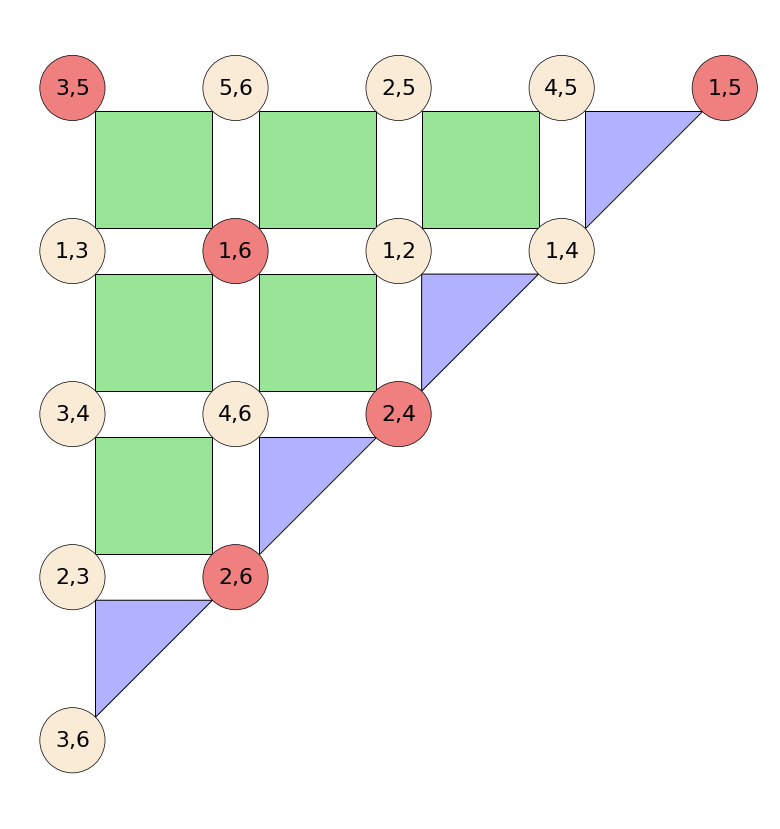

In [20]:
qubits = [
    (0, 1),
    (0, 2),
    (0, 3),
    (1, 2),
    (1, 4),
    (2, 3),
    (2, 5),
    (3, 4),
    (3, 5),
    (4, 5),
]

graph = Graph.complete(6)
qbits = Qbits.init_qbits_from_dict(graph, dict())

for qubit in graph.qubits:
    if qubit not in qubits:
        qbits[qubit].ancilla = True
        qbits[qubit].core = True

nodes_object = Nodes(qbits)
polygon_object = Polygons(nodes_object)
# ax = visualize_without_labels(polygon_object)
self = polygon_object    
ax=None
zoom=1
figsize=(15, 15)
core_corner=None
check_ancilla_in_core: bool = True
envelop_rect=None
rotate: bool=False
radius=0.2
fontsize=22
if ax is None: _, ax = plt.subplots(figsize=figsize)
ax.set_aspect('equal', 'box')
ax.axis('off')

if envelop_rect is None: envelop_rect = self.nodes_object.qbits.envelop_rect()
ax.scatter(*list(zip(*envelop_rect)), color="white", s=0.6, alpha=0)

if core_corner is not None:
    (min_x, max_x), (min_y, max_y) = core_corner
    envelop = [Polygons.rotate_coords_by_45(p, rotate) 
               for p in [(min_x, min_y), (min_x, max_y), (max_x, max_y), (max_x, min_y)]]
    patch = plt.Polygon(
        envelop, zorder=10, fill=False, lw=10, edgecolor="black", alpha=0.5
    )
    ax.add_patch(patch)

# color plaquettes
for polygon in self.polygons_coords(
    self.nodes_object.qbits.qubit_to_coord_dict, self.polygons
):
    # if center is part of polygon, error will be thrown
    if Polygons.center_of_coords(polygon) in polygon:
        continue
    fill, facecolor, lw, alpha, edge_alpha = False, None, 0, 0, 0
    if self.scope_measure:
        measure = self.scope_of_polygon(polygon)
    if not self.scope_measure:
        measure = self.moment_of_inertia(polygon)
    if measure == self.unit_square:
        fill, facecolor, lw, alpha, edge_alpha = True, "limegreen", 1, 0.5, 1
        polygon = Polygons.scale(polygon, radius)
    if measure == self.unit_triangle:
        fill, facecolor, lw, alpha, edge_alpha = True, "blue", 1, 0.3, 1
        polygon = Polygons.scale(polygon, radius)
    # if points are on a line, it is not a polygon anymore but a LineString object
    try: polygon = list(zip(*MultiPoint(polygon).convex_hull.exterior.xy))
    except: pass
    polygon = [Polygons.rotate_coords_by_45(p, rotate)
               for p in polygon]
    patch = plt.Polygon(
        polygon,
        zorder=0,
        fill=fill,
        lw=0,
        facecolor=facecolor,
        alpha=alpha,
    )
    edge = plt.Polygon(
        polygon,
        zorder=0,
        fill=False,
        lw=lw,
        edgecolor="black",
        alpha=edge_alpha
    )
    ax.add_patch(patch)
    ax.add_patch(edge)
# color qbits
for qbit in self.nodes_object.qbits:
    coord = Polygons.rotate_coords_by_45(qbit.coord, rotate)
    if fontsize is None:
        if len(str(qbit.qubit)) - 4 == 2:
            fontsize = 82 * radius
        if len(str(qbit.qubit)) - 4 == 3:
            fontsize = 70 * radius
        if len(str(qbit.qubit)) - 4 == 4:
            fontsize = 60 * radius

    label = ax.annotate(
        f"{qbit.qubit[0]+1},{qbit.qubit[1]+1}",
        xy=coord,
        ha="center",
        va="center",
        fontsize=fontsize,
        zorder=20,
    )
    if qbit.core == False:
        circle = plt.Circle(
            coord, radius=radius, alpha=1.0, lw=0.7, ec="black", fc="antiquewhite", zorder=20
        )
    if qbit.core == True:
        circle = plt.Circle(
            coord, radius=radius, alpha=1.0, lw=0.7, ec="black", fc="tan"
        )
    if qbit.ancilla == True:
        circle = plt.Circle(
            coord, radius=radius, alpha=1.0, lw=0.7, ec="black", fc="lightcoral"
        )
        if check_ancilla_in_core:
            assert (
                qbit.ancilla == True and qbit.core == True
            ), "ancilla is not part of the core ?!"
    ax.add_patch(circle)

ax.set_xlim(-.4,4.3)
ax.set_ylim(.5,5.5)
ax.figure.savefig(paths.plots / f"ThesisFigures/ancillas_instead_of_swaps.pdf")


/net/fermion/csba1344/CompilerQC/graph.py:184: UserWarning: adjacency matrix contains null columns
  warnings.warn("adjacency matrix contains null columns")


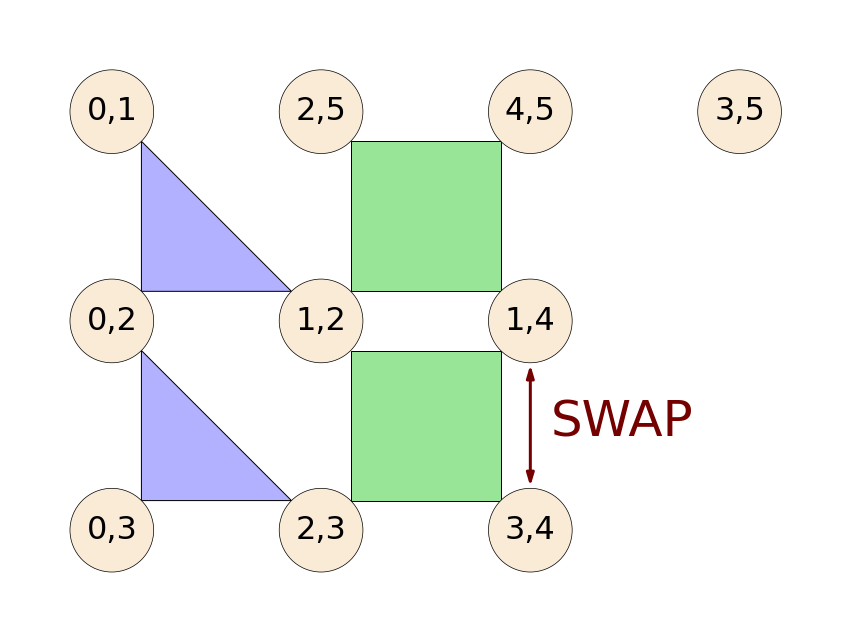

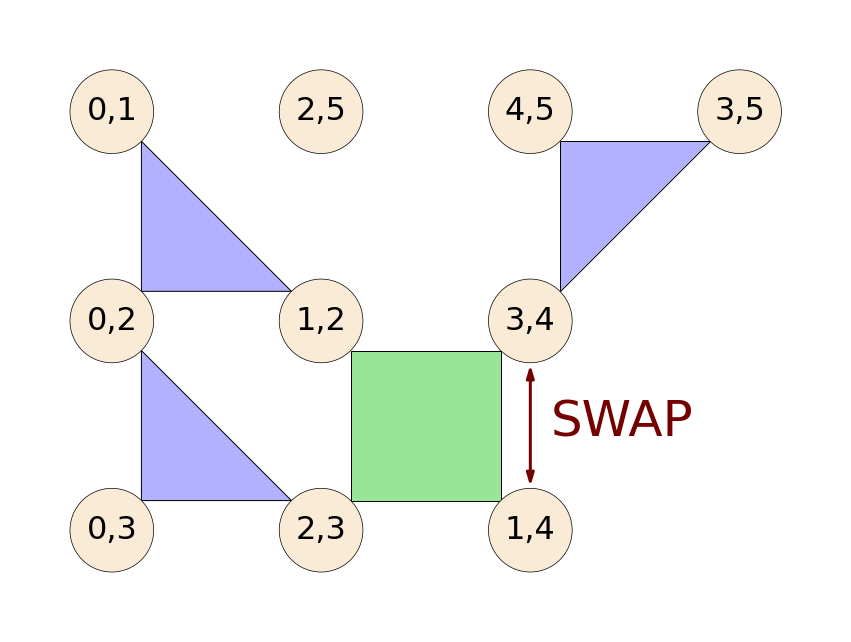

In [41]:
qubit_to_coord_dict = {
    (0, 3): (0, 0),
    (0, 2): (0, 1),
    (0, 1): (0, 2),
    (2, 3): (1, 0),
    (1, 2): (1, 1),
    (2, 5): (1, 2),
    (3, 4): (2, 0),
    (1, 4): (2, 1),
    (4, 5): (2, 2),
    (3, 5): (3, 2),
    
    
}
qubits = [(0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (0, 5),
 (0, 6),
 (1, 2),
 (1, 3),
 (1, 4),
 (1, 5),
 (1, 6),
 (2, 3),
 (2, 4),
 (2, 5),
 (2, 6),
 (3, 4),
 (3, 5),
 (3, 6),
 (4, 5),
 (4, 6),
 (5, 6)]
graph = Graph.init_without_edges(7, edges_to_remove=[qubit for qubit in qubits if qubit not in qubit_to_coord_dict])
qbits = Qbits.init_qbits_from_dict(graph, qubit_to_coord_dict, assign_to_core=False)
nodes_object = Nodes(qbits, place_qbits_in_lines=False)
polygon_object = Polygons(nodes_object, scope_measure=True)
ax = polygon_object.visualize(fontsize=32)
style="<|-|>,head_width=3,head_length=10"
kw = dict(arrowstyle=style)
a3 = patches.FancyArrowPatch((2, 0.2), (2, .8),lw=3,connectionstyle="arc3,rad=0", **kw, zorder=39, color='#750000')
for a in [a3]:
    plt.gca().add_patch(a)
plt.text(2.1, 0.45, "SWAP", fontsize=50, color="#750000")
ax.set_xlim(-.5,3.5)
ax.set_ylim(-.5,2.5)
ax.figure.savefig(paths.plots / f"ThesisFigures/SWAP_gate_example_0.pdf")
ax.figure.savefig(paths.plots / f"Figures/SWAP_gate_example_0.png")

qubit_to_coord_dict = {
    (0, 3): (0, 0),
    (0, 2): (0, 1),
    (0, 1): (0, 2),
    (2, 3): (1, 0),
    (1, 2): (1, 1),
    (2, 5): (1, 2),
    (3, 4): (2, 1),
    (1, 4): (2, 0),
    (4, 5): (2, 2),
    (3, 5): (3, 2),
    
    
}
polygon_object.nodes_object.qbits.update_qbits_from_dict(qubit_to_coord_dict, assign_to_core=False)
ax = polygon_object.visualize(fontsize=32)
a3 = patches.FancyArrowPatch((2, 0.2), (2, .8),lw=3,connectionstyle="arc3,rad=0", **kw, zorder=39, color='#750000')
for a in [a3]:
    plt.gca().add_patch(a)
plt.text(2.1, 0.45, "SWAP", fontsize=50, color="#750000")
ax.set_xlim(-.5,3.5)
ax.set_ylim(-.5,2.5)

ax.figure.savefig(paths.plots / f"ThesisFigures/SWAP_gate_example_1.pdf")
ax.figure.savefig(paths.plots / f"Figures/SWAP_gate_example_1.png")


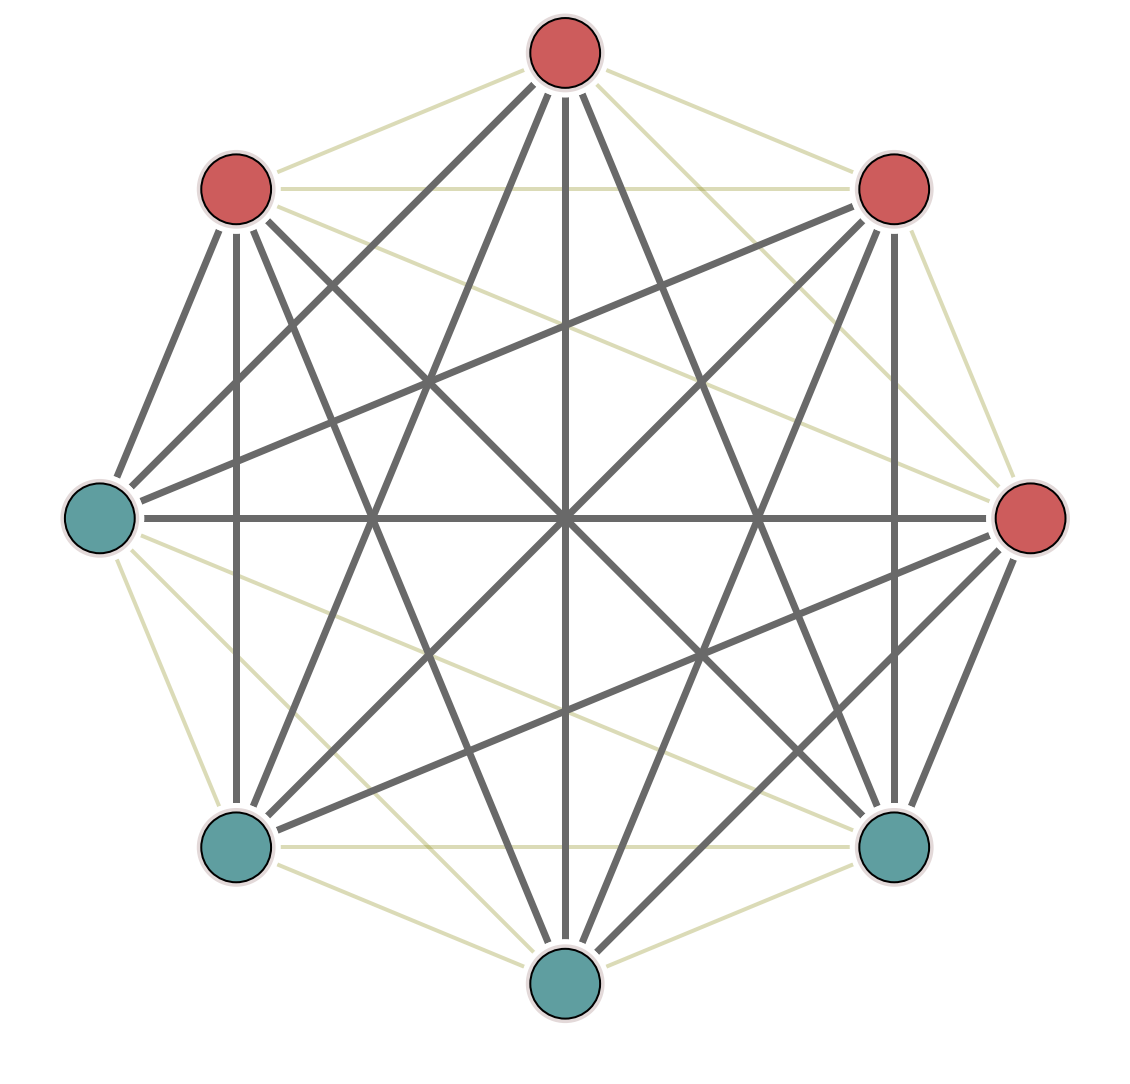

In [118]:
circles = Circles([])
N = 8

for idx, (i, j) in enumerate(Circles.get_circles_of_n_eck(N)):
    up = random.randint(0, 1)#(idx**2+idx*i)%2==0
    circles.add_circle(Circle(coord=(i, j), color="antiquewhite", name=idx, up=up, down=not up, size=0.1, fontsize=50))
name_to_coord_dict = {circle.name:circle for circle in circles}
rotate = True
graph = Graph.complete(N)
qbits = Qbits.init_qbits_from_dict(graph, dict(zip(graph.qubits, graph.qubits)), assign_to_core=False)
nodes_object = Nodes(qbits, place_qbits_in_lines=False)
polygon_object = Polygons(nodes_object, scope_measure=True)
circles.name_to_coord_dict
polygons = [sorted(polygon) for polygon in polygon_object.nodes_object.qbits.found_plaqs()]


polygons = [[]] #+ polygons
for polygon in polygons:
    cycle = [sorted(list({str(node) for qubit in polygon for node in qubit}))]
    figsize = (20, 20)
    edges = Edges([])
    circles = Circles([])
    for idx, (i, j) in enumerate(Circles.get_circles_of_n_eck(N)):
        up = (idx**2+idx*i)%2==0
        circles.add_circle(
            Circle(
                coord=(i, j),
                color="antiquewhite",
                name=idx,
                up=up,
                down=not up,
                size=0.15,
                fontsize=50,
                lw=2,
                edgecolor='olive',
            )
        )

    for edge in list(combinations(circles.coords, 2)):
        edges.add_edge(
            Edge(
                edge=edge,
                color='olive',
                lw=4,
                alpha=0.28,
                ew=0,
                zorder=0,
            )
        )

    constraint = [(circles.name_to_coord_dict[i].coord, circles.name_to_coord_dict[j].coord) 
                 for (i, j) in polygon]


    _, ax = plt.subplots(figsize=figsize)
    ax.set_aspect('equal', 'box')
    ax.axis('off')
    ax.scatter(*circles.xy, color="black", s=0, alpha=1)
    ax.set_ylim(-1.2,1.1)

    for edge in edges:
        if edge.edge in constraint:
            edge.linewidth = 1
            edge.edgewidth= 1
            edge.alpha=1
            edge.color='#A52A2A'
            edge.zorder=4
            edge.edgecolor='salmon'

        outline=mpe.withStroke(linewidth=edge.edgewidth, foreground=edge.edgecolor)
        ax.plot(*edge.xy, color=edge.color, linewidth=edge.linewidth, alpha=edge.alpha, path_effects=[outline], zorder=edge.zorder)


    for circle in circles:
        circle.size = 0.075#
        circle.fontsize = 35
        if circle.name is not None:
            label = ax.annotate(
                "",#r"{}".format(circle.name),
                xy= circle.coord,
                ha="center",
                va="center",
                fontsize=circle.fontsize,
                zorder=10,
                color='black'

            )
        patch = plt.Circle(
            circle.coord,
            radius=circle.size*1.2,
            alpha=1,
            fill=True,
            fc='#e3d9d9',
            lw=5,
            ec='white',
            zorder=circle.zorder
        )
        ax.add_patch(patch)

        ax.add_patch(circle.patch)
    loop = "".join((cycle[0]))


for idx, (i, j) in enumerate(Circles.get_circles_of_n_eck(N)):
    up = random.randint(0, 1)#(idx**2+idx*i)%2==0
    circles.add_circle(Circle(coord=(i, j), color="antiquewhite", name=idx, up=up, down=not up, size=0.1, fontsize=50))
name_to_coord_dict = {circle.name:circle for circle in circles}
rotate = True
graph = Graph.complete(N)
qbits = Qbits.init_qbits_from_dict(graph, dict(zip(graph.qubits, graph.qubits)), assign_to_core=False)
nodes_object = Nodes(qbits, place_qbits_in_lines=False)
polygon_object = Polygons(nodes_object, scope_measure=True)
circles.name_to_coord_dict
polygons = [sorted(polygon) for polygon in polygon_object.nodes_object.qbits.found_plaqs()]
forbidden = [(((1.0, 0.0), (0.707, 0.707)), (0, 1)),
 (((1.0, 0.0), (0.0, 1.0)), (0, 2)),
 (((1.0, 0.0), (-0.707, 0.707)), (0, 3)),
 (((0.707, 0.707), (0.0, 1.0)), (1, 2)),
 (((0.707, 0.707), (-0.707, 0.707)), (1, 3)),
 (((0.0, 1.0), (-0.707, 0.707)), (2, 3)),
 (((-1.0, 0.0), (-0.707, -0.707)), (4, 5)),
 (((-1.0, 0.0), (-0.0, -1.0)), (4, 6)),
 (((-1.0, 0.0), (0.707, -0.707)), (4, 7)),
 (((-0.707, -0.707), (-0.0, -1.0)), (5, 6)),
 (((-0.707, -0.707), (0.707, -0.707)), (5, 7)),
 (((-0.0, -1.0), (0.707, -0.707)), (6, 7))]
forbidden = [edge[0] for edge in forbidden]

polygons = [[]] #+ polygons
for polygon in polygons:
    cycle = [sorted(list({str(node) for qubit in polygon for node in qubit}))]
    figsize = (20, 20)
    edges = Edges([])
    circles = Circles([])
    for idx, (i, j) in enumerate(Circles.get_circles_of_n_eck(N)):
        up = (idx**2+idx*i)%2==0
        circles.add_circle(
            Circle(
                coord=(i, j),
                color="antiquewhite",
                name=idx,
                up=up,
                down=not up,
                size=0.15,
                fontsize=50,
                lw=2,
                edgecolor='black',
            )
        )

    for edge in list(combinations(circles.coords, 2)):
        edges.add_edge(
            Edge(
                edge=edge,
                color='olive',
                lw=4,
                alpha=0.5,
                ew=0,
                zorder=0,
            )
        )

    constraint = [(circles.name_to_coord_dict[i].coord, circles.name_to_coord_dict[j].coord) 
                 for (i, j) in polygon]



    for edge in edges:
        if edge.edge in forbidden:
            edge.linewidth = 0
            edge.alpha = 0
        else:
            edge.linewidth = 7
            edge.edgewidth= 1
            edge.alpha=1
            edge.color='dimgray'
            edge.zorder=4
            edge.edgecolor='dimgray'

        outline=mpe.withStroke(linewidth=edge.edgewidth, foreground=edge.edgecolor)
        ax.plot(*edge.xy, color=edge.color, linewidth=edge.linewidth, alpha=edge.alpha, path_effects=[outline], zorder=edge.zorder)

    for circle in circles:
        circle.size = 0.075#
        circle.fontsize = 35
        if circle.name in [0, 1, 2, 3]:
            circle.color = 'indianred'
        else:
            circle.color = 'cadetblue'
        if circle.name is not None:
            label = ax.annotate(
                "",#r"{}".format(circle.name),
                xy= circle.coord,
                ha="center",
                va="center",
                fontsize=circle.fontsize,
                zorder=10,
                color='black'

            )
        patch = plt.Circle(
            circle.coord,
            radius=circle.size*1.2,
            alpha=1,
            fill=True,
            fc='#e3d9d9',
            lw=5,
            ec='white',
            zorder=circle.zorder
        )
        ax.add_patch(patch)

        ax.add_patch(circle.patch)
    loop = "".join((cycle[0]))
outline=mpe.withStroke(linewidth=edge.edgewidth, foreground=edge.edgecolor)
ax.plot(*edge.xy, color=edge.color, linewidth=edge.linewidth, alpha=edge.alpha, path_effects=[outline], zorder=edge.zorder)
plt.savefig(paths.plots / f"ThesisFigures/bipartite_in_complete_graph.pdf",bbox_inches='tight')


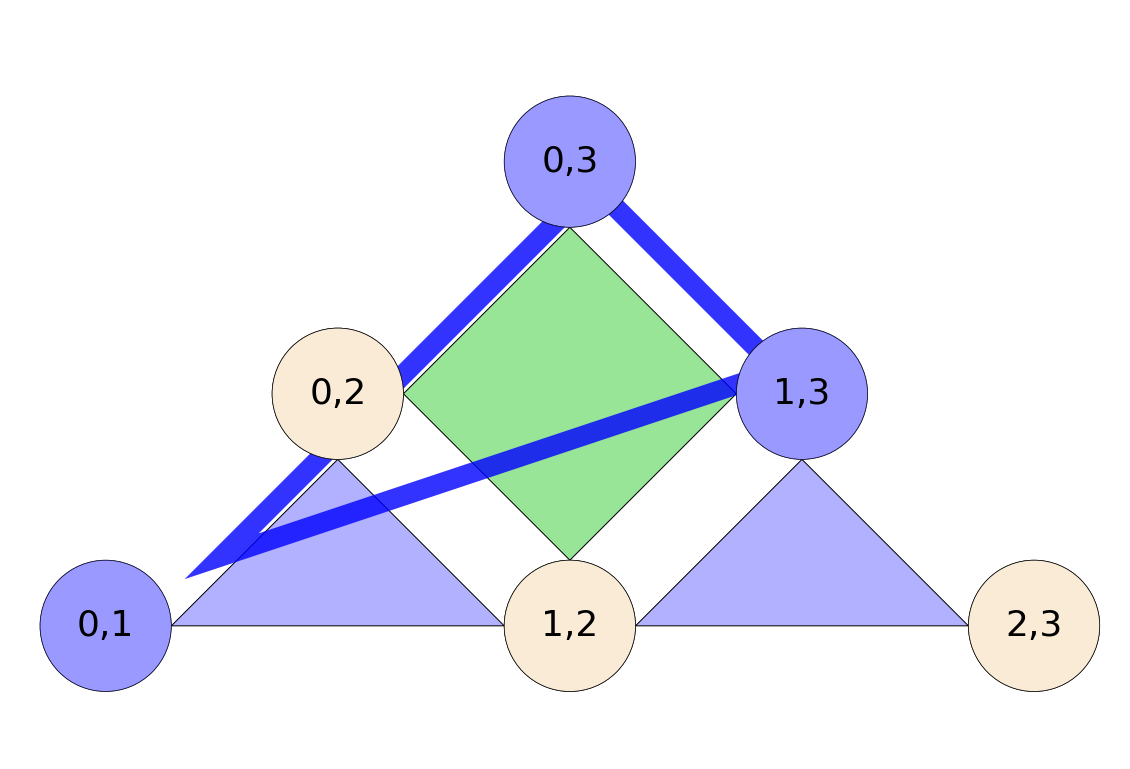

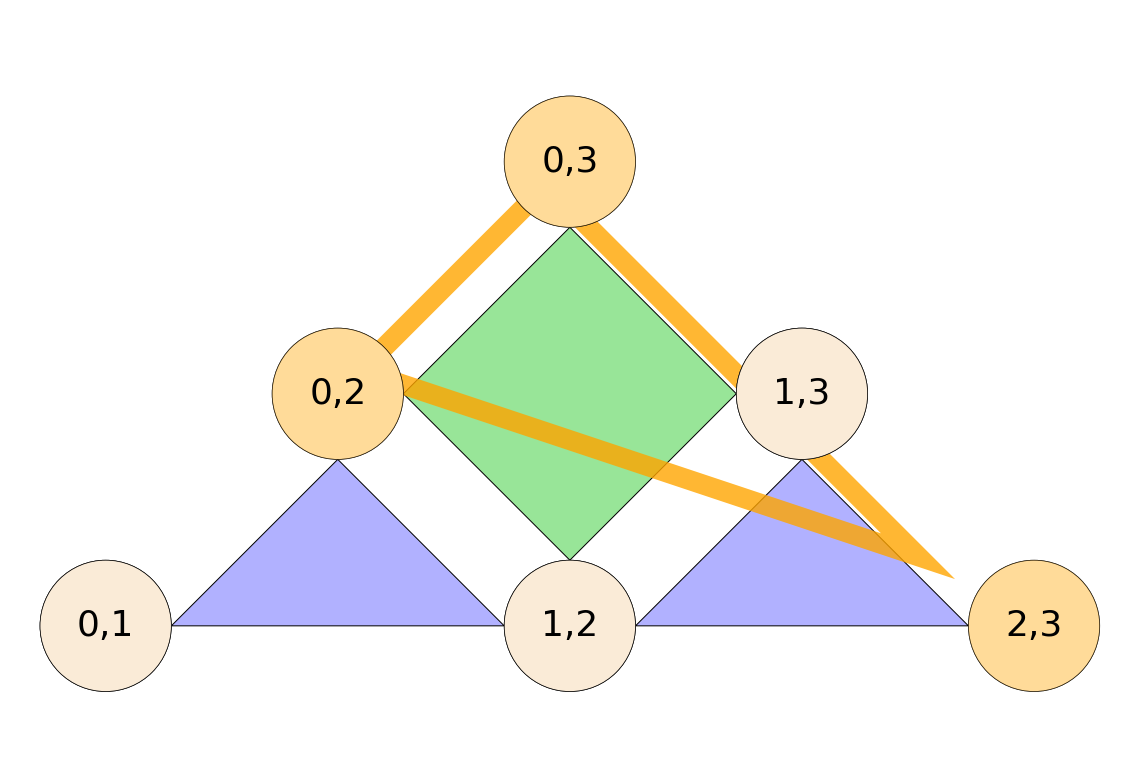

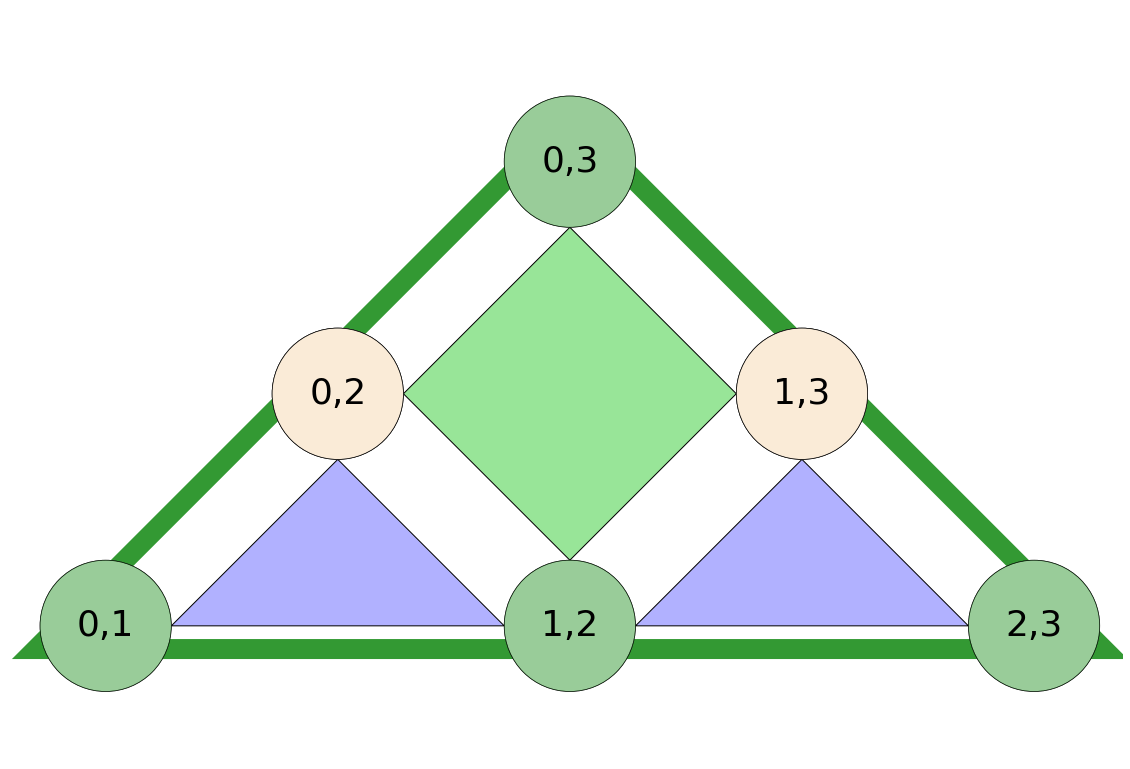

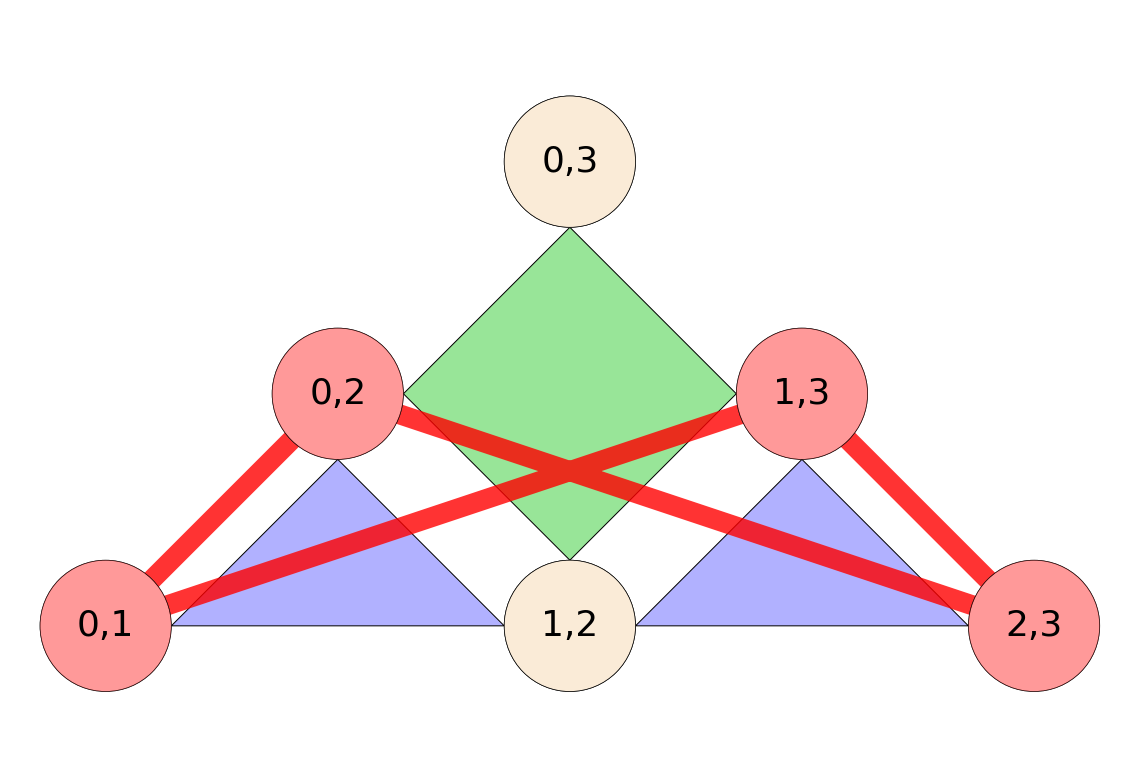

In [32]:
colors = ["blue", "orange", "green", "red", "purple", "pink", "brown"] #olive

N = 4
rotate = True
graph = Graph.complete(N)
qbits = Qbits.init_qbits_from_dict(graph, dict(zip(graph.qubits, graph.qubits)), assign_to_core=False)
nodes_object = Nodes(qbits, place_qbits_in_lines=False)
polygon_object = Polygons(nodes_object, scope_measure=True)
polygons = [
     [(.1, 1.4), (.9, 3), (0.1, 3)],
     [(0, 2.1), (1.6, 2.9), (0, 2.9)],
     [(-.1, .8), (1.1, 2), (2.2, 3.1), (-.1, 3.1)],
     [(0, 1), (1, 3), (2, 3), (0, 2)]
]

qubits_ = [
    [(0, 1), (0, 3), (1, 3)],
    [(0, 2), (0, 3), (2, 3)],
    [(0, 1), (0, 3), (1, 2), (2, 3)],
    [(0, 1), (0, 2), (1, 3), (2, 3)]
]

ax_ids = [(0, 0), (0, 1), (1, 0), (1, 1)]
for idx, (ax_idx, (polygon, colors_)) in enumerate(zip(ax_ids, zip(polygons, qubits_))):
    fig, ax = plt.subplots(figsize=figsize)
    for qbit in qbits:
        qbit.color = 'antiquewhite'
        qbit.alpha = 1
    for color in colors_:
        qbits[color].color = colors[idx]
        qbits[color].alpha = 0.4

        
    ax = color_qubits(polygon_object, ax=ax, rotate=rotate, fontsize=36)
    if polygon != []:
        polygon = [Polygons.rotate_coords_by_45(coord, rotate) for coord in polygon]
        patch = plt.Polygon(
            polygon,
            zorder=0,
            lw=20,
            alpha=0.8,
            color=colors[idx],
            fill=False,
        )
        ax.add_patch(patch)
    ax.set_xlim(-1.7,1.7)
    ax.set_ylim(1,3.3)

    ax.figure.savefig(paths.plots / f"ThesisFigures/all_constraints_in_N4_lhz_{idx}.pdf",bbox_inches='tight')


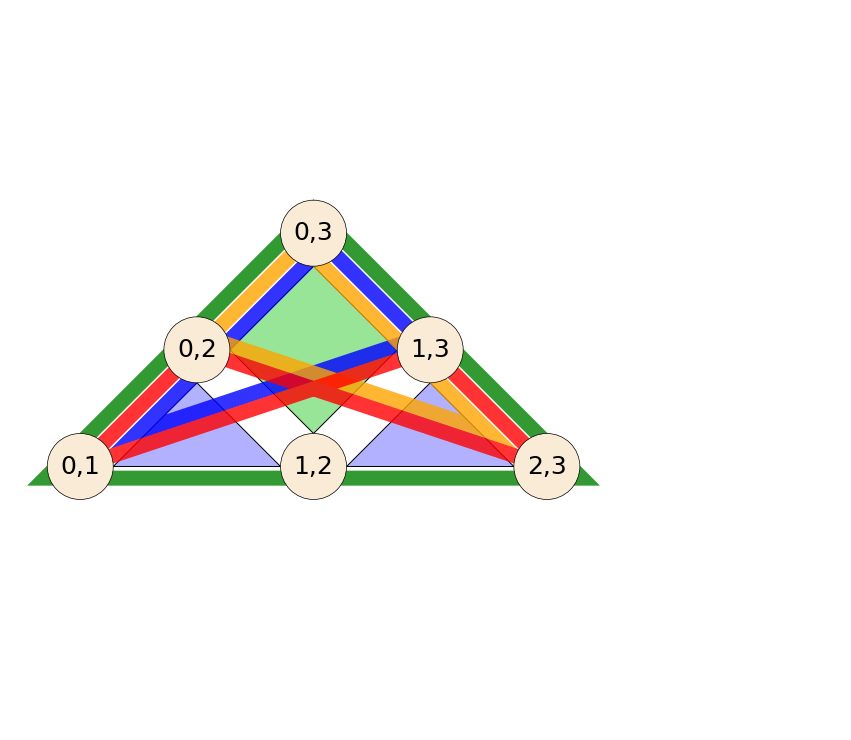

In [33]:
N = 4
rotate = True
graph = Graph.complete(N)
qbits = Qbits.init_qbits_from_dict(graph, dict(zip(graph.qubits, graph.qubits)), assign_to_core=False)
nodes_object = Nodes(qbits, place_qbits_in_lines=False)
polygon_object = Polygons(nodes_object, scope_measure=True)
fig, ax = plt.subplots(figsize=(15, 15))
polygons = [
     [(.1, 1.4), (.9, 3), (0.1, 3)],
     [(0, 2.1), (1.6, 2.9), (0, 2.9)],
     [(-.1, .8), (1.1, 2), (2.2, 3.1), (-.1, 3.1)],
     [(0, 1), (1, 3), (2, 3), (0, 2)]
]
ax = polygon_object.visualize(ax=ax, rotate=rotate, fontsize=25)

for idx, polygon in enumerate(polygons):

    polygon = [Polygons.rotate_coords_by_45(coord, rotate) for coord in polygon]
    patch = plt.Polygon(
        polygon,
        zorder=0,
        lw=15,
        alpha=0.8,
        color=colors[idx],
        fill=False,
    )
    ax.add_patch(patch)
    plt.subplots_adjust(wspace=-.2, hspace=-.6)




plt.savefig(paths.plots / "ThesisFigures/LHZ_N_4_with_all_constraints.pdf")

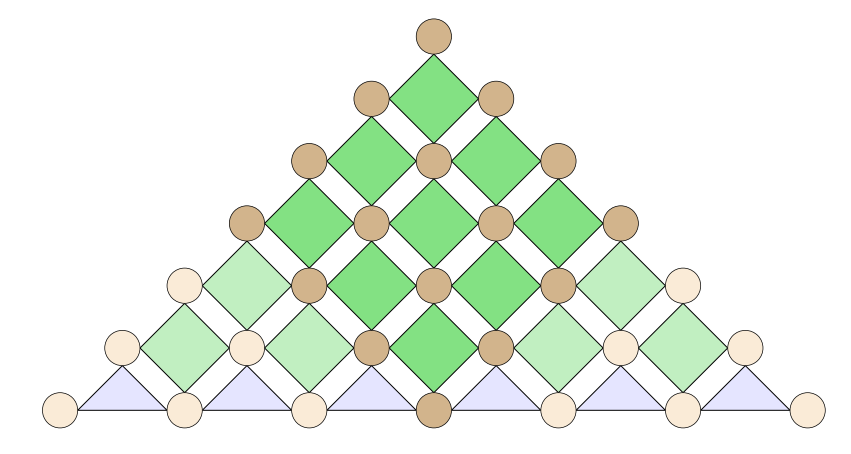

In [119]:
core_plaquettes = [
 [(0, 4), (4, 5), (0, 6), (5, 6)],
 [(0, 6), (5, 6), (0, 3), (3, 5)],
 [(0, 3), (3, 5), (0, 2), (2, 5)],
 [(4, 5), (1, 4), (5, 6), (1, 6)],
 [(5, 6), (1, 6), (3, 5), (1, 3)],
 [(3, 5), (1, 3), (2, 5), (1, 2)],
 [(1, 4), (4, 7), (1, 6), (6, 7)],
 [(1, 6), (6, 7), (1, 3), (3, 7)],
 [(1, 3), (3, 7), (1, 2), (2, 7)],
]

qubit_to_coord_dict = {(0, 1): (4, 6),
 (0, 2): (3, 4),
 (0, 3): (2, 4),
 (0, 4): (0, 4),
 (0, 5): (4, 5),
 (0, 6): (1, 4),
 (0, 7): (4, 7),
 (1, 2): (3, 6),
 (1, 3): (2, 6),
 (1, 4): (0, 6),
 (1, 5): (5, 6),
 (1, 6): (1, 6),
 (1, 7): (6, 7),
 (2, 3): (2, 3),
 (2, 4): (0, 3),
 (2, 5): (3, 5),
 (2, 6): (1, 3),
 (2, 7): (3, 7),
 (3, 4): (0, 2),
 (3, 5): (2, 5),
 (3, 6): (1, 2),
 (3, 7): (2, 7),
 (4, 5): (0, 5),
 (4, 6): (0, 1),
 (4, 7): (0, 7),
 (5, 6): (1, 5),
 (5, 7): (5, 7),
 (6, 7): (1, 7)}

graph = Graph.complete(8)
qbits = Qbits.init_qbits_from_dict(graph, qubit_to_coord_dict, assign_to_core=False)
for qubit in {qubit for plaq in core_plaquettes for qubit in plaq}:
    qbits[qubit].core = True
nodes_object = Nodes(qbits, place_qbits_in_lines=False)
polygon_object = Polygons(nodes_object)

visualize_(polygon_object,  polygons=core_plaquettes, rotate=True)
plt.xlim(-2,7.5)
plt.ylim(1, 6)
plt.savefig(paths.plots / "ThesisFigures/core_in_LHZ_graph.pdf")
plt.savefig(paths.plots / "Figures/core_in_LHZ_graph.png")

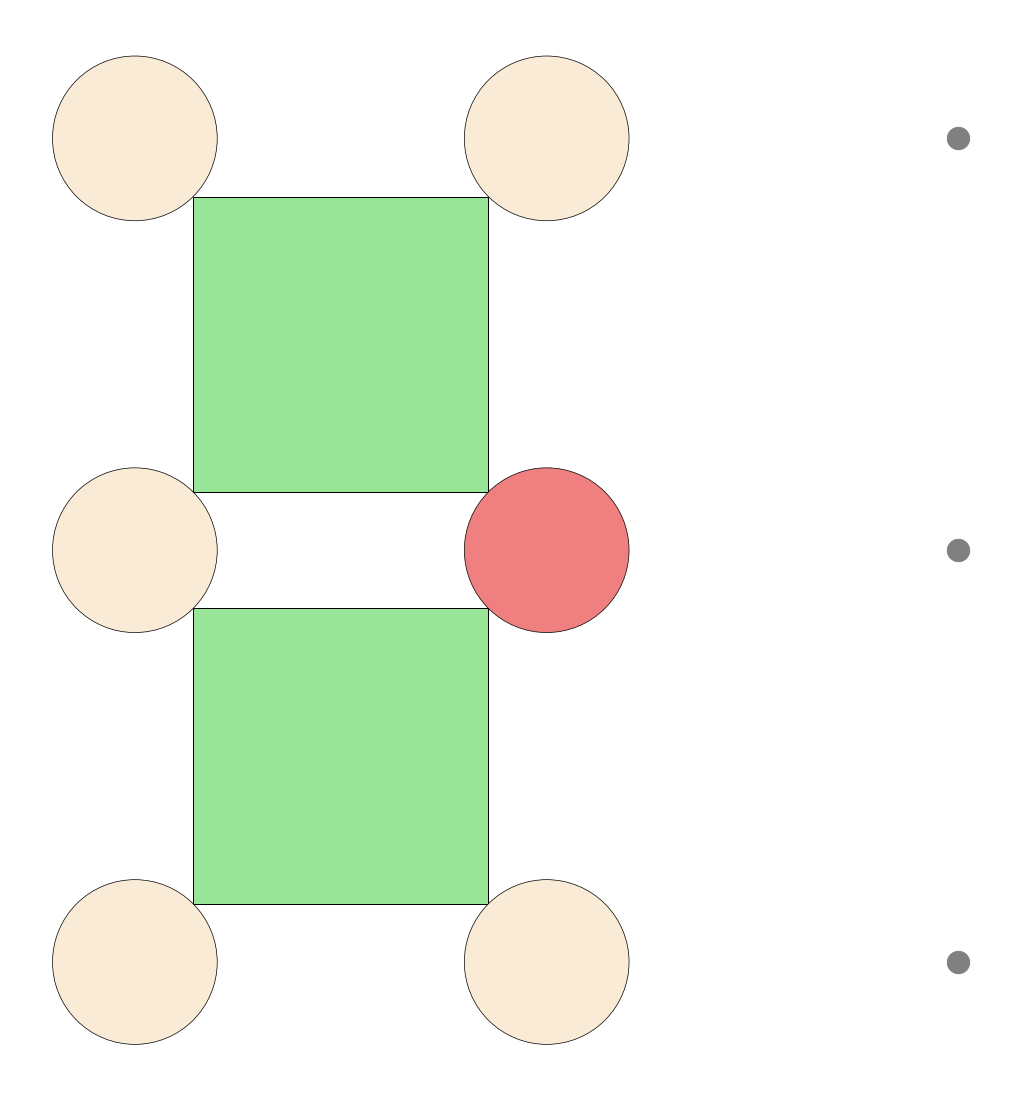

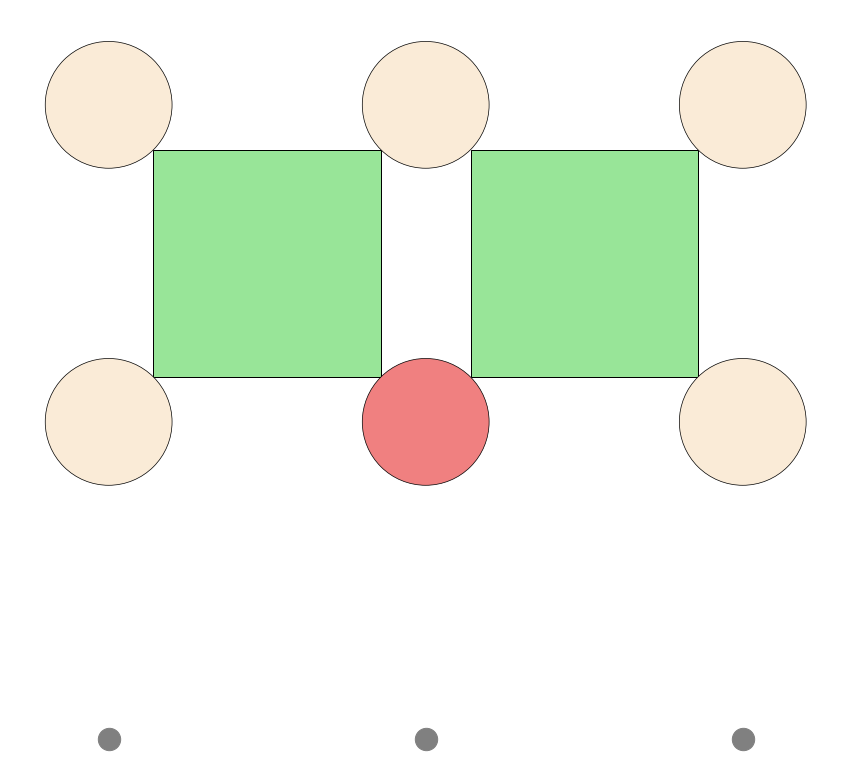

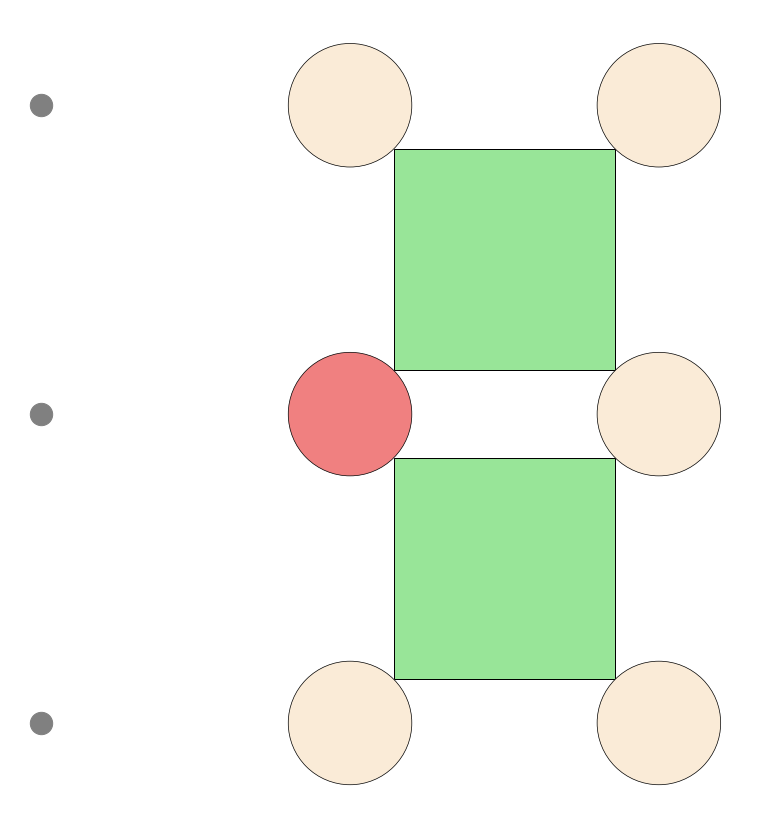

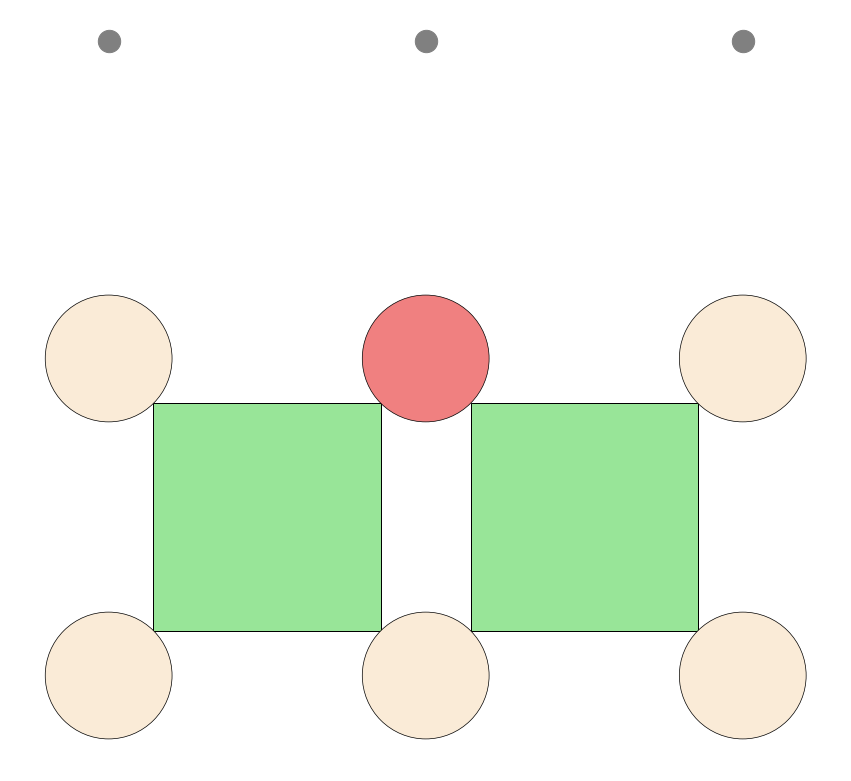

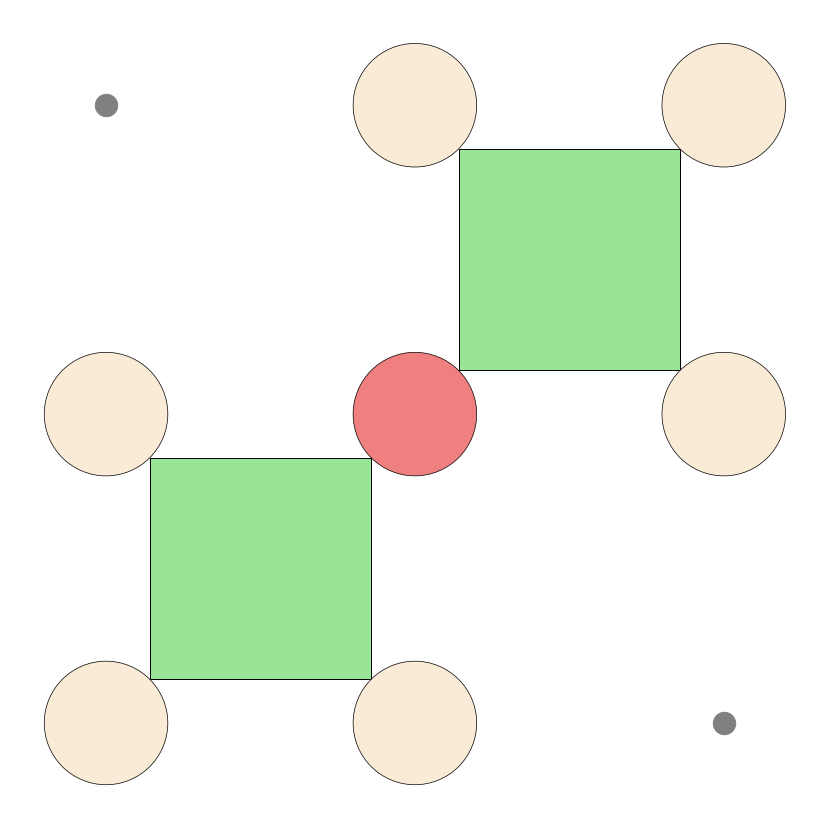

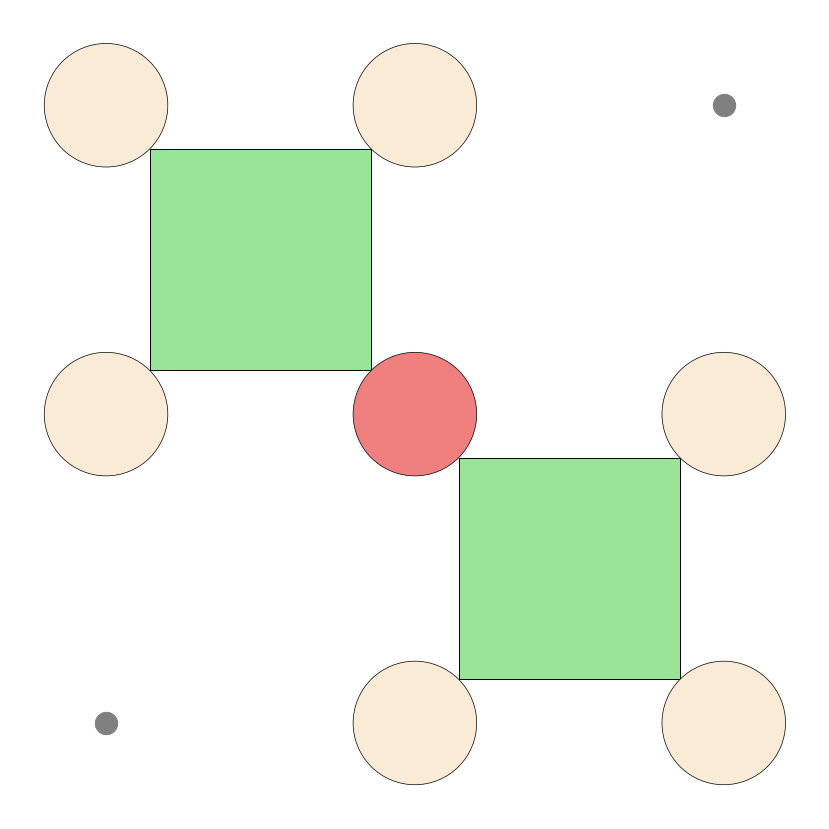

In [35]:
N = 6
rotate = True
graph = Graph.init_without_edges(N, [(0,1),(0,2),(1,2),(3,4),(3,5),(4,5)])
qbits = Qbits.init_qbits_from_dict(graph, dict(zip(graph.qubits, graph.qubits)), assign_to_core=False)
qbits[(1,4)].ancilla = True
qbits[(1,4)].core = True
nodes_object = Nodes(qbits, place_qbits_in_lines=False)
polygon_object = Polygons(nodes_object, scope_measure=True)
_, ax = plt.subplots(figsize=figsize)
polygons = [[
    [(0, 3), (1, 3), (1, 4), (0, 4)],
    [(0, 4), (1, 4), (1, 5), (0, 5)],
],
[
    [(0, 4), (1, 4), (1, 5), (0, 5)],
    [(1, 4), (2, 4), (2, 5), (1, 5)]
],
[
    [(1, 3), (2, 3), (2, 4), (1, 4)],
    [(1, 4), (2, 4), (2, 5), (1, 5)]
],
[
    [(0, 3), (1, 3), (1, 4), (0, 4)],
    [(1, 3), (2, 3), (2, 4), (1, 4)],
],
[
    [(0, 3), (1, 3), (1, 4), (0, 4)],
    [(1, 4), (2, 4), (2, 5), (1, 5)]
],
[
    [(0, 4), (1, 4), (1, 5), (0, 5)],
    [(1, 3), (2, 3), (2, 4), (1, 4)],
]]
for idx, polygon in enumerate(polygons):
    ax = visualize_ancilla(polygon_object, ax, polygon, s=500)


    plt.savefig(paths.plots / f"ThesisFigures/ancilla_proposal_{idx}.pdf")

SCALING MODEL None


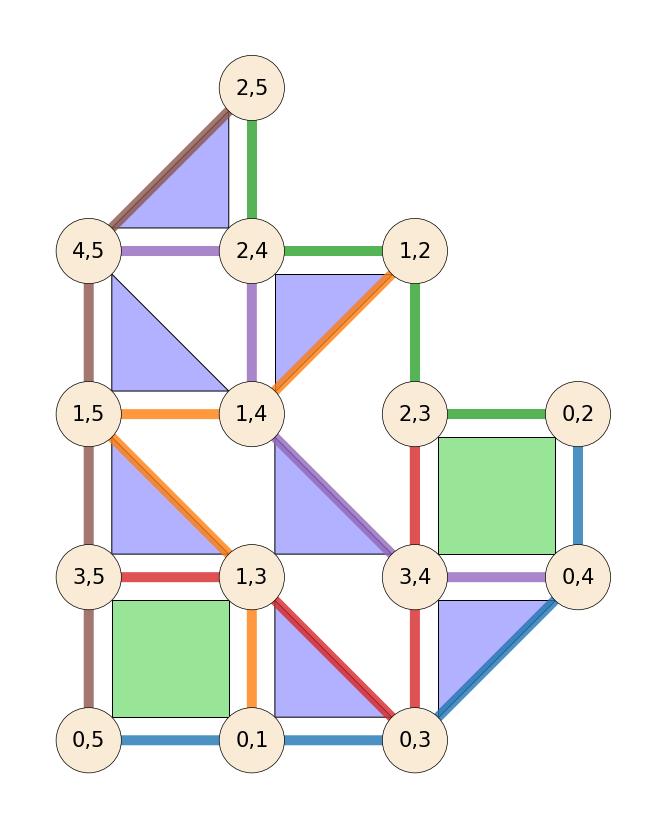

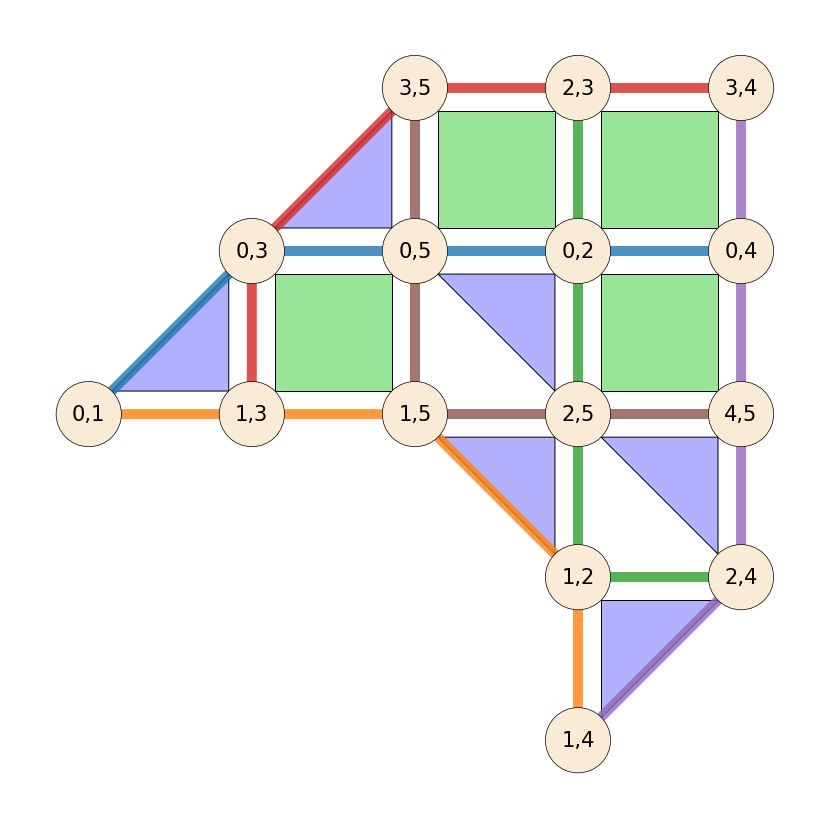

In [124]:
qubit_to_coord_dict_non_complete = {
 (0, 1): (1, 0),
 (0, 2): (3, 2),
 (0, 3): (2, 0),
 (0, 4): (3, 1),
 (0, 5): (0, 0),
 (1, 2): (2, 3),
 (1, 3): (1, 1),
 (1, 4): (1, 2),
 (1, 5): (0, 2),
 (2, 3): (2, 2),
 (2, 4): (1, 3),
 (2, 5): (1, 4),
 (3, 4): (2, 1),
 (3, 5): (0, 1),
 (4, 5): (0, 3)}

qubit_to_coord_dict_complete = {(0, 1): (-1, 1),
 (0, 2): (2, 2),
 (0, 3): (0, 2),
 (0, 4): (3, 2),
 (0, 5): (1, 2),
 (1, 2): (2, 0),
 (1, 3): (0, 1),
 (1, 4): (2, -1),
 (1, 5): (1, 1),
 (2, 3): (2, 3),
 (2, 4): (3, 0),
 (2, 5): (2, 1),
 (3, 4): (3, 3),
 (3, 5): (1, 3),
 (4, 5): (3, 1)}


def draw_lines(self, ax, linewidth: float=10., alpha: float=0.8, rotate: bool=False):
    """draw lines of nodes in plot
    before calling this function, lines have to be initialized, 
    easiest way to do so is by calling energy.line_energy()
    """
    for node in self.nodes_object.qbits.graph.nodes:
        qbits_path, _ = self.line_to_node(node)
        if node == 1:
            qbits_path = [self.nodes_object.qbits[qubit] for qubit in [(1, 2), (1, 4), (1, 5), (1, 3), (0, 1)]]
        a = ax.plot(
            [Polygons.rotate_coords_by_45(qbit.coord, rotate)[0] for qbit in qbits_path],
            [Polygons.rotate_coords_by_45(qbit.coord, rotate)[1] for qbit in qbits_path],
            linewidth = linewidth,
            alpha=alpha,
        )
        a[0].set_solid_capstyle('round')
    return ax


    
graph = Graph.complete(6)
energy_object = functions_for_benchmarking.init_energy(graph)
mc = MC(energy_object)

mc.energy.polygon_object.nodes_object.qbits.update_qbits_from_dict(qubit_to_coord_dict_non_complete, assign_to_core=False)
mc.energy.line_energy(mc.energy.polygon_object.nodes_object.qbits)
ax = mc.energy.polygon_object.visualize(fontsize=21)
draw_lines(mc.energy.polygon_object, ax)
# mc.energy.polygon_object.draw_lines(ax)
plt.xlim(-.5, 3.5)
plt.ylim(-.5,4.5)
plt.savefig(paths.plots / 'ThesisFigures/counter_example_of_lines.pdf')

mc.energy.polygon_object.nodes_object.qbits.update_qbits_from_dict(qubit_to_coord_dict_complete, assign_to_core=False)
mc.energy.line_energy(mc.energy.polygon_object.nodes_object.qbits)
ax = mc.energy.polygon_object.visualize(fontsize=21)
mc.energy.polygon_object.draw_lines(ax)
plt.xlim(-1.5, 3.5)
plt.ylim(-1.5, 3.5)
plt.savefig(paths.plots / 'ThesisFigures/example_of_lines.pdf')



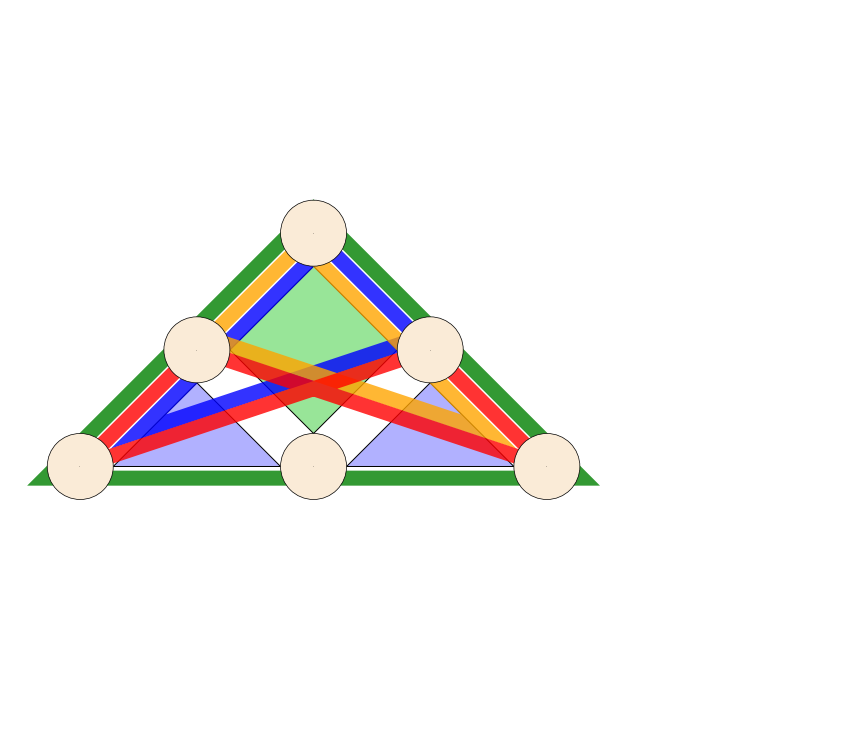

In [37]:
colors = ["blue", "orange", "green", "red", "purple", "pink", "brown"] #olive

N = 4
rotate = True
graph = Graph.complete(N)
qbits = Qbits.init_qbits_from_dict(graph, dict(zip(graph.qubits, graph.qubits)), assign_to_core=False)
nodes_object = Nodes(qbits, place_qbits_in_lines=False)
polygon_object = Polygons(nodes_object, scope_measure=True)
fig, ax = plt.subplots(figsize=(15, 15))
polygons = [
     [(.1, 1.4), (.9, 3), (0.1, 3)],
     [(0, 2.1), (1.6, 2.9), (0, 2.9)],
     [(-.1, .8), (1.1, 2), (2.2, 3.1), (-.1, 3.1)],
     [(0, 1), (1, 3), (2, 3), (0, 2)]
]
ax = polygon_object.visualize(ax=ax, rotate=rotate, fontsize=0)

for idx, polygon in enumerate(polygons):

    polygon = [Polygons.rotate_coords_by_45(coord, rotate) for coord in polygon]
    patch = plt.Polygon(
        polygon,
        zorder=0,
        lw=15,
        alpha=0.8,
        color=colors[idx],
        fill=False,
    )
    ax.add_patch(patch)
    plt.subplots_adjust(wspace=-.2, hspace=-.6)




plt.savefig(paths.plots / "ThesisFigures/cover.pdf")

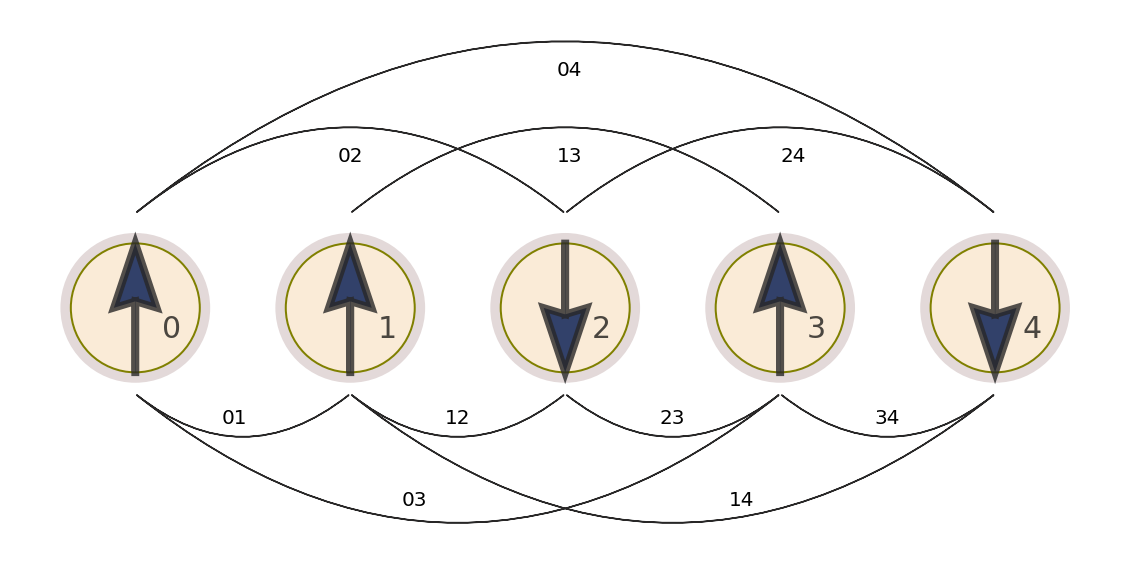

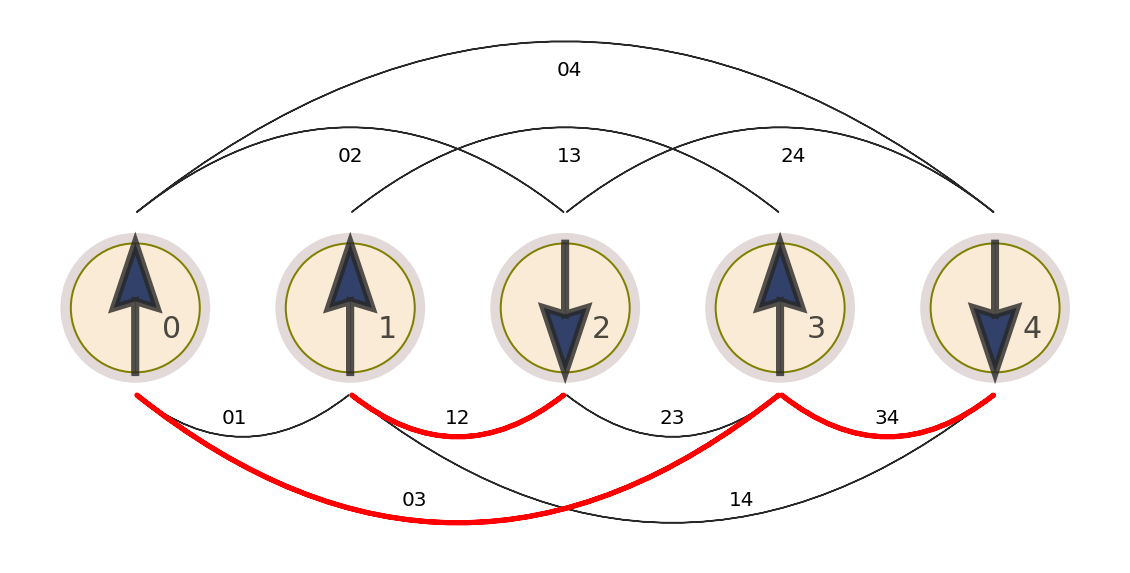

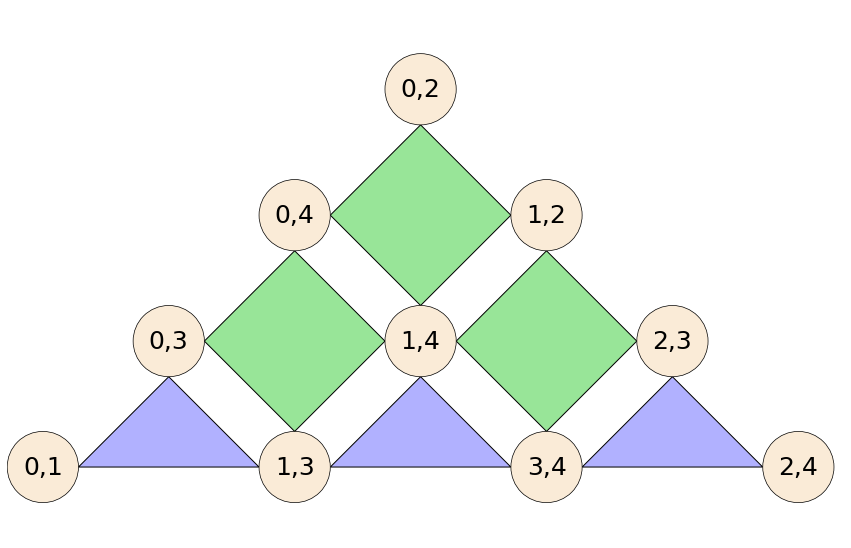

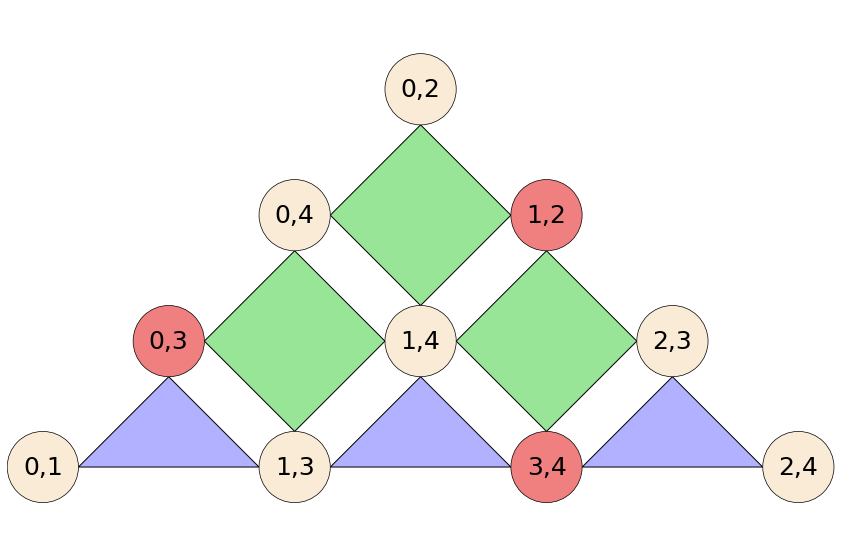

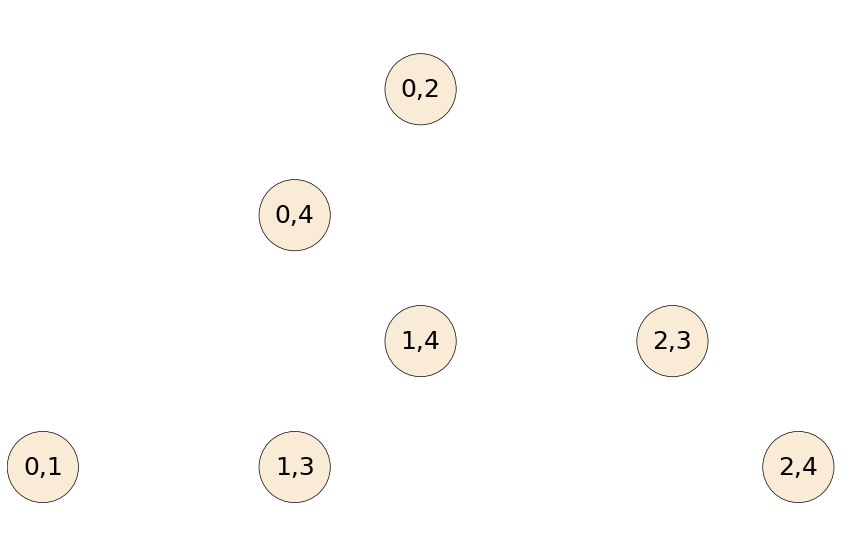

In [44]:
from copy import copy

circles = Circles([])
up=True
circles.add_circle(
        Circle(
            coord=(0, 0),
            color="antiquewhite",
            name=0,
            up=up,
            down=not up,
            size=0.15,
            fontsize=50,
            lw=2,
            edgecolor='olive',
        ))
circles.add_circle(
        Circle(
            coord=(.5, 0),
            color="antiquewhite",
            name=1,
            up=up,
            down=not up,
            size=0.15,
            fontsize=50,
            lw=2,
            edgecolor='olive',
        ))
up=False
circles.add_circle(
        Circle(
            coord=(1, 0),
            color="antiquewhite",
            name=2,
            up=up,
            down=not up,
            size=0.15,
            fontsize=50,
            lw=2,
            edgecolor='olive',
        ))
up=True
circles.add_circle(
        Circle(
            coord=(1.5, 0),
            color="antiquewhite",
            name=3,
            up=up,
            down=not up,
            size=0.15,
            fontsize=50,
            lw=2,
            edgecolor='olive',
        ))
up=False
circles.add_circle(
        Circle(
            coord=(2, 0),
            color="antiquewhite",
            name=4,
            up=up,
            down=not up,
            size=0.15,
            fontsize=50,
            lw=2,
            edgecolor='olive',
        ))

color = '#282727'
lw_ = 1.5
list_of_patches = [
patches.FancyArrowPatch((0, -.2), (.5, -.2),lw=lw_,connectionstyle="arc3,rad=.4", zorder=39, color=color),#12
patches.FancyArrowPatch((.5, -.2), (1, -.2),lw=lw_,connectionstyle="arc3,rad=.4", zorder=39, color=color),#23
patches.FancyArrowPatch((1.0, -.2), (1.5, -.2),lw=lw_,connectionstyle="arc3,rad=.4", zorder=39, color=color),#34
patches.FancyArrowPatch((1.5, -.2), (2, -.2),lw=lw_,connectionstyle="arc3,rad=.4", zorder=39, color=color),#45

patches.FancyArrowPatch((-.0, .22), (1, .22),lw=lw_,connectionstyle="arc3,rad=-.4", zorder=39, color=color),#13
patches.FancyArrowPatch((.5, .22), (1.5, .22),lw=lw_,connectionstyle="arc3,rad=-.4", zorder=39, color=color),#24
patches.FancyArrowPatch((1.0, .22), (2.0, .22),lw=lw_,connectionstyle="arc3,rad=-.4", zorder=39, color=color),#35

patches.FancyArrowPatch((0, -.2), (1.5, -.2),lw=lw_,connectionstyle="arc3,rad=.4", zorder=39, color=color),#14
patches.FancyArrowPatch((0.5, -.2), (2.0, -.2),lw=lw_,connectionstyle="arc3,rad=.4", zorder=39, color=color),#25

patches.FancyArrowPatch((-0.0, .22), (2.0, .22),lw=lw_,connectionstyle="arc3,rad=-.4", zorder=39, color=color),#15

    ]
color, lww = 'red', 5
new_patchs = [
 ]

_, ax = plt.subplots(figsize=figsize)
ax.set_aspect('equal', 'box')
ax.axis('off')
ax.scatter(*circles.xy, color="black", s=0, alpha=1)
ax.set_ylim(-1.2,1.1)
for patch in list_of_patches:
    patch = copy(patch)
    ax.add_patch(patch)
    
for new_patch in new_patchs:
    ax.add_patch(new_patch)
        
for circle in circles:

    if circle.name is not None:
        label = ax.annotate(
            r"{}".format(circle.name),
            xy= (circle.coord[0]+.085, circle.coord[1]-0.05),
            ha="center",
            va="center",
            fontsize=30,
            zorder=10,
            color='black',
            alpha=0.7

        )
    patch = plt.Circle(
        circle.coord,
        radius=circle.size*1.2,
        alpha=1,
        fill=True,
        fc='#e3d9d9',
        lw=5,
        ec='white',
        zorder=circle.zorder
    )
    patch = copy(patch)
    ax.add_patch(patch)

    ax.add_patch(circle.patch)
    
    if circle.up:
        ax.arrow(circle.coord[0] , circle.coord[1] - circle.size, 0, circle.size, alpha=0.8,overhang=.1,
                 linewidth=circle.size * 50,head_width=circle.size/1.5, head_length=circle.size,
                 fc='#00164F', ec='#282727', zorder=6)
    else:
        ax.arrow(circle.coord[0] , circle.coord[1] + circle.size, 0, - circle.size, alpha=0.8,overhang=.1,
                 linewidth=circle.size * 50,head_width=circle.size/1.5, head_length=circle.size,
                 fc='#00164F', ec='#282727', zorder=6)
fontsize = 20
ax.text(.2, -.27, '01',fontsize=fontsize)
ax.text(.72, -.27, '12',fontsize=fontsize)
ax.text(1.22, -.27, '23',fontsize=fontsize)
ax.text(1.72, -.27, '34',fontsize=fontsize)

ax.text(.47, .34, '02',fontsize=fontsize)
ax.text(.98, .34, '13',fontsize=fontsize)
ax.text(1.5, .34, '24',fontsize=fontsize)

ax.text(.62, -.46, '03',fontsize=fontsize)
ax.text(1.38, -.46, '14',fontsize=fontsize)

ax.text(.98, .54, '04',fontsize=fontsize)

ax.set_ylim(-.6,.7)
ax.figure.savefig(paths.plots / f"Figures/N5_spin_glass.png",bbox_inches='tight')



circles = Circles([])
up=True
circles.add_circle(
        Circle(
            coord=(0, 0),
            color="antiquewhite",
            name=0,
            up=up,
            down=not up,
            size=0.15,
            fontsize=50,
            lw=2,
            edgecolor='olive',
        ))
circles.add_circle(
        Circle(
            coord=(.5, 0),
            color="antiquewhite",
            name=1,
            up=up,
            down=not up,
            size=0.15,
            fontsize=50,
            lw=2,
            edgecolor='olive',
        ))
up=False
circles.add_circle(
        Circle(
            coord=(1, 0),
            color="antiquewhite",
            name=2,
            up=up,
            down=not up,
            size=0.15,
            fontsize=50,
            lw=2,
            edgecolor='olive',
        ))
up=True
circles.add_circle(
        Circle(
            coord=(1.5, 0),
            color="antiquewhite",
            name=3,
            up=up,
            down=not up,
            size=0.15,
            fontsize=50,
            lw=2,
            edgecolor='olive',
        ))
up=False
circles.add_circle(
        Circle(
            coord=(2, 0),
            color="antiquewhite",
            name=4,
            up=up,
            down=not up,
            size=0.15,
            fontsize=50,
            lw=2,
            edgecolor='olive',
        ))

color = '#282727'
lw_ = 1.5
list_of_patches = [
patches.FancyArrowPatch((0, -.2), (.5, -.2),lw=lw_,connectionstyle="arc3,rad=.4", zorder=39, color=color),#12
patches.FancyArrowPatch((.5, -.2), (1, -.2),lw=lw_,connectionstyle="arc3,rad=.4", zorder=39, color=color),#23
patches.FancyArrowPatch((1.0, -.2), (1.5, -.2),lw=lw_,connectionstyle="arc3,rad=.4", zorder=39, color=color),#34
patches.FancyArrowPatch((1.5, -.2), (2, -.2),lw=lw_,connectionstyle="arc3,rad=.4", zorder=39, color=color),#45

patches.FancyArrowPatch((-.0, .22), (1, .22),lw=lw_,connectionstyle="arc3,rad=-.4", zorder=39, color=color),#13
patches.FancyArrowPatch((.5, .22), (1.5, .22),lw=lw_,connectionstyle="arc3,rad=-.4", zorder=39, color=color),#24
patches.FancyArrowPatch((1.0, .22), (2.0, .22),lw=lw_,connectionstyle="arc3,rad=-.4", zorder=39, color=color),#35

patches.FancyArrowPatch((0, -.2), (1.5, -.2),lw=lw_,connectionstyle="arc3,rad=.4", zorder=39, color=color),#14
patches.FancyArrowPatch((0.5, -.2), (2.0, -.2),lw=lw_,connectionstyle="arc3,rad=.4", zorder=39, color=color),#25

patches.FancyArrowPatch((-0.0, .22), (2.0, .22),lw=lw_,connectionstyle="arc3,rad=-.4", zorder=39, color=color),#15

    ]
color, lww = 'red', 5
new_patchs = [
    patches.FancyArrowPatch((0, -.2), (1.5, -.2),lw=lww,connectionstyle="arc3,rad=.4", zorder=39, color=color),#14
    patches.FancyArrowPatch((1.5, -.2), (2, -.2),lw=lww,connectionstyle="arc3,rad=.4", zorder=39, color=color),#45
    patches.FancyArrowPatch((.5, -.2), (1, -.2),lw=lww,connectionstyle="arc3,rad=.4", zorder=39, color=color),#23
]

_, ax = plt.subplots(figsize=figsize)
ax.set_aspect('equal', 'box')
ax.axis('off')
ax.scatter(*circles.xy, color="black", s=0, alpha=1)
ax.set_ylim(-1.2,1.1)
for patch in list_of_patches:
    patch = copy(patch)
    ax.add_patch(patch)
    
for new_patch in new_patchs:
    ax.add_patch(new_patch)
        
for circle in circles:

    if circle.name is not None:
        label = ax.annotate(
            r"{}".format(circle.name),
            xy= (circle.coord[0]+.085, circle.coord[1]-0.05),
            ha="center",
            va="center",
            fontsize=30,
            zorder=10,
            color='black',
            alpha=0.7

        )
    patch = plt.Circle(
        circle.coord,
        radius=circle.size*1.2,
        alpha=1,
        fill=True,
        fc='#e3d9d9',
        lw=5,
        ec='white',
        zorder=circle.zorder
    )
    patch = copy(patch)
    ax.add_patch(patch)

    ax.add_patch(circle.patch)
    
    if circle.up:
        ax.arrow(circle.coord[0] , circle.coord[1] - circle.size, 0, circle.size, alpha=0.8,overhang=.1,
                 linewidth=circle.size * 50,head_width=circle.size/1.5, head_length=circle.size,
                 fc='#00164F', ec='#282727', zorder=6)
    else:
        ax.arrow(circle.coord[0] , circle.coord[1] + circle.size, 0, - circle.size, alpha=0.8,overhang=.1,
                 linewidth=circle.size * 50,head_width=circle.size/1.5, head_length=circle.size,
                 fc='#00164F', ec='#282727', zorder=6)
fontsize = 20
ax.text(.2, -.27, '01',fontsize=fontsize)
ax.text(.72, -.27, '12',fontsize=fontsize)
ax.text(1.22, -.27, '23',fontsize=fontsize)
ax.text(1.72, -.27, '34',fontsize=fontsize)

ax.text(.47, .34, '02',fontsize=fontsize)
ax.text(.98, .34, '13',fontsize=fontsize)
ax.text(1.5, .34, '24',fontsize=fontsize)

ax.text(.62, -.46, '03',fontsize=fontsize)
ax.text(1.38, -.46, '14',fontsize=fontsize)

ax.text(.98, .54, '04',fontsize=fontsize)

ax.set_ylim(-.6,.7)
ax.figure.savefig(paths.plots / f"Figures/N5_spin_glass_with_ancillas.png",bbox_inches='tight')


qubit_to_coord_dict = {
 (0, 1): (0, 1),
 (0, 2): (0, 4),
 (0, 3): (0, 2),
 (0, 4): (0, 3),
 (1, 2): (1, 4),
 (1, 3): (1, 2),
 (1, 4): (1, 3),
 (2, 3): (2, 4),
 (2, 4): (3, 4),
 (3, 4): (2, 3),
}
graph = Graph.complete(5)
qbits = Qbits.init_qbits_from_dict(graph, qubit_to_coord_dict, assign_to_core=False)
nodes_object = Nodes(qbits, place_qbits_in_lines=False)
polygon_object = Polygons(nodes_object)
ax = polygon_object.visualize(rotate=True, fontsize=25)
ax.set_xlim(-1.6, 3.1)
ax.set_ylim(1, 4)
ax.figure.savefig(paths.plots / f"Figures/N5_lhz.png",bbox_inches='tight')


missing_link = [(0, 3), (3, 4), (1, 2)]
qubit_to_coord_dict = {
 (0, 1): (0, 1),
 (0, 2): (0, 4),
 (0, 3): (0, 2),
 (0, 4): (0, 3),
 (1, 2): (1, 4),
 (1, 3): (1, 2),
 (1, 4): (1, 3),
 (2, 3): (2, 4),
 (2, 4): (3, 4),
 (3, 4): (2, 3),
}
graph = Graph.complete(5)
qbits = Qbits.init_qbits_from_dict(graph, qubit_to_coord_dict, assign_to_core=False)
for qubit in missing_link:
    qbits[qubit].ancilla = True
    qbits[qubit].core = True
    
nodes_object = Nodes(qbits, place_qbits_in_lines=False)
polygon_object = Polygons(nodes_object)
ax = polygon_object.visualize(rotate=True, fontsize=25)
ax.set_xlim(-1.6, 3.1)
ax.set_ylim(1, 4)
ax.figure.savefig(paths.plots / f"Figures/N5_lhz_ancillas.png",bbox_inches='tight')
qubit_to_coord_dict = {
 (0, 1): (0, 1),
 (0, 2): (0, 4),
 (0, 4): (0, 3),
 (1, 3): (1, 2),
 (1, 4): (1, 3),
 (2, 3): (2, 4),
 (2, 4): (3, 4),
}
N = 5
graph = Graph.init_without_edges(N, missing_link)
qbits = Qbits.init_qbits_from_dict(graph, qubit_to_coord_dict, assign_to_core=False)
nodes_object = Nodes(qbits, place_qbits_in_lines=False)
polygon_object = Polygons(nodes_object)
ax = polygon_object.visualize(rotate=True, fontsize=25)
ax.set_xlim(-1.6, 3.1)
ax.set_ylim(1, 4)
ax.figure.savefig(paths.plots / f"Figures/N5_lhz_holes.png",bbox_inches='tight')


